## 7.2節　ENASによるニューラルネットワークアーキテクチャ探索  
※本ノートブックは、GPUが利用可能なローカルPC上でのみご利用いただけます。

In [1]:
%cd /tf/rl_book/contents/7-2_enas/

/tf/rl_book/contents/7-2_enas


以下のコマンドを実行して画像データをダウンロードします。

In [2]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar

--2019-07-25 08:12:32--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
host.robots.ox.ac.uk (host.robots.ox.ac.uk) をDNSに問いあわせています... 129.67.94.152
host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 1999639040 (1.9G) [application/x-tar]
`VOCtrainval_11-May-2012.tar.1' に保存中

ar.1                 99%[==================> ]   1.86G   603KB/s    残り1s       Segmentation fault (core dumped)


画像データの tar ファイルを解凍して得られたフォルダ VOCdevkit を data と改名します。

In [3]:
!tar -xvf VOCtrainval_11-May-2012.tar
%mv VOCdevkit data

VOCdevkit/
VOCdevkit/VOC2012/
VOCdevkit/VOC2012/Annotations/
VOCdevkit/VOC2012/Annotations/2007_000027.xml
VOCdevkit/VOC2012/Annotations/2007_000032.xml
VOCdevkit/VOC2012/Annotations/2007_000033.xml
VOCdevkit/VOC2012/Annotations/2007_000039.xml
VOCdevkit/VOC2012/Annotations/2007_000042.xml
VOCdevkit/VOC2012/Annotations/2007_000061.xml
VOCdevkit/VOC2012/Annotations/2007_000063.xml
VOCdevkit/VOC2012/Annotations/2007_000068.xml
VOCdevkit/VOC2012/Annotations/2007_000121.xml
VOCdevkit/VOC2012/Annotations/2007_000123.xml
VOCdevkit/VOC2012/Annotations/2007_000129.xml
VOCdevkit/VOC2012/Annotations/2007_000170.xml
VOCdevkit/VOC2012/Annotations/2007_000175.xml
VOCdevkit/VOC2012/Annotations/2007_000187.xml
VOCdevkit/VOC2012/Annotations/2007_000241.xml
VOCdevkit/VOC2012/Annotations/2007_000243.xml
VOCdevkit/VOC2012/Annotations/2007_000250.xml
VOCdevkit/VOC2012/Annotations/2007_000256.xml
VOCdevkit/VOC2012/Annotations/2007_000272.xml
VOCdevkit/VOC2012/Annotations/2007_000323.xml
VOCdevkit/VOC2012/A

VOCdevkit/VOC2012/Annotations/2007_002845.xml
VOCdevkit/VOC2012/Annotations/2007_002852.xml
VOCdevkit/VOC2012/Annotations/2007_002895.xml
VOCdevkit/VOC2012/Annotations/2007_002896.xml
VOCdevkit/VOC2012/Annotations/2007_002903.xml
VOCdevkit/VOC2012/Annotations/2007_002914.xml
VOCdevkit/VOC2012/Annotations/2007_002953.xml
VOCdevkit/VOC2012/Annotations/2007_002954.xml
VOCdevkit/VOC2012/Annotations/2007_002967.xml
VOCdevkit/VOC2012/Annotations/2007_003000.xml
VOCdevkit/VOC2012/Annotations/2007_003011.xml
VOCdevkit/VOC2012/Annotations/2007_003020.xml
VOCdevkit/VOC2012/Annotations/2007_003022.xml
VOCdevkit/VOC2012/Annotations/2007_003051.xml
VOCdevkit/VOC2012/Annotations/2007_003088.xml
VOCdevkit/VOC2012/Annotations/2007_003091.xml
VOCdevkit/VOC2012/Annotations/2007_003101.xml
VOCdevkit/VOC2012/Annotations/2007_003104.xml
VOCdevkit/VOC2012/Annotations/2007_003106.xml
VOCdevkit/VOC2012/Annotations/2007_003110.xml
VOCdevkit/VOC2012/Annotations/2007_003118.xml
VOCdevkit/VOC2012/Annotations/2007

VOCdevkit/VOC2012/Annotations/2007_005428.xml
VOCdevkit/VOC2012/Annotations/2007_005430.xml
VOCdevkit/VOC2012/Annotations/2007_005450.xml
VOCdevkit/VOC2012/Annotations/2007_005460.xml
VOCdevkit/VOC2012/Annotations/2007_005469.xml
VOCdevkit/VOC2012/Annotations/2007_005509.xml
VOCdevkit/VOC2012/Annotations/2007_005527.xml
VOCdevkit/VOC2012/Annotations/2007_005547.xml
VOCdevkit/VOC2012/Annotations/2007_005600.xml
VOCdevkit/VOC2012/Annotations/2007_005608.xml
VOCdevkit/VOC2012/Annotations/2007_005626.xml
VOCdevkit/VOC2012/Annotations/2007_005647.xml
VOCdevkit/VOC2012/Annotations/2007_005657.xml
VOCdevkit/VOC2012/Annotations/2007_005688.xml
VOCdevkit/VOC2012/Annotations/2007_005689.xml
VOCdevkit/VOC2012/Annotations/2007_005691.xml
VOCdevkit/VOC2012/Annotations/2007_005695.xml
VOCdevkit/VOC2012/Annotations/2007_005696.xml
VOCdevkit/VOC2012/Annotations/2007_005702.xml
VOCdevkit/VOC2012/Annotations/2007_005705.xml
VOCdevkit/VOC2012/Annotations/2007_005748.xml
VOCdevkit/VOC2012/Annotations/2007

VOCdevkit/VOC2012/Annotations/2007_007818.xml
VOCdevkit/VOC2012/Annotations/2007_007836.xml
VOCdevkit/VOC2012/Annotations/2007_007849.xml
VOCdevkit/VOC2012/Annotations/2007_007871.xml
VOCdevkit/VOC2012/Annotations/2007_007877.xml
VOCdevkit/VOC2012/Annotations/2007_007878.xml
VOCdevkit/VOC2012/Annotations/2007_007881.xml
VOCdevkit/VOC2012/Annotations/2007_007890.xml
VOCdevkit/VOC2012/Annotations/2007_007891.xml
VOCdevkit/VOC2012/Annotations/2007_007892.xml
VOCdevkit/VOC2012/Annotations/2007_007902.xml
VOCdevkit/VOC2012/Annotations/2007_007908.xml
VOCdevkit/VOC2012/Annotations/2007_007910.xml
VOCdevkit/VOC2012/Annotations/2007_007917.xml
VOCdevkit/VOC2012/Annotations/2007_007930.xml
VOCdevkit/VOC2012/Annotations/2007_007940.xml
VOCdevkit/VOC2012/Annotations/2007_007947.xml
VOCdevkit/VOC2012/Annotations/2007_007948.xml
VOCdevkit/VOC2012/Annotations/2007_007955.xml
VOCdevkit/VOC2012/Annotations/2007_007996.xml
VOCdevkit/VOC2012/Annotations/2007_008013.xml
VOCdevkit/VOC2012/Annotations/2007

VOCdevkit/VOC2012/Annotations/2008_000141.xml
VOCdevkit/VOC2012/Annotations/2008_000142.xml
VOCdevkit/VOC2012/Annotations/2008_000143.xml
VOCdevkit/VOC2012/Annotations/2008_000144.xml
VOCdevkit/VOC2012/Annotations/2008_000145.xml
VOCdevkit/VOC2012/Annotations/2008_000148.xml
VOCdevkit/VOC2012/Annotations/2008_000149.xml
VOCdevkit/VOC2012/Annotations/2008_000151.xml
VOCdevkit/VOC2012/Annotations/2008_000154.xml
VOCdevkit/VOC2012/Annotations/2008_000162.xml
VOCdevkit/VOC2012/Annotations/2008_000163.xml
VOCdevkit/VOC2012/Annotations/2008_000174.xml
VOCdevkit/VOC2012/Annotations/2008_000176.xml
VOCdevkit/VOC2012/Annotations/2008_000177.xml
VOCdevkit/VOC2012/Annotations/2008_000181.xml
VOCdevkit/VOC2012/Annotations/2008_000182.xml
VOCdevkit/VOC2012/Annotations/2008_000183.xml
VOCdevkit/VOC2012/Annotations/2008_000185.xml
VOCdevkit/VOC2012/Annotations/2008_000187.xml
VOCdevkit/VOC2012/Annotations/2008_000188.xml
VOCdevkit/VOC2012/Annotations/2008_000189.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_000583.xml
VOCdevkit/VOC2012/Annotations/2008_000584.xml
VOCdevkit/VOC2012/Annotations/2008_000585.xml
VOCdevkit/VOC2012/Annotations/2008_000588.xml
VOCdevkit/VOC2012/Annotations/2008_000589.xml
VOCdevkit/VOC2012/Annotations/2008_000595.xml
VOCdevkit/VOC2012/Annotations/2008_000599.xml
VOCdevkit/VOC2012/Annotations/2008_000602.xml
VOCdevkit/VOC2012/Annotations/2008_000605.xml
VOCdevkit/VOC2012/Annotations/2008_000607.xml
VOCdevkit/VOC2012/Annotations/2008_000609.xml
VOCdevkit/VOC2012/Annotations/2008_000613.xml
VOCdevkit/VOC2012/Annotations/2008_000614.xml
VOCdevkit/VOC2012/Annotations/2008_000615.xml
VOCdevkit/VOC2012/Annotations/2008_000619.xml
VOCdevkit/VOC2012/Annotations/2008_000620.xml
VOCdevkit/VOC2012/Annotations/2008_000622.xml
VOCdevkit/VOC2012/Annotations/2008_000623.xml
VOCdevkit/VOC2012/Annotations/2008_000626.xml
VOCdevkit/VOC2012/Annotations/2008_000628.xml
VOCdevkit/VOC2012/Annotations/2008_000629.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_001071.xml
VOCdevkit/VOC2012/Annotations/2008_001073.xml
VOCdevkit/VOC2012/Annotations/2008_001074.xml
VOCdevkit/VOC2012/Annotations/2008_001075.xml
VOCdevkit/VOC2012/Annotations/2008_001076.xml
VOCdevkit/VOC2012/Annotations/2008_001077.xml
VOCdevkit/VOC2012/Annotations/2008_001078.xml
VOCdevkit/VOC2012/Annotations/2008_001080.xml
VOCdevkit/VOC2012/Annotations/2008_001081.xml
VOCdevkit/VOC2012/Annotations/2008_001083.xml
VOCdevkit/VOC2012/Annotations/2008_001089.xml
VOCdevkit/VOC2012/Annotations/2008_001090.xml
VOCdevkit/VOC2012/Annotations/2008_001092.xml
VOCdevkit/VOC2012/Annotations/2008_001098.xml
VOCdevkit/VOC2012/Annotations/2008_001099.xml
VOCdevkit/VOC2012/Annotations/2008_001104.xml
VOCdevkit/VOC2012/Annotations/2008_001105.xml
VOCdevkit/VOC2012/Annotations/2008_001106.xml
VOCdevkit/VOC2012/Annotations/2008_001111.xml
VOCdevkit/VOC2012/Annotations/2008_001112.xml
VOCdevkit/VOC2012/Annotations/2008_001113.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_001461.xml
VOCdevkit/VOC2012/Annotations/2008_001462.xml
VOCdevkit/VOC2012/Annotations/2008_001464.xml
VOCdevkit/VOC2012/Annotations/2008_001466.xml
VOCdevkit/VOC2012/Annotations/2008_001467.xml
VOCdevkit/VOC2012/Annotations/2008_001468.xml
VOCdevkit/VOC2012/Annotations/2008_001470.xml
VOCdevkit/VOC2012/Annotations/2008_001475.xml
VOCdevkit/VOC2012/Annotations/2008_001478.xml
VOCdevkit/VOC2012/Annotations/2008_001479.xml
VOCdevkit/VOC2012/Annotations/2008_001481.xml
VOCdevkit/VOC2012/Annotations/2008_001482.xml
VOCdevkit/VOC2012/Annotations/2008_001486.xml
VOCdevkit/VOC2012/Annotations/2008_001488.xml
VOCdevkit/VOC2012/Annotations/2008_001491.xml
VOCdevkit/VOC2012/Annotations/2008_001493.xml
VOCdevkit/VOC2012/Annotations/2008_001494.xml
VOCdevkit/VOC2012/Annotations/2008_001495.xml
VOCdevkit/VOC2012/Annotations/2008_001498.xml
VOCdevkit/VOC2012/Annotations/2008_001500.xml
VOCdevkit/VOC2012/Annotations/2008_001501.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_001837.xml
VOCdevkit/VOC2012/Annotations/2008_001838.xml
VOCdevkit/VOC2012/Annotations/2008_001841.xml
VOCdevkit/VOC2012/Annotations/2008_001842.xml
VOCdevkit/VOC2012/Annotations/2008_001843.xml
VOCdevkit/VOC2012/Annotations/2008_001845.xml
VOCdevkit/VOC2012/Annotations/2008_001849.xml
VOCdevkit/VOC2012/Annotations/2008_001850.xml
VOCdevkit/VOC2012/Annotations/2008_001852.xml
VOCdevkit/VOC2012/Annotations/2008_001854.xml
VOCdevkit/VOC2012/Annotations/2008_001856.xml
VOCdevkit/VOC2012/Annotations/2008_001858.xml
VOCdevkit/VOC2012/Annotations/2008_001860.xml
VOCdevkit/VOC2012/Annotations/2008_001862.xml
VOCdevkit/VOC2012/Annotations/2008_001863.xml
VOCdevkit/VOC2012/Annotations/2008_001865.xml
VOCdevkit/VOC2012/Annotations/2008_001866.xml
VOCdevkit/VOC2012/Annotations/2008_001867.xml
VOCdevkit/VOC2012/Annotations/2008_001869.xml
VOCdevkit/VOC2012/Annotations/2008_001871.xml
VOCdevkit/VOC2012/Annotations/2008_001872.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_002328.xml
VOCdevkit/VOC2012/Annotations/2008_002329.xml
VOCdevkit/VOC2012/Annotations/2008_002330.xml
VOCdevkit/VOC2012/Annotations/2008_002331.xml
VOCdevkit/VOC2012/Annotations/2008_002335.xml
VOCdevkit/VOC2012/Annotations/2008_002338.xml
VOCdevkit/VOC2012/Annotations/2008_002340.xml
VOCdevkit/VOC2012/Annotations/2008_002343.xml
VOCdevkit/VOC2012/Annotations/2008_002344.xml
VOCdevkit/VOC2012/Annotations/2008_002347.xml
VOCdevkit/VOC2012/Annotations/2008_002349.xml
VOCdevkit/VOC2012/Annotations/2008_002350.xml
VOCdevkit/VOC2012/Annotations/2008_002356.xml
VOCdevkit/VOC2012/Annotations/2008_002357.xml
VOCdevkit/VOC2012/Annotations/2008_002358.xml
VOCdevkit/VOC2012/Annotations/2008_002359.xml
VOCdevkit/VOC2012/Annotations/2008_002361.xml
VOCdevkit/VOC2012/Annotations/2008_002362.xml
VOCdevkit/VOC2012/Annotations/2008_002365.xml
VOCdevkit/VOC2012/Annotations/2008_002366.xml
VOCdevkit/VOC2012/Annotations/2008_002368.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_002725.xml
VOCdevkit/VOC2012/Annotations/2008_002728.xml
VOCdevkit/VOC2012/Annotations/2008_002730.xml
VOCdevkit/VOC2012/Annotations/2008_002732.xml
VOCdevkit/VOC2012/Annotations/2008_002733.xml
VOCdevkit/VOC2012/Annotations/2008_002735.xml
VOCdevkit/VOC2012/Annotations/2008_002736.xml
VOCdevkit/VOC2012/Annotations/2008_002738.xml
VOCdevkit/VOC2012/Annotations/2008_002741.xml
VOCdevkit/VOC2012/Annotations/2008_002746.xml
VOCdevkit/VOC2012/Annotations/2008_002749.xml
VOCdevkit/VOC2012/Annotations/2008_002750.xml
VOCdevkit/VOC2012/Annotations/2008_002751.xml
VOCdevkit/VOC2012/Annotations/2008_002752.xml
VOCdevkit/VOC2012/Annotations/2008_002753.xml
VOCdevkit/VOC2012/Annotations/2008_002756.xml
VOCdevkit/VOC2012/Annotations/2008_002758.xml
VOCdevkit/VOC2012/Annotations/2008_002760.xml
VOCdevkit/VOC2012/Annotations/2008_002762.xml
VOCdevkit/VOC2012/Annotations/2008_002766.xml
VOCdevkit/VOC2012/Annotations/2008_002767.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_003143.xml
VOCdevkit/VOC2012/Annotations/2008_003144.xml
VOCdevkit/VOC2012/Annotations/2008_003146.xml
VOCdevkit/VOC2012/Annotations/2008_003147.xml
VOCdevkit/VOC2012/Annotations/2008_003151.xml
VOCdevkit/VOC2012/Annotations/2008_003152.xml
VOCdevkit/VOC2012/Annotations/2008_003154.xml
VOCdevkit/VOC2012/Annotations/2008_003155.xml
VOCdevkit/VOC2012/Annotations/2008_003157.xml
VOCdevkit/VOC2012/Annotations/2008_003160.xml
VOCdevkit/VOC2012/Annotations/2008_003161.xml
VOCdevkit/VOC2012/Annotations/2008_003167.xml
VOCdevkit/VOC2012/Annotations/2008_003168.xml
VOCdevkit/VOC2012/Annotations/2008_003170.xml
VOCdevkit/VOC2012/Annotations/2008_003178.xml
VOCdevkit/VOC2012/Annotations/2008_003180.xml
VOCdevkit/VOC2012/Annotations/2008_003181.xml
VOCdevkit/VOC2012/Annotations/2008_003182.xml
VOCdevkit/VOC2012/Annotations/2008_003186.xml
VOCdevkit/VOC2012/Annotations/2008_003187.xml
VOCdevkit/VOC2012/Annotations/2008_003189.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_003579.xml
VOCdevkit/VOC2012/Annotations/2008_003580.xml
VOCdevkit/VOC2012/Annotations/2008_003582.xml
VOCdevkit/VOC2012/Annotations/2008_003585.xml
VOCdevkit/VOC2012/Annotations/2008_003587.xml
VOCdevkit/VOC2012/Annotations/2008_003589.xml
VOCdevkit/VOC2012/Annotations/2008_003590.xml
VOCdevkit/VOC2012/Annotations/2008_003591.xml
VOCdevkit/VOC2012/Annotations/2008_003592.xml
VOCdevkit/VOC2012/Annotations/2008_003593.xml
VOCdevkit/VOC2012/Annotations/2008_003596.xml
VOCdevkit/VOC2012/Annotations/2008_003598.xml
VOCdevkit/VOC2012/Annotations/2008_003604.xml
VOCdevkit/VOC2012/Annotations/2008_003607.xml
VOCdevkit/VOC2012/Annotations/2008_003608.xml
VOCdevkit/VOC2012/Annotations/2008_003609.xml
VOCdevkit/VOC2012/Annotations/2008_003610.xml
VOCdevkit/VOC2012/Annotations/2008_003611.xml
VOCdevkit/VOC2012/Annotations/2008_003613.xml
VOCdevkit/VOC2012/Annotations/2008_003617.xml
VOCdevkit/VOC2012/Annotations/2008_003618.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_003976.xml
VOCdevkit/VOC2012/Annotations/2008_003978.xml
VOCdevkit/VOC2012/Annotations/2008_003983.xml
VOCdevkit/VOC2012/Annotations/2008_003984.xml
VOCdevkit/VOC2012/Annotations/2008_003985.xml
VOCdevkit/VOC2012/Annotations/2008_003986.xml
VOCdevkit/VOC2012/Annotations/2008_003988.xml
VOCdevkit/VOC2012/Annotations/2008_003989.xml
VOCdevkit/VOC2012/Annotations/2008_003992.xml
VOCdevkit/VOC2012/Annotations/2008_003995.xml
VOCdevkit/VOC2012/Annotations/2008_003996.xml
VOCdevkit/VOC2012/Annotations/2008_003997.xml
VOCdevkit/VOC2012/Annotations/2008_003998.xml
VOCdevkit/VOC2012/Annotations/2008_004000.xml
VOCdevkit/VOC2012/Annotations/2008_004002.xml
VOCdevkit/VOC2012/Annotations/2008_004003.xml
VOCdevkit/VOC2012/Annotations/2008_004004.xml
VOCdevkit/VOC2012/Annotations/2008_004006.xml
VOCdevkit/VOC2012/Annotations/2008_004007.xml
VOCdevkit/VOC2012/Annotations/2008_004008.xml
VOCdevkit/VOC2012/Annotations/2008_004014.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_004399.xml
VOCdevkit/VOC2012/Annotations/2008_004402.xml
VOCdevkit/VOC2012/Annotations/2008_004403.xml
VOCdevkit/VOC2012/Annotations/2008_004406.xml
VOCdevkit/VOC2012/Annotations/2008_004408.xml
VOCdevkit/VOC2012/Annotations/2008_004410.xml
VOCdevkit/VOC2012/Annotations/2008_004411.xml
VOCdevkit/VOC2012/Annotations/2008_004412.xml
VOCdevkit/VOC2012/Annotations/2008_004414.xml
VOCdevkit/VOC2012/Annotations/2008_004416.xml
VOCdevkit/VOC2012/Annotations/2008_004417.xml
VOCdevkit/VOC2012/Annotations/2008_004418.xml
VOCdevkit/VOC2012/Annotations/2008_004419.xml
VOCdevkit/VOC2012/Annotations/2008_004422.xml
VOCdevkit/VOC2012/Annotations/2008_004425.xml
VOCdevkit/VOC2012/Annotations/2008_004426.xml
VOCdevkit/VOC2012/Annotations/2008_004427.xml
VOCdevkit/VOC2012/Annotations/2008_004428.xml
VOCdevkit/VOC2012/Annotations/2008_004430.xml
VOCdevkit/VOC2012/Annotations/2008_004431.xml
VOCdevkit/VOC2012/Annotations/2008_004433.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_004794.xml
VOCdevkit/VOC2012/Annotations/2008_004795.xml
VOCdevkit/VOC2012/Annotations/2008_004797.xml
VOCdevkit/VOC2012/Annotations/2008_004802.xml
VOCdevkit/VOC2012/Annotations/2008_004804.xml
VOCdevkit/VOC2012/Annotations/2008_004805.xml
VOCdevkit/VOC2012/Annotations/2008_004807.xml
VOCdevkit/VOC2012/Annotations/2008_004808.xml
VOCdevkit/VOC2012/Annotations/2008_004812.xml
VOCdevkit/VOC2012/Annotations/2008_004814.xml
VOCdevkit/VOC2012/Annotations/2008_004819.xml
VOCdevkit/VOC2012/Annotations/2008_004821.xml
VOCdevkit/VOC2012/Annotations/2008_004822.xml
VOCdevkit/VOC2012/Annotations/2008_004825.xml
VOCdevkit/VOC2012/Annotations/2008_004827.xml
VOCdevkit/VOC2012/Annotations/2008_004832.xml
VOCdevkit/VOC2012/Annotations/2008_004833.xml
VOCdevkit/VOC2012/Annotations/2008_004834.xml
VOCdevkit/VOC2012/Annotations/2008_004837.xml
VOCdevkit/VOC2012/Annotations/2008_004838.xml
VOCdevkit/VOC2012/Annotations/2008_004841.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_005234.xml
VOCdevkit/VOC2012/Annotations/2008_005235.xml
VOCdevkit/VOC2012/Annotations/2008_005236.xml
VOCdevkit/VOC2012/Annotations/2008_005240.xml
VOCdevkit/VOC2012/Annotations/2008_005242.xml
VOCdevkit/VOC2012/Annotations/2008_005243.xml
VOCdevkit/VOC2012/Annotations/2008_005244.xml
VOCdevkit/VOC2012/Annotations/2008_005245.xml
VOCdevkit/VOC2012/Annotations/2008_005247.xml
VOCdevkit/VOC2012/Annotations/2008_005248.xml
VOCdevkit/VOC2012/Annotations/2008_005250.xml
VOCdevkit/VOC2012/Annotations/2008_005251.xml
VOCdevkit/VOC2012/Annotations/2008_005252.xml
VOCdevkit/VOC2012/Annotations/2008_005253.xml
VOCdevkit/VOC2012/Annotations/2008_005254.xml
VOCdevkit/VOC2012/Annotations/2008_005255.xml
VOCdevkit/VOC2012/Annotations/2008_005257.xml
VOCdevkit/VOC2012/Annotations/2008_005260.xml
VOCdevkit/VOC2012/Annotations/2008_005261.xml
VOCdevkit/VOC2012/Annotations/2008_005262.xml
VOCdevkit/VOC2012/Annotations/2008_005266.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_005637.xml
VOCdevkit/VOC2012/Annotations/2008_005638.xml
VOCdevkit/VOC2012/Annotations/2008_005639.xml
VOCdevkit/VOC2012/Annotations/2008_005641.xml
VOCdevkit/VOC2012/Annotations/2008_005642.xml
VOCdevkit/VOC2012/Annotations/2008_005643.xml
VOCdevkit/VOC2012/Annotations/2008_005646.xml
VOCdevkit/VOC2012/Annotations/2008_005649.xml
VOCdevkit/VOC2012/Annotations/2008_005650.xml
VOCdevkit/VOC2012/Annotations/2008_005652.xml
VOCdevkit/VOC2012/Annotations/2008_005653.xml
VOCdevkit/VOC2012/Annotations/2008_005656.xml
VOCdevkit/VOC2012/Annotations/2008_005657.xml
VOCdevkit/VOC2012/Annotations/2008_005660.xml
VOCdevkit/VOC2012/Annotations/2008_005663.xml
VOCdevkit/VOC2012/Annotations/2008_005664.xml
VOCdevkit/VOC2012/Annotations/2008_005668.xml
VOCdevkit/VOC2012/Annotations/2008_005673.xml
VOCdevkit/VOC2012/Annotations/2008_005675.xml
VOCdevkit/VOC2012/Annotations/2008_005676.xml
VOCdevkit/VOC2012/Annotations/2008_005677.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_006058.xml
VOCdevkit/VOC2012/Annotations/2008_006059.xml
VOCdevkit/VOC2012/Annotations/2008_006062.xml
VOCdevkit/VOC2012/Annotations/2008_006063.xml
VOCdevkit/VOC2012/Annotations/2008_006064.xml
VOCdevkit/VOC2012/Annotations/2008_006065.xml
VOCdevkit/VOC2012/Annotations/2008_006067.xml
VOCdevkit/VOC2012/Annotations/2008_006068.xml
VOCdevkit/VOC2012/Annotations/2008_006070.xml
VOCdevkit/VOC2012/Annotations/2008_006071.xml
VOCdevkit/VOC2012/Annotations/2008_006072.xml
VOCdevkit/VOC2012/Annotations/2008_006074.xml
VOCdevkit/VOC2012/Annotations/2008_006076.xml
VOCdevkit/VOC2012/Annotations/2008_006078.xml
VOCdevkit/VOC2012/Annotations/2008_006081.xml
VOCdevkit/VOC2012/Annotations/2008_006082.xml
VOCdevkit/VOC2012/Annotations/2008_006085.xml
VOCdevkit/VOC2012/Annotations/2008_006087.xml
VOCdevkit/VOC2012/Annotations/2008_006088.xml
VOCdevkit/VOC2012/Annotations/2008_006090.xml
VOCdevkit/VOC2012/Annotations/2008_006092.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_006489.xml
VOCdevkit/VOC2012/Annotations/2008_006490.xml
VOCdevkit/VOC2012/Annotations/2008_006491.xml
VOCdevkit/VOC2012/Annotations/2008_006496.xml
VOCdevkit/VOC2012/Annotations/2008_006497.xml
VOCdevkit/VOC2012/Annotations/2008_006500.xml
VOCdevkit/VOC2012/Annotations/2008_006502.xml
VOCdevkit/VOC2012/Annotations/2008_006503.xml
VOCdevkit/VOC2012/Annotations/2008_006506.xml
VOCdevkit/VOC2012/Annotations/2008_006509.xml
VOCdevkit/VOC2012/Annotations/2008_006511.xml
VOCdevkit/VOC2012/Annotations/2008_006512.xml
VOCdevkit/VOC2012/Annotations/2008_006517.xml
VOCdevkit/VOC2012/Annotations/2008_006519.xml
VOCdevkit/VOC2012/Annotations/2008_006520.xml
VOCdevkit/VOC2012/Annotations/2008_006522.xml
VOCdevkit/VOC2012/Annotations/2008_006523.xml
VOCdevkit/VOC2012/Annotations/2008_006524.xml
VOCdevkit/VOC2012/Annotations/2008_006526.xml
VOCdevkit/VOC2012/Annotations/2008_006528.xml
VOCdevkit/VOC2012/Annotations/2008_006530.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_006896.xml
VOCdevkit/VOC2012/Annotations/2008_006898.xml
VOCdevkit/VOC2012/Annotations/2008_006900.xml
VOCdevkit/VOC2012/Annotations/2008_006902.xml
VOCdevkit/VOC2012/Annotations/2008_006903.xml
VOCdevkit/VOC2012/Annotations/2008_006904.xml
VOCdevkit/VOC2012/Annotations/2008_006907.xml
VOCdevkit/VOC2012/Annotations/2008_006908.xml
VOCdevkit/VOC2012/Annotations/2008_006909.xml
VOCdevkit/VOC2012/Annotations/2008_006910.xml
VOCdevkit/VOC2012/Annotations/2008_006912.xml
VOCdevkit/VOC2012/Annotations/2008_006919.xml
VOCdevkit/VOC2012/Annotations/2008_006920.xml
VOCdevkit/VOC2012/Annotations/2008_006921.xml
VOCdevkit/VOC2012/Annotations/2008_006923.xml
VOCdevkit/VOC2012/Annotations/2008_006924.xml
VOCdevkit/VOC2012/Annotations/2008_006925.xml
VOCdevkit/VOC2012/Annotations/2008_006926.xml
VOCdevkit/VOC2012/Annotations/2008_006933.xml
VOCdevkit/VOC2012/Annotations/2008_006936.xml
VOCdevkit/VOC2012/Annotations/2008_006939.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_007317.xml
VOCdevkit/VOC2012/Annotations/2008_007319.xml
VOCdevkit/VOC2012/Annotations/2008_007320.xml
VOCdevkit/VOC2012/Annotations/2008_007321.xml
VOCdevkit/VOC2012/Annotations/2008_007323.xml
VOCdevkit/VOC2012/Annotations/2008_007324.xml
VOCdevkit/VOC2012/Annotations/2008_007325.xml
VOCdevkit/VOC2012/Annotations/2008_007327.xml
VOCdevkit/VOC2012/Annotations/2008_007332.xml
VOCdevkit/VOC2012/Annotations/2008_007334.xml
VOCdevkit/VOC2012/Annotations/2008_007335.xml
VOCdevkit/VOC2012/Annotations/2008_007336.xml
VOCdevkit/VOC2012/Annotations/2008_007339.xml
VOCdevkit/VOC2012/Annotations/2008_007343.xml
VOCdevkit/VOC2012/Annotations/2008_007344.xml
VOCdevkit/VOC2012/Annotations/2008_007346.xml
VOCdevkit/VOC2012/Annotations/2008_007348.xml
VOCdevkit/VOC2012/Annotations/2008_007350.xml
VOCdevkit/VOC2012/Annotations/2008_007352.xml
VOCdevkit/VOC2012/Annotations/2008_007353.xml
VOCdevkit/VOC2012/Annotations/2008_007355.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_007748.xml
VOCdevkit/VOC2012/Annotations/2008_007749.xml
VOCdevkit/VOC2012/Annotations/2008_007750.xml
VOCdevkit/VOC2012/Annotations/2008_007752.xml
VOCdevkit/VOC2012/Annotations/2008_007755.xml
VOCdevkit/VOC2012/Annotations/2008_007757.xml
VOCdevkit/VOC2012/Annotations/2008_007758.xml
VOCdevkit/VOC2012/Annotations/2008_007759.xml
VOCdevkit/VOC2012/Annotations/2008_007760.xml
VOCdevkit/VOC2012/Annotations/2008_007761.xml
VOCdevkit/VOC2012/Annotations/2008_007764.xml
VOCdevkit/VOC2012/Annotations/2008_007766.xml
VOCdevkit/VOC2012/Annotations/2008_007768.xml
VOCdevkit/VOC2012/Annotations/2008_007770.xml
VOCdevkit/VOC2012/Annotations/2008_007777.xml
VOCdevkit/VOC2012/Annotations/2008_007779.xml
VOCdevkit/VOC2012/Annotations/2008_007780.xml
VOCdevkit/VOC2012/Annotations/2008_007781.xml
VOCdevkit/VOC2012/Annotations/2008_007786.xml
VOCdevkit/VOC2012/Annotations/2008_007787.xml
VOCdevkit/VOC2012/Annotations/2008_007788.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_008162.xml
VOCdevkit/VOC2012/Annotations/2008_008166.xml
VOCdevkit/VOC2012/Annotations/2008_008169.xml
VOCdevkit/VOC2012/Annotations/2008_008170.xml
VOCdevkit/VOC2012/Annotations/2008_008175.xml
VOCdevkit/VOC2012/Annotations/2008_008176.xml
VOCdevkit/VOC2012/Annotations/2008_008177.xml
VOCdevkit/VOC2012/Annotations/2008_008179.xml
VOCdevkit/VOC2012/Annotations/2008_008180.xml
VOCdevkit/VOC2012/Annotations/2008_008184.xml
VOCdevkit/VOC2012/Annotations/2008_008185.xml
VOCdevkit/VOC2012/Annotations/2008_008190.xml
VOCdevkit/VOC2012/Annotations/2008_008191.xml
VOCdevkit/VOC2012/Annotations/2008_008192.xml
VOCdevkit/VOC2012/Annotations/2008_008193.xml
VOCdevkit/VOC2012/Annotations/2008_008194.xml
VOCdevkit/VOC2012/Annotations/2008_008197.xml
VOCdevkit/VOC2012/Annotations/2008_008199.xml
VOCdevkit/VOC2012/Annotations/2008_008200.xml
VOCdevkit/VOC2012/Annotations/2008_008203.xml
VOCdevkit/VOC2012/Annotations/2008_008206.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2008_008588.xml
VOCdevkit/VOC2012/Annotations/2008_008589.xml
VOCdevkit/VOC2012/Annotations/2008_008590.xml
VOCdevkit/VOC2012/Annotations/2008_008591.xml
VOCdevkit/VOC2012/Annotations/2008_008593.xml
VOCdevkit/VOC2012/Annotations/2008_008595.xml
VOCdevkit/VOC2012/Annotations/2008_008598.xml
VOCdevkit/VOC2012/Annotations/2008_008600.xml
VOCdevkit/VOC2012/Annotations/2008_008601.xml
VOCdevkit/VOC2012/Annotations/2008_008606.xml
VOCdevkit/VOC2012/Annotations/2008_008607.xml
VOCdevkit/VOC2012/Annotations/2008_008608.xml
VOCdevkit/VOC2012/Annotations/2008_008611.xml
VOCdevkit/VOC2012/Annotations/2008_008613.xml
VOCdevkit/VOC2012/Annotations/2008_008615.xml
VOCdevkit/VOC2012/Annotations/2008_008616.xml
VOCdevkit/VOC2012/Annotations/2008_008617.xml
VOCdevkit/VOC2012/Annotations/2008_008618.xml
VOCdevkit/VOC2012/Annotations/2008_008619.xml
VOCdevkit/VOC2012/Annotations/2008_008621.xml
VOCdevkit/VOC2012/Annotations/2008_008622.xml
VOCdevkit/VOC2012/Annotations/2008

VOCdevkit/VOC2012/Annotations/2009_000206.xml
VOCdevkit/VOC2012/Annotations/2009_000209.xml
VOCdevkit/VOC2012/Annotations/2009_000212.xml
VOCdevkit/VOC2012/Annotations/2009_000214.xml
VOCdevkit/VOC2012/Annotations/2009_000216.xml
VOCdevkit/VOC2012/Annotations/2009_000217.xml
VOCdevkit/VOC2012/Annotations/2009_000218.xml
VOCdevkit/VOC2012/Annotations/2009_000219.xml
VOCdevkit/VOC2012/Annotations/2009_000223.xml
VOCdevkit/VOC2012/Annotations/2009_000225.xml
VOCdevkit/VOC2012/Annotations/2009_000227.xml
VOCdevkit/VOC2012/Annotations/2009_000229.xml
VOCdevkit/VOC2012/Annotations/2009_000232.xml
VOCdevkit/VOC2012/Annotations/2009_000233.xml
VOCdevkit/VOC2012/Annotations/2009_000237.xml
VOCdevkit/VOC2012/Annotations/2009_000239.xml
VOCdevkit/VOC2012/Annotations/2009_000242.xml
VOCdevkit/VOC2012/Annotations/2009_000244.xml
VOCdevkit/VOC2012/Annotations/2009_000247.xml
VOCdevkit/VOC2012/Annotations/2009_000248.xml
VOCdevkit/VOC2012/Annotations/2009_000249.xml
VOCdevkit/VOC2012/Annotations/2009

VOCdevkit/VOC2012/Annotations/2009_000626.xml
VOCdevkit/VOC2012/Annotations/2009_000628.xml
VOCdevkit/VOC2012/Annotations/2009_000629.xml
VOCdevkit/VOC2012/Annotations/2009_000631.xml
VOCdevkit/VOC2012/Annotations/2009_000632.xml
VOCdevkit/VOC2012/Annotations/2009_000634.xml
VOCdevkit/VOC2012/Annotations/2009_000635.xml
VOCdevkit/VOC2012/Annotations/2009_000636.xml
VOCdevkit/VOC2012/Annotations/2009_000637.xml
VOCdevkit/VOC2012/Annotations/2009_000638.xml
VOCdevkit/VOC2012/Annotations/2009_000641.xml
VOCdevkit/VOC2012/Annotations/2009_000642.xml
VOCdevkit/VOC2012/Annotations/2009_000647.xml
VOCdevkit/VOC2012/Annotations/2009_000648.xml
VOCdevkit/VOC2012/Annotations/2009_000651.xml
VOCdevkit/VOC2012/Annotations/2009_000653.xml
VOCdevkit/VOC2012/Annotations/2009_000655.xml
VOCdevkit/VOC2012/Annotations/2009_000658.xml
VOCdevkit/VOC2012/Annotations/2009_000661.xml
VOCdevkit/VOC2012/Annotations/2009_000662.xml
VOCdevkit/VOC2012/Annotations/2009_000663.xml
VOCdevkit/VOC2012/Annotations/2009

VOCdevkit/VOC2012/Annotations/2009_001028.xml
VOCdevkit/VOC2012/Annotations/2009_001030.xml
VOCdevkit/VOC2012/Annotations/2009_001036.xml
VOCdevkit/VOC2012/Annotations/2009_001037.xml
VOCdevkit/VOC2012/Annotations/2009_001038.xml
VOCdevkit/VOC2012/Annotations/2009_001040.xml
VOCdevkit/VOC2012/Annotations/2009_001042.xml
VOCdevkit/VOC2012/Annotations/2009_001044.xml
VOCdevkit/VOC2012/Annotations/2009_001052.xml
VOCdevkit/VOC2012/Annotations/2009_001054.xml
VOCdevkit/VOC2012/Annotations/2009_001055.xml
VOCdevkit/VOC2012/Annotations/2009_001056.xml
VOCdevkit/VOC2012/Annotations/2009_001057.xml
VOCdevkit/VOC2012/Annotations/2009_001059.xml
VOCdevkit/VOC2012/Annotations/2009_001061.xml
VOCdevkit/VOC2012/Annotations/2009_001066.xml
VOCdevkit/VOC2012/Annotations/2009_001068.xml
VOCdevkit/VOC2012/Annotations/2009_001069.xml
VOCdevkit/VOC2012/Annotations/2009_001070.xml
VOCdevkit/VOC2012/Annotations/2009_001074.xml
VOCdevkit/VOC2012/Annotations/2009_001075.xml
VOCdevkit/VOC2012/Annotations/2009

VOCdevkit/VOC2012/Annotations/2009_001424.xml
VOCdevkit/VOC2012/Annotations/2009_001426.xml
VOCdevkit/VOC2012/Annotations/2009_001427.xml
VOCdevkit/VOC2012/Annotations/2009_001431.xml
VOCdevkit/VOC2012/Annotations/2009_001433.xml
VOCdevkit/VOC2012/Annotations/2009_001434.xml
VOCdevkit/VOC2012/Annotations/2009_001435.xml
VOCdevkit/VOC2012/Annotations/2009_001437.xml
VOCdevkit/VOC2012/Annotations/2009_001440.xml
VOCdevkit/VOC2012/Annotations/2009_001443.xml
VOCdevkit/VOC2012/Annotations/2009_001444.xml
VOCdevkit/VOC2012/Annotations/2009_001446.xml
VOCdevkit/VOC2012/Annotations/2009_001447.xml
VOCdevkit/VOC2012/Annotations/2009_001448.xml
VOCdevkit/VOC2012/Annotations/2009_001449.xml
VOCdevkit/VOC2012/Annotations/2009_001450.xml
VOCdevkit/VOC2012/Annotations/2009_001452.xml
VOCdevkit/VOC2012/Annotations/2009_001453.xml
VOCdevkit/VOC2012/Annotations/2009_001456.xml
VOCdevkit/VOC2012/Annotations/2009_001457.xml
VOCdevkit/VOC2012/Annotations/2009_001462.xml
VOCdevkit/VOC2012/Annotations/2009

VOCdevkit/VOC2012/Annotations/2009_001833.xml
VOCdevkit/VOC2012/Annotations/2009_001835.xml
VOCdevkit/VOC2012/Annotations/2009_001837.xml
VOCdevkit/VOC2012/Annotations/2009_001839.xml
VOCdevkit/VOC2012/Annotations/2009_001840.xml
VOCdevkit/VOC2012/Annotations/2009_001846.xml
VOCdevkit/VOC2012/Annotations/2009_001847.xml
VOCdevkit/VOC2012/Annotations/2009_001848.xml
VOCdevkit/VOC2012/Annotations/2009_001850.xml
VOCdevkit/VOC2012/Annotations/2009_001851.xml
VOCdevkit/VOC2012/Annotations/2009_001852.xml
VOCdevkit/VOC2012/Annotations/2009_001853.xml
VOCdevkit/VOC2012/Annotations/2009_001854.xml
VOCdevkit/VOC2012/Annotations/2009_001856.xml
VOCdevkit/VOC2012/Annotations/2009_001858.xml
VOCdevkit/VOC2012/Annotations/2009_001861.xml
VOCdevkit/VOC2012/Annotations/2009_001864.xml
VOCdevkit/VOC2012/Annotations/2009_001865.xml
VOCdevkit/VOC2012/Annotations/2009_001867.xml
VOCdevkit/VOC2012/Annotations/2009_001868.xml
VOCdevkit/VOC2012/Annotations/2009_001869.xml
VOCdevkit/VOC2012/Annotations/2009

VOCdevkit/VOC2012/Annotations/2009_002226.xml
VOCdevkit/VOC2012/Annotations/2009_002228.xml
VOCdevkit/VOC2012/Annotations/2009_002229.xml
VOCdevkit/VOC2012/Annotations/2009_002230.xml
VOCdevkit/VOC2012/Annotations/2009_002231.xml
VOCdevkit/VOC2012/Annotations/2009_002232.xml
VOCdevkit/VOC2012/Annotations/2009_002235.xml
VOCdevkit/VOC2012/Annotations/2009_002236.xml
VOCdevkit/VOC2012/Annotations/2009_002238.xml
VOCdevkit/VOC2012/Annotations/2009_002239.xml
VOCdevkit/VOC2012/Annotations/2009_002240.xml
VOCdevkit/VOC2012/Annotations/2009_002242.xml
VOCdevkit/VOC2012/Annotations/2009_002245.xml
VOCdevkit/VOC2012/Annotations/2009_002252.xml
VOCdevkit/VOC2012/Annotations/2009_002253.xml
VOCdevkit/VOC2012/Annotations/2009_002254.xml
VOCdevkit/VOC2012/Annotations/2009_002256.xml
VOCdevkit/VOC2012/Annotations/2009_002257.xml
VOCdevkit/VOC2012/Annotations/2009_002258.xml
VOCdevkit/VOC2012/Annotations/2009_002259.xml
VOCdevkit/VOC2012/Annotations/2009_002262.xml
VOCdevkit/VOC2012/Annotations/2009

VOCdevkit/VOC2012/Annotations/2009_002580.xml
VOCdevkit/VOC2012/Annotations/2009_002584.xml
VOCdevkit/VOC2012/Annotations/2009_002585.xml
VOCdevkit/VOC2012/Annotations/2009_002586.xml
VOCdevkit/VOC2012/Annotations/2009_002588.xml
VOCdevkit/VOC2012/Annotations/2009_002591.xml
VOCdevkit/VOC2012/Annotations/2009_002592.xml
VOCdevkit/VOC2012/Annotations/2009_002594.xml
VOCdevkit/VOC2012/Annotations/2009_002595.xml
VOCdevkit/VOC2012/Annotations/2009_002597.xml
VOCdevkit/VOC2012/Annotations/2009_002599.xml
VOCdevkit/VOC2012/Annotations/2009_002604.xml
VOCdevkit/VOC2012/Annotations/2009_002605.xml
VOCdevkit/VOC2012/Annotations/2009_002607.xml
VOCdevkit/VOC2012/Annotations/2009_002608.xml
VOCdevkit/VOC2012/Annotations/2009_002609.xml
VOCdevkit/VOC2012/Annotations/2009_002611.xml
VOCdevkit/VOC2012/Annotations/2009_002612.xml
VOCdevkit/VOC2012/Annotations/2009_002613.xml
VOCdevkit/VOC2012/Annotations/2009_002614.xml
VOCdevkit/VOC2012/Annotations/2009_002615.xml
VOCdevkit/VOC2012/Annotations/2009

VOCdevkit/VOC2012/Annotations/2009_002937.xml
VOCdevkit/VOC2012/Annotations/2009_002938.xml
VOCdevkit/VOC2012/Annotations/2009_002940.xml
VOCdevkit/VOC2012/Annotations/2009_002941.xml
VOCdevkit/VOC2012/Annotations/2009_002946.xml
VOCdevkit/VOC2012/Annotations/2009_002947.xml
VOCdevkit/VOC2012/Annotations/2009_002952.xml
VOCdevkit/VOC2012/Annotations/2009_002954.xml
VOCdevkit/VOC2012/Annotations/2009_002955.xml
VOCdevkit/VOC2012/Annotations/2009_002957.xml
VOCdevkit/VOC2012/Annotations/2009_002958.xml
VOCdevkit/VOC2012/Annotations/2009_002960.xml
VOCdevkit/VOC2012/Annotations/2009_002961.xml
VOCdevkit/VOC2012/Annotations/2009_002962.xml
VOCdevkit/VOC2012/Annotations/2009_002967.xml
VOCdevkit/VOC2012/Annotations/2009_002970.xml
VOCdevkit/VOC2012/Annotations/2009_002971.xml
VOCdevkit/VOC2012/Annotations/2009_002972.xml
VOCdevkit/VOC2012/Annotations/2009_002975.xml
VOCdevkit/VOC2012/Annotations/2009_002976.xml
VOCdevkit/VOC2012/Annotations/2009_002977.xml
VOCdevkit/VOC2012/Annotations/2009

VOCdevkit/VOC2012/Annotations/2009_003350.xml
VOCdevkit/VOC2012/Annotations/2009_003351.xml
VOCdevkit/VOC2012/Annotations/2009_003352.xml
VOCdevkit/VOC2012/Annotations/2009_003353.xml
VOCdevkit/VOC2012/Annotations/2009_003360.xml
VOCdevkit/VOC2012/Annotations/2009_003361.xml
VOCdevkit/VOC2012/Annotations/2009_003363.xml
VOCdevkit/VOC2012/Annotations/2009_003365.xml
VOCdevkit/VOC2012/Annotations/2009_003367.xml
VOCdevkit/VOC2012/Annotations/2009_003369.xml
VOCdevkit/VOC2012/Annotations/2009_003372.xml
VOCdevkit/VOC2012/Annotations/2009_003373.xml
VOCdevkit/VOC2012/Annotations/2009_003375.xml
VOCdevkit/VOC2012/Annotations/2009_003376.xml
VOCdevkit/VOC2012/Annotations/2009_003377.xml
VOCdevkit/VOC2012/Annotations/2009_003378.xml
VOCdevkit/VOC2012/Annotations/2009_003379.xml
VOCdevkit/VOC2012/Annotations/2009_003380.xml
VOCdevkit/VOC2012/Annotations/2009_003381.xml
VOCdevkit/VOC2012/Annotations/2009_003383.xml
VOCdevkit/VOC2012/Annotations/2009_003384.xml
VOCdevkit/VOC2012/Annotations/2009

VOCdevkit/VOC2012/Annotations/2009_003739.xml
VOCdevkit/VOC2012/Annotations/2009_003743.xml
VOCdevkit/VOC2012/Annotations/2009_003747.xml
VOCdevkit/VOC2012/Annotations/2009_003751.xml
VOCdevkit/VOC2012/Annotations/2009_003752.xml
VOCdevkit/VOC2012/Annotations/2009_003753.xml
VOCdevkit/VOC2012/Annotations/2009_003756.xml
VOCdevkit/VOC2012/Annotations/2009_003757.xml
VOCdevkit/VOC2012/Annotations/2009_003758.xml
VOCdevkit/VOC2012/Annotations/2009_003759.xml
VOCdevkit/VOC2012/Annotations/2009_003760.xml
VOCdevkit/VOC2012/Annotations/2009_003765.xml
VOCdevkit/VOC2012/Annotations/2009_003768.xml
VOCdevkit/VOC2012/Annotations/2009_003771.xml
VOCdevkit/VOC2012/Annotations/2009_003773.xml
VOCdevkit/VOC2012/Annotations/2009_003775.xml
VOCdevkit/VOC2012/Annotations/2009_003776.xml
VOCdevkit/VOC2012/Annotations/2009_003781.xml
VOCdevkit/VOC2012/Annotations/2009_003783.xml
VOCdevkit/VOC2012/Annotations/2009_003784.xml
VOCdevkit/VOC2012/Annotations/2009_003785.xml
VOCdevkit/VOC2012/Annotations/2009

VOCdevkit/VOC2012/Annotations/2009_004129.xml
VOCdevkit/VOC2012/Annotations/2009_004131.xml
VOCdevkit/VOC2012/Annotations/2009_004133.xml
VOCdevkit/VOC2012/Annotations/2009_004134.xml
VOCdevkit/VOC2012/Annotations/2009_004138.xml
VOCdevkit/VOC2012/Annotations/2009_004139.xml
VOCdevkit/VOC2012/Annotations/2009_004140.xml
VOCdevkit/VOC2012/Annotations/2009_004141.xml
VOCdevkit/VOC2012/Annotations/2009_004142.xml
VOCdevkit/VOC2012/Annotations/2009_004148.xml
VOCdevkit/VOC2012/Annotations/2009_004150.xml
VOCdevkit/VOC2012/Annotations/2009_004152.xml
VOCdevkit/VOC2012/Annotations/2009_004153.xml
VOCdevkit/VOC2012/Annotations/2009_004154.xml
VOCdevkit/VOC2012/Annotations/2009_004157.xml
VOCdevkit/VOC2012/Annotations/2009_004159.xml
VOCdevkit/VOC2012/Annotations/2009_004161.xml
VOCdevkit/VOC2012/Annotations/2009_004162.xml
VOCdevkit/VOC2012/Annotations/2009_004163.xml
VOCdevkit/VOC2012/Annotations/2009_004164.xml
VOCdevkit/VOC2012/Annotations/2009_004165.xml
VOCdevkit/VOC2012/Annotations/2009

VOCdevkit/VOC2012/Annotations/2009_004535.xml
VOCdevkit/VOC2012/Annotations/2009_004536.xml
VOCdevkit/VOC2012/Annotations/2009_004537.xml
VOCdevkit/VOC2012/Annotations/2009_004539.xml
VOCdevkit/VOC2012/Annotations/2009_004540.xml
VOCdevkit/VOC2012/Annotations/2009_004542.xml
VOCdevkit/VOC2012/Annotations/2009_004543.xml
VOCdevkit/VOC2012/Annotations/2009_004545.xml
VOCdevkit/VOC2012/Annotations/2009_004547.xml
VOCdevkit/VOC2012/Annotations/2009_004548.xml
VOCdevkit/VOC2012/Annotations/2009_004551.xml
VOCdevkit/VOC2012/Annotations/2009_004552.xml
VOCdevkit/VOC2012/Annotations/2009_004554.xml
VOCdevkit/VOC2012/Annotations/2009_004556.xml
VOCdevkit/VOC2012/Annotations/2009_004557.xml
VOCdevkit/VOC2012/Annotations/2009_004559.xml
VOCdevkit/VOC2012/Annotations/2009_004560.xml
VOCdevkit/VOC2012/Annotations/2009_004561.xml
VOCdevkit/VOC2012/Annotations/2009_004562.xml
VOCdevkit/VOC2012/Annotations/2009_004565.xml
VOCdevkit/VOC2012/Annotations/2009_004567.xml
VOCdevkit/VOC2012/Annotations/2009

VOCdevkit/VOC2012/Annotations/2009_004945.xml
VOCdevkit/VOC2012/Annotations/2009_004946.xml
VOCdevkit/VOC2012/Annotations/2009_004947.xml
VOCdevkit/VOC2012/Annotations/2009_004953.xml
VOCdevkit/VOC2012/Annotations/2009_004956.xml
VOCdevkit/VOC2012/Annotations/2009_004958.xml
VOCdevkit/VOC2012/Annotations/2009_004959.xml
VOCdevkit/VOC2012/Annotations/2009_004961.xml
VOCdevkit/VOC2012/Annotations/2009_004962.xml
VOCdevkit/VOC2012/Annotations/2009_004965.xml
VOCdevkit/VOC2012/Annotations/2009_004969.xml
VOCdevkit/VOC2012/Annotations/2009_004971.xml
VOCdevkit/VOC2012/Annotations/2009_004972.xml
VOCdevkit/VOC2012/Annotations/2009_004974.xml
VOCdevkit/VOC2012/Annotations/2009_004975.xml
VOCdevkit/VOC2012/Annotations/2009_004977.xml
VOCdevkit/VOC2012/Annotations/2009_004979.xml
VOCdevkit/VOC2012/Annotations/2009_004980.xml
VOCdevkit/VOC2012/Annotations/2009_004982.xml
VOCdevkit/VOC2012/Annotations/2009_004983.xml
VOCdevkit/VOC2012/Annotations/2009_004984.xml
VOCdevkit/VOC2012/Annotations/2009

VOCdevkit/VOC2012/Annotations/2010_000020.xml
VOCdevkit/VOC2012/Annotations/2010_000023.xml
VOCdevkit/VOC2012/Annotations/2010_000024.xml
VOCdevkit/VOC2012/Annotations/2010_000026.xml
VOCdevkit/VOC2012/Annotations/2010_000027.xml
VOCdevkit/VOC2012/Annotations/2010_000031.xml
VOCdevkit/VOC2012/Annotations/2010_000033.xml
VOCdevkit/VOC2012/Annotations/2010_000035.xml
VOCdevkit/VOC2012/Annotations/2010_000036.xml
VOCdevkit/VOC2012/Annotations/2010_000038.xml
VOCdevkit/VOC2012/Annotations/2010_000043.xml
VOCdevkit/VOC2012/Annotations/2010_000045.xml
VOCdevkit/VOC2012/Annotations/2010_000048.xml
VOCdevkit/VOC2012/Annotations/2010_000050.xml
VOCdevkit/VOC2012/Annotations/2010_000052.xml
VOCdevkit/VOC2012/Annotations/2010_000053.xml
VOCdevkit/VOC2012/Annotations/2010_000054.xml
VOCdevkit/VOC2012/Annotations/2010_000055.xml
VOCdevkit/VOC2012/Annotations/2010_000056.xml
VOCdevkit/VOC2012/Annotations/2010_000061.xml
VOCdevkit/VOC2012/Annotations/2010_000063.xml
VOCdevkit/VOC2012/Annotations/2010

VOCdevkit/VOC2012/Annotations/2010_000427.xml
VOCdevkit/VOC2012/Annotations/2010_000431.xml
VOCdevkit/VOC2012/Annotations/2010_000432.xml
VOCdevkit/VOC2012/Annotations/2010_000433.xml
VOCdevkit/VOC2012/Annotations/2010_000435.xml
VOCdevkit/VOC2012/Annotations/2010_000436.xml
VOCdevkit/VOC2012/Annotations/2010_000437.xml
VOCdevkit/VOC2012/Annotations/2010_000439.xml
VOCdevkit/VOC2012/Annotations/2010_000442.xml
VOCdevkit/VOC2012/Annotations/2010_000444.xml
VOCdevkit/VOC2012/Annotations/2010_000446.xml
VOCdevkit/VOC2012/Annotations/2010_000447.xml
VOCdevkit/VOC2012/Annotations/2010_000448.xml
VOCdevkit/VOC2012/Annotations/2010_000449.xml
VOCdevkit/VOC2012/Annotations/2010_000453.xml
VOCdevkit/VOC2012/Annotations/2010_000456.xml
VOCdevkit/VOC2012/Annotations/2010_000458.xml
VOCdevkit/VOC2012/Annotations/2010_000459.xml
VOCdevkit/VOC2012/Annotations/2010_000461.xml
VOCdevkit/VOC2012/Annotations/2010_000462.xml
VOCdevkit/VOC2012/Annotations/2010_000463.xml
VOCdevkit/VOC2012/Annotations/2010

VOCdevkit/VOC2012/Annotations/2010_000788.xml
VOCdevkit/VOC2012/Annotations/2010_000791.xml
VOCdevkit/VOC2012/Annotations/2010_000792.xml
VOCdevkit/VOC2012/Annotations/2010_000797.xml
VOCdevkit/VOC2012/Annotations/2010_000799.xml
VOCdevkit/VOC2012/Annotations/2010_000800.xml
VOCdevkit/VOC2012/Annotations/2010_000802.xml
VOCdevkit/VOC2012/Annotations/2010_000803.xml
VOCdevkit/VOC2012/Annotations/2010_000805.xml
VOCdevkit/VOC2012/Annotations/2010_000806.xml
VOCdevkit/VOC2012/Annotations/2010_000807.xml
VOCdevkit/VOC2012/Annotations/2010_000808.xml
VOCdevkit/VOC2012/Annotations/2010_000810.xml
VOCdevkit/VOC2012/Annotations/2010_000811.xml
VOCdevkit/VOC2012/Annotations/2010_000814.xml
VOCdevkit/VOC2012/Annotations/2010_000815.xml
VOCdevkit/VOC2012/Annotations/2010_000821.xml
VOCdevkit/VOC2012/Annotations/2010_000822.xml
VOCdevkit/VOC2012/Annotations/2010_000827.xml
VOCdevkit/VOC2012/Annotations/2010_000828.xml
VOCdevkit/VOC2012/Annotations/2010_000829.xml
VOCdevkit/VOC2012/Annotations/2010

VOCdevkit/VOC2012/Annotations/2010_001201.xml
VOCdevkit/VOC2012/Annotations/2010_001204.xml
VOCdevkit/VOC2012/Annotations/2010_001205.xml
VOCdevkit/VOC2012/Annotations/2010_001206.xml
VOCdevkit/VOC2012/Annotations/2010_001210.xml
VOCdevkit/VOC2012/Annotations/2010_001211.xml
VOCdevkit/VOC2012/Annotations/2010_001212.xml
VOCdevkit/VOC2012/Annotations/2010_001214.xml
VOCdevkit/VOC2012/Annotations/2010_001215.xml
VOCdevkit/VOC2012/Annotations/2010_001216.xml
VOCdevkit/VOC2012/Annotations/2010_001218.xml
VOCdevkit/VOC2012/Annotations/2010_001219.xml
VOCdevkit/VOC2012/Annotations/2010_001220.xml
VOCdevkit/VOC2012/Annotations/2010_001224.xml
VOCdevkit/VOC2012/Annotations/2010_001225.xml
VOCdevkit/VOC2012/Annotations/2010_001229.xml
VOCdevkit/VOC2012/Annotations/2010_001234.xml
VOCdevkit/VOC2012/Annotations/2010_001237.xml
VOCdevkit/VOC2012/Annotations/2010_001240.xml
VOCdevkit/VOC2012/Annotations/2010_001241.xml
VOCdevkit/VOC2012/Annotations/2010_001242.xml
VOCdevkit/VOC2012/Annotations/2010

VOCdevkit/VOC2012/Annotations/2010_001595.xml
VOCdevkit/VOC2012/Annotations/2010_001596.xml
VOCdevkit/VOC2012/Annotations/2010_001599.xml
VOCdevkit/VOC2012/Annotations/2010_001601.xml
VOCdevkit/VOC2012/Annotations/2010_001602.xml
VOCdevkit/VOC2012/Annotations/2010_001603.xml
VOCdevkit/VOC2012/Annotations/2010_001606.xml
VOCdevkit/VOC2012/Annotations/2010_001607.xml
VOCdevkit/VOC2012/Annotations/2010_001608.xml
VOCdevkit/VOC2012/Annotations/2010_001614.xml
VOCdevkit/VOC2012/Annotations/2010_001618.xml
VOCdevkit/VOC2012/Annotations/2010_001619.xml
VOCdevkit/VOC2012/Annotations/2010_001625.xml
VOCdevkit/VOC2012/Annotations/2010_001626.xml
VOCdevkit/VOC2012/Annotations/2010_001630.xml
VOCdevkit/VOC2012/Annotations/2010_001633.xml
VOCdevkit/VOC2012/Annotations/2010_001635.xml
VOCdevkit/VOC2012/Annotations/2010_001636.xml
VOCdevkit/VOC2012/Annotations/2010_001637.xml
VOCdevkit/VOC2012/Annotations/2010_001638.xml
VOCdevkit/VOC2012/Annotations/2010_001640.xml
VOCdevkit/VOC2012/Annotations/2010

VOCdevkit/VOC2012/Annotations/2010_001987.xml
VOCdevkit/VOC2012/Annotations/2010_001988.xml
VOCdevkit/VOC2012/Annotations/2010_001992.xml
VOCdevkit/VOC2012/Annotations/2010_001993.xml
VOCdevkit/VOC2012/Annotations/2010_001994.xml
VOCdevkit/VOC2012/Annotations/2010_001995.xml
VOCdevkit/VOC2012/Annotations/2010_001998.xml
VOCdevkit/VOC2012/Annotations/2010_002000.xml
VOCdevkit/VOC2012/Annotations/2010_002002.xml
VOCdevkit/VOC2012/Annotations/2010_002005.xml
VOCdevkit/VOC2012/Annotations/2010_002006.xml
VOCdevkit/VOC2012/Annotations/2010_002015.xml
VOCdevkit/VOC2012/Annotations/2010_002017.xml
VOCdevkit/VOC2012/Annotations/2010_002018.xml
VOCdevkit/VOC2012/Annotations/2010_002019.xml
VOCdevkit/VOC2012/Annotations/2010_002020.xml
VOCdevkit/VOC2012/Annotations/2010_002022.xml
VOCdevkit/VOC2012/Annotations/2010_002023.xml
VOCdevkit/VOC2012/Annotations/2010_002025.xml
VOCdevkit/VOC2012/Annotations/2010_002026.xml
VOCdevkit/VOC2012/Annotations/2010_002029.xml
VOCdevkit/VOC2012/Annotations/2010

VOCdevkit/VOC2012/Annotations/2010_002388.xml
VOCdevkit/VOC2012/Annotations/2010_002390.xml
VOCdevkit/VOC2012/Annotations/2010_002391.xml
VOCdevkit/VOC2012/Annotations/2010_002392.xml
VOCdevkit/VOC2012/Annotations/2010_002393.xml
VOCdevkit/VOC2012/Annotations/2010_002396.xml
VOCdevkit/VOC2012/Annotations/2010_002398.xml
VOCdevkit/VOC2012/Annotations/2010_002399.xml
VOCdevkit/VOC2012/Annotations/2010_002400.xml
VOCdevkit/VOC2012/Annotations/2010_002402.xml
VOCdevkit/VOC2012/Annotations/2010_002405.xml
VOCdevkit/VOC2012/Annotations/2010_002406.xml
VOCdevkit/VOC2012/Annotations/2010_002408.xml
VOCdevkit/VOC2012/Annotations/2010_002409.xml
VOCdevkit/VOC2012/Annotations/2010_002410.xml
VOCdevkit/VOC2012/Annotations/2010_002413.xml
VOCdevkit/VOC2012/Annotations/2010_002418.xml
VOCdevkit/VOC2012/Annotations/2010_002420.xml
VOCdevkit/VOC2012/Annotations/2010_002422.xml
VOCdevkit/VOC2012/Annotations/2010_002424.xml
VOCdevkit/VOC2012/Annotations/2010_002425.xml
VOCdevkit/VOC2012/Annotations/2010

VOCdevkit/VOC2012/Annotations/2010_002771.xml
VOCdevkit/VOC2012/Annotations/2010_002772.xml
VOCdevkit/VOC2012/Annotations/2010_002774.xml
VOCdevkit/VOC2012/Annotations/2010_002775.xml
VOCdevkit/VOC2012/Annotations/2010_002778.xml
VOCdevkit/VOC2012/Annotations/2010_002779.xml
VOCdevkit/VOC2012/Annotations/2010_002780.xml
VOCdevkit/VOC2012/Annotations/2010_002781.xml
VOCdevkit/VOC2012/Annotations/2010_002783.xml
VOCdevkit/VOC2012/Annotations/2010_002786.xml
VOCdevkit/VOC2012/Annotations/2010_002789.xml
VOCdevkit/VOC2012/Annotations/2010_002790.xml
VOCdevkit/VOC2012/Annotations/2010_002791.xml
VOCdevkit/VOC2012/Annotations/2010_002792.xml
VOCdevkit/VOC2012/Annotations/2010_002793.xml
VOCdevkit/VOC2012/Annotations/2010_002794.xml
VOCdevkit/VOC2012/Annotations/2010_002797.xml
VOCdevkit/VOC2012/Annotations/2010_002801.xml
VOCdevkit/VOC2012/Annotations/2010_002803.xml
VOCdevkit/VOC2012/Annotations/2010_002805.xml
VOCdevkit/VOC2012/Annotations/2010_002807.xml
VOCdevkit/VOC2012/Annotations/2010

VOCdevkit/VOC2012/Annotations/2010_003162.xml
VOCdevkit/VOC2012/Annotations/2010_003168.xml
VOCdevkit/VOC2012/Annotations/2010_003169.xml
VOCdevkit/VOC2012/Annotations/2010_003170.xml
VOCdevkit/VOC2012/Annotations/2010_003173.xml
VOCdevkit/VOC2012/Annotations/2010_003174.xml
VOCdevkit/VOC2012/Annotations/2010_003176.xml
VOCdevkit/VOC2012/Annotations/2010_003179.xml
VOCdevkit/VOC2012/Annotations/2010_003183.xml
VOCdevkit/VOC2012/Annotations/2010_003185.xml
VOCdevkit/VOC2012/Annotations/2010_003186.xml
VOCdevkit/VOC2012/Annotations/2010_003187.xml
VOCdevkit/VOC2012/Annotations/2010_003190.xml
VOCdevkit/VOC2012/Annotations/2010_003191.xml
VOCdevkit/VOC2012/Annotations/2010_003192.xml
VOCdevkit/VOC2012/Annotations/2010_003197.xml
VOCdevkit/VOC2012/Annotations/2010_003199.xml
VOCdevkit/VOC2012/Annotations/2010_003200.xml
VOCdevkit/VOC2012/Annotations/2010_003201.xml
VOCdevkit/VOC2012/Annotations/2010_003203.xml
VOCdevkit/VOC2012/Annotations/2010_003204.xml
VOCdevkit/VOC2012/Annotations/2010

VOCdevkit/VOC2012/Annotations/2010_003539.xml
VOCdevkit/VOC2012/Annotations/2010_003540.xml
VOCdevkit/VOC2012/Annotations/2010_003541.xml
VOCdevkit/VOC2012/Annotations/2010_003546.xml
VOCdevkit/VOC2012/Annotations/2010_003547.xml
VOCdevkit/VOC2012/Annotations/2010_003549.xml
VOCdevkit/VOC2012/Annotations/2010_003551.xml
VOCdevkit/VOC2012/Annotations/2010_003554.xml
VOCdevkit/VOC2012/Annotations/2010_003556.xml
VOCdevkit/VOC2012/Annotations/2010_003559.xml
VOCdevkit/VOC2012/Annotations/2010_003560.xml
VOCdevkit/VOC2012/Annotations/2010_003561.xml
VOCdevkit/VOC2012/Annotations/2010_003562.xml
VOCdevkit/VOC2012/Annotations/2010_003563.xml
VOCdevkit/VOC2012/Annotations/2010_003567.xml
VOCdevkit/VOC2012/Annotations/2010_003568.xml
VOCdevkit/VOC2012/Annotations/2010_003569.xml
VOCdevkit/VOC2012/Annotations/2010_003573.xml
VOCdevkit/VOC2012/Annotations/2010_003574.xml
VOCdevkit/VOC2012/Annotations/2010_003576.xml
VOCdevkit/VOC2012/Annotations/2010_003579.xml
VOCdevkit/VOC2012/Annotations/2010

VOCdevkit/VOC2012/Annotations/2010_003937.xml
VOCdevkit/VOC2012/Annotations/2010_003938.xml
VOCdevkit/VOC2012/Annotations/2010_003939.xml
VOCdevkit/VOC2012/Annotations/2010_003942.xml
VOCdevkit/VOC2012/Annotations/2010_003943.xml
VOCdevkit/VOC2012/Annotations/2010_003944.xml
VOCdevkit/VOC2012/Annotations/2010_003945.xml
VOCdevkit/VOC2012/Annotations/2010_003947.xml
VOCdevkit/VOC2012/Annotations/2010_003949.xml
VOCdevkit/VOC2012/Annotations/2010_003950.xml
VOCdevkit/VOC2012/Annotations/2010_003954.xml
VOCdevkit/VOC2012/Annotations/2010_003955.xml
VOCdevkit/VOC2012/Annotations/2010_003956.xml
VOCdevkit/VOC2012/Annotations/2010_003957.xml
VOCdevkit/VOC2012/Annotations/2010_003958.xml
VOCdevkit/VOC2012/Annotations/2010_003961.xml
VOCdevkit/VOC2012/Annotations/2010_003966.xml
VOCdevkit/VOC2012/Annotations/2010_003970.xml
VOCdevkit/VOC2012/Annotations/2010_003971.xml
VOCdevkit/VOC2012/Annotations/2010_003974.xml
VOCdevkit/VOC2012/Annotations/2010_003976.xml
VOCdevkit/VOC2012/Annotations/2010

VOCdevkit/VOC2012/Annotations/2010_004297.xml
VOCdevkit/VOC2012/Annotations/2010_004301.xml
VOCdevkit/VOC2012/Annotations/2010_004304.xml
VOCdevkit/VOC2012/Annotations/2010_004306.xml
VOCdevkit/VOC2012/Annotations/2010_004307.xml
VOCdevkit/VOC2012/Annotations/2010_004311.xml
VOCdevkit/VOC2012/Annotations/2010_004312.xml
VOCdevkit/VOC2012/Annotations/2010_004313.xml
VOCdevkit/VOC2012/Annotations/2010_004314.xml
VOCdevkit/VOC2012/Annotations/2010_004318.xml
VOCdevkit/VOC2012/Annotations/2010_004320.xml
VOCdevkit/VOC2012/Annotations/2010_004322.xml
VOCdevkit/VOC2012/Annotations/2010_004325.xml
VOCdevkit/VOC2012/Annotations/2010_004327.xml
VOCdevkit/VOC2012/Annotations/2010_004332.xml
VOCdevkit/VOC2012/Annotations/2010_004333.xml
VOCdevkit/VOC2012/Annotations/2010_004335.xml
VOCdevkit/VOC2012/Annotations/2010_004336.xml
VOCdevkit/VOC2012/Annotations/2010_004337.xml
VOCdevkit/VOC2012/Annotations/2010_004339.xml
VOCdevkit/VOC2012/Annotations/2010_004341.xml
VOCdevkit/VOC2012/Annotations/2010

VOCdevkit/VOC2012/Annotations/2010_004686.xml
VOCdevkit/VOC2012/Annotations/2010_004690.xml
VOCdevkit/VOC2012/Annotations/2010_004691.xml
VOCdevkit/VOC2012/Annotations/2010_004692.xml
VOCdevkit/VOC2012/Annotations/2010_004694.xml
VOCdevkit/VOC2012/Annotations/2010_004696.xml
VOCdevkit/VOC2012/Annotations/2010_004697.xml
VOCdevkit/VOC2012/Annotations/2010_004698.xml
VOCdevkit/VOC2012/Annotations/2010_004703.xml
VOCdevkit/VOC2012/Annotations/2010_004704.xml
VOCdevkit/VOC2012/Annotations/2010_004708.xml
VOCdevkit/VOC2012/Annotations/2010_004710.xml
VOCdevkit/VOC2012/Annotations/2010_004712.xml
VOCdevkit/VOC2012/Annotations/2010_004714.xml
VOCdevkit/VOC2012/Annotations/2010_004717.xml
VOCdevkit/VOC2012/Annotations/2010_004721.xml
VOCdevkit/VOC2012/Annotations/2010_004722.xml
VOCdevkit/VOC2012/Annotations/2010_004726.xml
VOCdevkit/VOC2012/Annotations/2010_004728.xml
VOCdevkit/VOC2012/Annotations/2010_004729.xml
VOCdevkit/VOC2012/Annotations/2010_004730.xml
VOCdevkit/VOC2012/Annotations/2010

VOCdevkit/VOC2012/Annotations/2010_005068.xml
VOCdevkit/VOC2012/Annotations/2010_005071.xml
VOCdevkit/VOC2012/Annotations/2010_005072.xml
VOCdevkit/VOC2012/Annotations/2010_005075.xml
VOCdevkit/VOC2012/Annotations/2010_005079.xml
VOCdevkit/VOC2012/Annotations/2010_005080.xml
VOCdevkit/VOC2012/Annotations/2010_005082.xml
VOCdevkit/VOC2012/Annotations/2010_005083.xml
VOCdevkit/VOC2012/Annotations/2010_005087.xml
VOCdevkit/VOC2012/Annotations/2010_005090.xml
VOCdevkit/VOC2012/Annotations/2010_005093.xml
VOCdevkit/VOC2012/Annotations/2010_005094.xml
VOCdevkit/VOC2012/Annotations/2010_005096.xml
VOCdevkit/VOC2012/Annotations/2010_005098.xml
VOCdevkit/VOC2012/Annotations/2010_005099.xml
VOCdevkit/VOC2012/Annotations/2010_005100.xml
VOCdevkit/VOC2012/Annotations/2010_005101.xml
VOCdevkit/VOC2012/Annotations/2010_005106.xml
VOCdevkit/VOC2012/Annotations/2010_005107.xml
VOCdevkit/VOC2012/Annotations/2010_005108.xml
VOCdevkit/VOC2012/Annotations/2010_005109.xml
VOCdevkit/VOC2012/Annotations/2010

VOCdevkit/VOC2012/Annotations/2010_005501.xml
VOCdevkit/VOC2012/Annotations/2010_005502.xml
VOCdevkit/VOC2012/Annotations/2010_005505.xml
VOCdevkit/VOC2012/Annotations/2010_005506.xml
VOCdevkit/VOC2012/Annotations/2010_005508.xml
VOCdevkit/VOC2012/Annotations/2010_005511.xml
VOCdevkit/VOC2012/Annotations/2010_005512.xml
VOCdevkit/VOC2012/Annotations/2010_005513.xml
VOCdevkit/VOC2012/Annotations/2010_005514.xml
VOCdevkit/VOC2012/Annotations/2010_005515.xml
VOCdevkit/VOC2012/Annotations/2010_005516.xml
VOCdevkit/VOC2012/Annotations/2010_005518.xml
VOCdevkit/VOC2012/Annotations/2010_005519.xml
VOCdevkit/VOC2012/Annotations/2010_005522.xml
VOCdevkit/VOC2012/Annotations/2010_005527.xml
VOCdevkit/VOC2012/Annotations/2010_005531.xml
VOCdevkit/VOC2012/Annotations/2010_005532.xml
VOCdevkit/VOC2012/Annotations/2010_005534.xml
VOCdevkit/VOC2012/Annotations/2010_005535.xml
VOCdevkit/VOC2012/Annotations/2010_005536.xml
VOCdevkit/VOC2012/Annotations/2010_005538.xml
VOCdevkit/VOC2012/Annotations/2010

VOCdevkit/VOC2012/Annotations/2010_005903.xml
VOCdevkit/VOC2012/Annotations/2010_005904.xml
VOCdevkit/VOC2012/Annotations/2010_005906.xml
VOCdevkit/VOC2012/Annotations/2010_005907.xml
VOCdevkit/VOC2012/Annotations/2010_005909.xml
VOCdevkit/VOC2012/Annotations/2010_005914.xml
VOCdevkit/VOC2012/Annotations/2010_005919.xml
VOCdevkit/VOC2012/Annotations/2010_005921.xml
VOCdevkit/VOC2012/Annotations/2010_005922.xml
VOCdevkit/VOC2012/Annotations/2010_005927.xml
VOCdevkit/VOC2012/Annotations/2010_005928.xml
VOCdevkit/VOC2012/Annotations/2010_005929.xml
VOCdevkit/VOC2012/Annotations/2010_005930.xml
VOCdevkit/VOC2012/Annotations/2010_005932.xml
VOCdevkit/VOC2012/Annotations/2010_005934.xml
VOCdevkit/VOC2012/Annotations/2010_005935.xml
VOCdevkit/VOC2012/Annotations/2010_005936.xml
VOCdevkit/VOC2012/Annotations/2010_005937.xml
VOCdevkit/VOC2012/Annotations/2010_005938.xml
VOCdevkit/VOC2012/Annotations/2010_005942.xml
VOCdevkit/VOC2012/Annotations/2010_005943.xml
VOCdevkit/VOC2012/Annotations/2010

VOCdevkit/VOC2012/Annotations/2010_006355.xml
VOCdevkit/VOC2012/Annotations/2010_006356.xml
VOCdevkit/VOC2012/Annotations/2010_006357.xml
VOCdevkit/VOC2012/Annotations/2010_006358.xml
VOCdevkit/VOC2012/Annotations/2010_006363.xml
VOCdevkit/VOC2012/Annotations/2010_006364.xml
VOCdevkit/VOC2012/Annotations/2010_006365.xml
VOCdevkit/VOC2012/Annotations/2010_006372.xml
VOCdevkit/VOC2012/Annotations/2010_006375.xml
VOCdevkit/VOC2012/Annotations/2010_006376.xml
VOCdevkit/VOC2012/Annotations/2010_006378.xml
VOCdevkit/VOC2012/Annotations/2010_006380.xml
VOCdevkit/VOC2012/Annotations/2010_006382.xml
VOCdevkit/VOC2012/Annotations/2010_006385.xml
VOCdevkit/VOC2012/Annotations/2010_006386.xml
VOCdevkit/VOC2012/Annotations/2010_006387.xml
VOCdevkit/VOC2012/Annotations/2010_006390.xml
VOCdevkit/VOC2012/Annotations/2010_006392.xml
VOCdevkit/VOC2012/Annotations/2010_006394.xml
VOCdevkit/VOC2012/Annotations/2010_006395.xml
VOCdevkit/VOC2012/Annotations/2010_006396.xml
VOCdevkit/VOC2012/Annotations/2010

VOCdevkit/VOC2012/Annotations/2010_006822.xml
VOCdevkit/VOC2012/Annotations/2010_006823.xml
VOCdevkit/VOC2012/Annotations/2010_006825.xml
VOCdevkit/VOC2012/Annotations/2010_006826.xml
VOCdevkit/VOC2012/Annotations/2010_006829.xml
VOCdevkit/VOC2012/Annotations/2010_006833.xml
VOCdevkit/VOC2012/Annotations/2010_006837.xml
VOCdevkit/VOC2012/Annotations/2010_006838.xml
VOCdevkit/VOC2012/Annotations/2010_006839.xml
VOCdevkit/VOC2012/Annotations/2010_006841.xml
VOCdevkit/VOC2012/Annotations/2010_006845.xml
VOCdevkit/VOC2012/Annotations/2010_006846.xml
VOCdevkit/VOC2012/Annotations/2010_006848.xml
VOCdevkit/VOC2012/Annotations/2010_006852.xml
VOCdevkit/VOC2012/Annotations/2010_006854.xml
VOCdevkit/VOC2012/Annotations/2010_006855.xml
VOCdevkit/VOC2012/Annotations/2010_006856.xml
VOCdevkit/VOC2012/Annotations/2010_006857.xml
VOCdevkit/VOC2012/Annotations/2010_006858.xml
VOCdevkit/VOC2012/Annotations/2010_006862.xml
VOCdevkit/VOC2012/Annotations/2010_006863.xml
VOCdevkit/VOC2012/Annotations/2010

VOCdevkit/VOC2012/Annotations/2011_000249.xml
VOCdevkit/VOC2012/Annotations/2011_000250.xml
VOCdevkit/VOC2012/Annotations/2011_000252.xml
VOCdevkit/VOC2012/Annotations/2011_000253.xml
VOCdevkit/VOC2012/Annotations/2011_000256.xml
VOCdevkit/VOC2012/Annotations/2011_000257.xml
VOCdevkit/VOC2012/Annotations/2011_000258.xml
VOCdevkit/VOC2012/Annotations/2011_000264.xml
VOCdevkit/VOC2012/Annotations/2011_000267.xml
VOCdevkit/VOC2012/Annotations/2011_000268.xml
VOCdevkit/VOC2012/Annotations/2011_000269.xml
VOCdevkit/VOC2012/Annotations/2011_000273.xml
VOCdevkit/VOC2012/Annotations/2011_000276.xml
VOCdevkit/VOC2012/Annotations/2011_000277.xml
VOCdevkit/VOC2012/Annotations/2011_000278.xml
VOCdevkit/VOC2012/Annotations/2011_000280.xml
VOCdevkit/VOC2012/Annotations/2011_000282.xml
VOCdevkit/VOC2012/Annotations/2011_000283.xml
VOCdevkit/VOC2012/Annotations/2011_000285.xml
VOCdevkit/VOC2012/Annotations/2011_000286.xml
VOCdevkit/VOC2012/Annotations/2011_000287.xml
VOCdevkit/VOC2012/Annotations/2011

VOCdevkit/VOC2012/Annotations/2011_000666.xml
VOCdevkit/VOC2012/Annotations/2011_000669.xml
VOCdevkit/VOC2012/Annotations/2011_000673.xml
VOCdevkit/VOC2012/Annotations/2011_000674.xml
VOCdevkit/VOC2012/Annotations/2011_000675.xml
VOCdevkit/VOC2012/Annotations/2011_000679.xml
VOCdevkit/VOC2012/Annotations/2011_000682.xml
VOCdevkit/VOC2012/Annotations/2011_000683.xml
VOCdevkit/VOC2012/Annotations/2011_000684.xml
VOCdevkit/VOC2012/Annotations/2011_000685.xml
VOCdevkit/VOC2012/Annotations/2011_000688.xml
VOCdevkit/VOC2012/Annotations/2011_000689.xml
VOCdevkit/VOC2012/Annotations/2011_000690.xml
VOCdevkit/VOC2012/Annotations/2011_000692.xml
VOCdevkit/VOC2012/Annotations/2011_000696.xml
VOCdevkit/VOC2012/Annotations/2011_000698.xml
VOCdevkit/VOC2012/Annotations/2011_000700.xml
VOCdevkit/VOC2012/Annotations/2011_000701.xml
VOCdevkit/VOC2012/Annotations/2011_000703.xml
VOCdevkit/VOC2012/Annotations/2011_000704.xml
VOCdevkit/VOC2012/Annotations/2011_000709.xml
VOCdevkit/VOC2012/Annotations/2011

VOCdevkit/VOC2012/Annotations/2011_001105.xml
VOCdevkit/VOC2012/Annotations/2011_001106.xml
VOCdevkit/VOC2012/Annotations/2011_001107.xml
VOCdevkit/VOC2012/Annotations/2011_001108.xml
VOCdevkit/VOC2012/Annotations/2011_001110.xml
VOCdevkit/VOC2012/Annotations/2011_001111.xml
VOCdevkit/VOC2012/Annotations/2011_001114.xml
VOCdevkit/VOC2012/Annotations/2011_001116.xml
VOCdevkit/VOC2012/Annotations/2011_001117.xml
VOCdevkit/VOC2012/Annotations/2011_001122.xml
VOCdevkit/VOC2012/Annotations/2011_001123.xml
VOCdevkit/VOC2012/Annotations/2011_001124.xml
VOCdevkit/VOC2012/Annotations/2011_001126.xml
VOCdevkit/VOC2012/Annotations/2011_001127.xml
VOCdevkit/VOC2012/Annotations/2011_001128.xml
VOCdevkit/VOC2012/Annotations/2011_001133.xml
VOCdevkit/VOC2012/Annotations/2011_001134.xml
VOCdevkit/VOC2012/Annotations/2011_001135.xml
VOCdevkit/VOC2012/Annotations/2011_001136.xml
VOCdevkit/VOC2012/Annotations/2011_001137.xml
VOCdevkit/VOC2012/Annotations/2011_001138.xml
VOCdevkit/VOC2012/Annotations/2011

VOCdevkit/VOC2012/Annotations/2011_001549.xml
VOCdevkit/VOC2012/Annotations/2011_001557.xml
VOCdevkit/VOC2012/Annotations/2011_001558.xml
VOCdevkit/VOC2012/Annotations/2011_001560.xml
VOCdevkit/VOC2012/Annotations/2011_001563.xml
VOCdevkit/VOC2012/Annotations/2011_001566.xml
VOCdevkit/VOC2012/Annotations/2011_001567.xml
VOCdevkit/VOC2012/Annotations/2011_001568.xml
VOCdevkit/VOC2012/Annotations/2011_001571.xml
VOCdevkit/VOC2012/Annotations/2011_001572.xml
VOCdevkit/VOC2012/Annotations/2011_001573.xml
VOCdevkit/VOC2012/Annotations/2011_001579.xml
VOCdevkit/VOC2012/Annotations/2011_001582.xml
VOCdevkit/VOC2012/Annotations/2011_001583.xml
VOCdevkit/VOC2012/Annotations/2011_001586.xml
VOCdevkit/VOC2012/Annotations/2011_001589.xml
VOCdevkit/VOC2012/Annotations/2011_001591.xml
VOCdevkit/VOC2012/Annotations/2011_001592.xml
VOCdevkit/VOC2012/Annotations/2011_001594.xml
VOCdevkit/VOC2012/Annotations/2011_001596.xml
VOCdevkit/VOC2012/Annotations/2011_001597.xml
VOCdevkit/VOC2012/Annotations/2011

VOCdevkit/VOC2012/Annotations/2011_001972.xml
VOCdevkit/VOC2012/Annotations/2011_001974.xml
VOCdevkit/VOC2012/Annotations/2011_001975.xml
VOCdevkit/VOC2012/Annotations/2011_001977.xml
VOCdevkit/VOC2012/Annotations/2011_001979.xml
VOCdevkit/VOC2012/Annotations/2011_001980.xml
VOCdevkit/VOC2012/Annotations/2011_001982.xml
VOCdevkit/VOC2012/Annotations/2011_001984.xml
VOCdevkit/VOC2012/Annotations/2011_001986.xml
VOCdevkit/VOC2012/Annotations/2011_001987.xml
VOCdevkit/VOC2012/Annotations/2011_001988.xml
VOCdevkit/VOC2012/Annotations/2011_001989.xml
VOCdevkit/VOC2012/Annotations/2011_001991.xml
VOCdevkit/VOC2012/Annotations/2011_001994.xml
VOCdevkit/VOC2012/Annotations/2011_002002.xml
VOCdevkit/VOC2012/Annotations/2011_002003.xml
VOCdevkit/VOC2012/Annotations/2011_002004.xml
VOCdevkit/VOC2012/Annotations/2011_002005.xml
VOCdevkit/VOC2012/Annotations/2011_002006.xml
VOCdevkit/VOC2012/Annotations/2011_002012.xml
VOCdevkit/VOC2012/Annotations/2011_002016.xml
VOCdevkit/VOC2012/Annotations/2011

VOCdevkit/VOC2012/Annotations/2011_002362.xml
VOCdevkit/VOC2012/Annotations/2011_002365.xml
VOCdevkit/VOC2012/Annotations/2011_002366.xml
VOCdevkit/VOC2012/Annotations/2011_002369.xml
VOCdevkit/VOC2012/Annotations/2011_002371.xml
VOCdevkit/VOC2012/Annotations/2011_002376.xml
VOCdevkit/VOC2012/Annotations/2011_002379.xml
VOCdevkit/VOC2012/Annotations/2011_002380.xml
VOCdevkit/VOC2012/Annotations/2011_002381.xml
VOCdevkit/VOC2012/Annotations/2011_002382.xml
VOCdevkit/VOC2012/Annotations/2011_002384.xml
VOCdevkit/VOC2012/Annotations/2011_002385.xml
VOCdevkit/VOC2012/Annotations/2011_002386.xml
VOCdevkit/VOC2012/Annotations/2011_002387.xml
VOCdevkit/VOC2012/Annotations/2011_002388.xml
VOCdevkit/VOC2012/Annotations/2011_002389.xml
VOCdevkit/VOC2012/Annotations/2011_002391.xml
VOCdevkit/VOC2012/Annotations/2011_002393.xml
VOCdevkit/VOC2012/Annotations/2011_002394.xml
VOCdevkit/VOC2012/Annotations/2011_002395.xml
VOCdevkit/VOC2012/Annotations/2011_002396.xml
VOCdevkit/VOC2012/Annotations/2011

VOCdevkit/VOC2012/Annotations/2011_002782.xml
VOCdevkit/VOC2012/Annotations/2011_002784.xml
VOCdevkit/VOC2012/Annotations/2011_002786.xml
VOCdevkit/VOC2012/Annotations/2011_002787.xml
VOCdevkit/VOC2012/Annotations/2011_002789.xml
VOCdevkit/VOC2012/Annotations/2011_002790.xml
VOCdevkit/VOC2012/Annotations/2011_002793.xml
VOCdevkit/VOC2012/Annotations/2011_002795.xml
VOCdevkit/VOC2012/Annotations/2011_002796.xml
VOCdevkit/VOC2012/Annotations/2011_002797.xml
VOCdevkit/VOC2012/Annotations/2011_002798.xml
VOCdevkit/VOC2012/Annotations/2011_002802.xml
VOCdevkit/VOC2012/Annotations/2011_002803.xml
VOCdevkit/VOC2012/Annotations/2011_002805.xml
VOCdevkit/VOC2012/Annotations/2011_002808.xml
VOCdevkit/VOC2012/Annotations/2011_002810.xml
VOCdevkit/VOC2012/Annotations/2011_002811.xml
VOCdevkit/VOC2012/Annotations/2011_002812.xml
VOCdevkit/VOC2012/Annotations/2011_002814.xml
VOCdevkit/VOC2012/Annotations/2011_002817.xml
VOCdevkit/VOC2012/Annotations/2011_002818.xml
VOCdevkit/VOC2012/Annotations/2011

VOCdevkit/VOC2012/Annotations/2011_003211.xml
VOCdevkit/VOC2012/Annotations/2011_003212.xml
VOCdevkit/VOC2012/Annotations/2011_003213.xml
VOCdevkit/VOC2012/Annotations/2011_003216.xml
VOCdevkit/VOC2012/Annotations/2011_003220.xml
VOCdevkit/VOC2012/Annotations/2011_003223.xml
VOCdevkit/VOC2012/Annotations/2011_003228.xml
VOCdevkit/VOC2012/Annotations/2011_003229.xml
VOCdevkit/VOC2012/Annotations/2011_003230.xml
VOCdevkit/VOC2012/Annotations/2011_003232.xml
VOCdevkit/VOC2012/Annotations/2011_003236.xml
VOCdevkit/VOC2012/Annotations/2011_003237.xml
VOCdevkit/VOC2012/Annotations/2011_003238.xml
VOCdevkit/VOC2012/Annotations/2011_003240.xml
VOCdevkit/VOC2012/Annotations/2011_003242.xml
VOCdevkit/VOC2012/Annotations/2011_003244.xml
VOCdevkit/VOC2012/Annotations/2011_003246.xml
VOCdevkit/VOC2012/Annotations/2011_003247.xml
VOCdevkit/VOC2012/Annotations/2011_003250.xml
VOCdevkit/VOC2012/Annotations/2011_003253.xml
VOCdevkit/VOC2012/Annotations/2011_003254.xml
VOCdevkit/VOC2012/Annotations/2011

VOCdevkit/VOC2012/Annotations/2011_003688.xml
VOCdevkit/VOC2012/Annotations/2011_003689.xml
VOCdevkit/VOC2012/Annotations/2011_003691.xml
VOCdevkit/VOC2012/Annotations/2011_003693.xml
VOCdevkit/VOC2012/Annotations/2011_003694.xml
VOCdevkit/VOC2012/Annotations/2011_003705.xml
VOCdevkit/VOC2012/Annotations/2011_003706.xml
VOCdevkit/VOC2012/Annotations/2011_003708.xml
VOCdevkit/VOC2012/Annotations/2011_003709.xml
VOCdevkit/VOC2012/Annotations/2011_003711.xml
VOCdevkit/VOC2012/Annotations/2011_003712.xml
VOCdevkit/VOC2012/Annotations/2011_003714.xml
VOCdevkit/VOC2012/Annotations/2011_003715.xml
VOCdevkit/VOC2012/Annotations/2011_003716.xml
VOCdevkit/VOC2012/Annotations/2011_003719.xml
VOCdevkit/VOC2012/Annotations/2011_003720.xml
VOCdevkit/VOC2012/Annotations/2011_003721.xml
VOCdevkit/VOC2012/Annotations/2011_003724.xml
VOCdevkit/VOC2012/Annotations/2011_003726.xml
VOCdevkit/VOC2012/Annotations/2011_003727.xml
VOCdevkit/VOC2012/Annotations/2011_003730.xml
VOCdevkit/VOC2012/Annotations/2011

VOCdevkit/VOC2012/Annotations/2011_004176.xml
VOCdevkit/VOC2012/Annotations/2011_004177.xml
VOCdevkit/VOC2012/Annotations/2011_004179.xml
VOCdevkit/VOC2012/Annotations/2011_004180.xml
VOCdevkit/VOC2012/Annotations/2011_004183.xml
VOCdevkit/VOC2012/Annotations/2011_004185.xml
VOCdevkit/VOC2012/Annotations/2011_004188.xml
VOCdevkit/VOC2012/Annotations/2011_004190.xml
VOCdevkit/VOC2012/Annotations/2011_004193.xml
VOCdevkit/VOC2012/Annotations/2011_004194.xml
VOCdevkit/VOC2012/Annotations/2011_004197.xml
VOCdevkit/VOC2012/Annotations/2011_004199.xml
VOCdevkit/VOC2012/Annotations/2011_004200.xml
VOCdevkit/VOC2012/Annotations/2011_004202.xml
VOCdevkit/VOC2012/Annotations/2011_004208.xml
VOCdevkit/VOC2012/Annotations/2011_004209.xml
VOCdevkit/VOC2012/Annotations/2011_004213.xml
VOCdevkit/VOC2012/Annotations/2011_004214.xml
VOCdevkit/VOC2012/Annotations/2011_004215.xml
VOCdevkit/VOC2012/Annotations/2011_004217.xml
VOCdevkit/VOC2012/Annotations/2011_004218.xml
VOCdevkit/VOC2012/Annotations/2011

VOCdevkit/VOC2012/Annotations/2011_004557.xml
VOCdevkit/VOC2012/Annotations/2011_004558.xml
VOCdevkit/VOC2012/Annotations/2011_004560.xml
VOCdevkit/VOC2012/Annotations/2011_004568.xml
VOCdevkit/VOC2012/Annotations/2011_004569.xml
VOCdevkit/VOC2012/Annotations/2011_004570.xml
VOCdevkit/VOC2012/Annotations/2011_004571.xml
VOCdevkit/VOC2012/Annotations/2011_004572.xml
VOCdevkit/VOC2012/Annotations/2011_004573.xml
VOCdevkit/VOC2012/Annotations/2011_004574.xml
VOCdevkit/VOC2012/Annotations/2011_004580.xml
VOCdevkit/VOC2012/Annotations/2011_004581.xml
VOCdevkit/VOC2012/Annotations/2011_004584.xml
VOCdevkit/VOC2012/Annotations/2011_004586.xml
VOCdevkit/VOC2012/Annotations/2011_004589.xml
VOCdevkit/VOC2012/Annotations/2011_004590.xml
VOCdevkit/VOC2012/Annotations/2011_004592.xml
VOCdevkit/VOC2012/Annotations/2011_004596.xml
VOCdevkit/VOC2012/Annotations/2011_004602.xml
VOCdevkit/VOC2012/Annotations/2011_004605.xml
VOCdevkit/VOC2012/Annotations/2011_004606.xml
VOCdevkit/VOC2012/Annotations/2011

VOCdevkit/VOC2012/Annotations/2011_004992.xml
VOCdevkit/VOC2012/Annotations/2011_004994.xml
VOCdevkit/VOC2012/Annotations/2011_004998.xml
VOCdevkit/VOC2012/Annotations/2011_005000.xml
VOCdevkit/VOC2012/Annotations/2011_005001.xml
VOCdevkit/VOC2012/Annotations/2011_005003.xml
VOCdevkit/VOC2012/Annotations/2011_005006.xml
VOCdevkit/VOC2012/Annotations/2011_005010.xml
VOCdevkit/VOC2012/Annotations/2011_005011.xml
VOCdevkit/VOC2012/Annotations/2011_005012.xml
VOCdevkit/VOC2012/Annotations/2011_005013.xml
VOCdevkit/VOC2012/Annotations/2011_005016.xml
VOCdevkit/VOC2012/Annotations/2011_005017.xml
VOCdevkit/VOC2012/Annotations/2011_005023.xml
VOCdevkit/VOC2012/Annotations/2011_005026.xml
VOCdevkit/VOC2012/Annotations/2011_005027.xml
VOCdevkit/VOC2012/Annotations/2011_005028.xml
VOCdevkit/VOC2012/Annotations/2011_005030.xml
VOCdevkit/VOC2012/Annotations/2011_005031.xml
VOCdevkit/VOC2012/Annotations/2011_005033.xml
VOCdevkit/VOC2012/Annotations/2011_005034.xml
VOCdevkit/VOC2012/Annotations/2011

VOCdevkit/VOC2012/Annotations/2011_005479.xml
VOCdevkit/VOC2012/Annotations/2011_005480.xml
VOCdevkit/VOC2012/Annotations/2011_005484.xml
VOCdevkit/VOC2012/Annotations/2011_005491.xml
VOCdevkit/VOC2012/Annotations/2011_005492.xml
VOCdevkit/VOC2012/Annotations/2011_005493.xml
VOCdevkit/VOC2012/Annotations/2011_005494.xml
VOCdevkit/VOC2012/Annotations/2011_005498.xml
VOCdevkit/VOC2012/Annotations/2011_005500.xml
VOCdevkit/VOC2012/Annotations/2011_005501.xml
VOCdevkit/VOC2012/Annotations/2011_005502.xml
VOCdevkit/VOC2012/Annotations/2011_005504.xml
VOCdevkit/VOC2012/Annotations/2011_005505.xml
VOCdevkit/VOC2012/Annotations/2011_005507.xml
VOCdevkit/VOC2012/Annotations/2011_005509.xml
VOCdevkit/VOC2012/Annotations/2011_005510.xml
VOCdevkit/VOC2012/Annotations/2011_005512.xml
VOCdevkit/VOC2012/Annotations/2011_005513.xml
VOCdevkit/VOC2012/Annotations/2011_005517.xml
VOCdevkit/VOC2012/Annotations/2011_005518.xml
VOCdevkit/VOC2012/Annotations/2011_005519.xml
VOCdevkit/VOC2012/Annotations/2011

VOCdevkit/VOC2012/Annotations/2011_005889.xml
VOCdevkit/VOC2012/Annotations/2011_005890.xml
VOCdevkit/VOC2012/Annotations/2011_005893.xml
VOCdevkit/VOC2012/Annotations/2011_005895.xml
VOCdevkit/VOC2012/Annotations/2011_005896.xml
VOCdevkit/VOC2012/Annotations/2011_005898.xml
VOCdevkit/VOC2012/Annotations/2011_005900.xml
VOCdevkit/VOC2012/Annotations/2011_005901.xml
VOCdevkit/VOC2012/Annotations/2011_005902.xml
VOCdevkit/VOC2012/Annotations/2011_005903.xml
VOCdevkit/VOC2012/Annotations/2011_005904.xml
VOCdevkit/VOC2012/Annotations/2011_005905.xml
VOCdevkit/VOC2012/Annotations/2011_005906.xml
VOCdevkit/VOC2012/Annotations/2011_005907.xml
VOCdevkit/VOC2012/Annotations/2011_005908.xml
VOCdevkit/VOC2012/Annotations/2011_005909.xml
VOCdevkit/VOC2012/Annotations/2011_005910.xml
VOCdevkit/VOC2012/Annotations/2011_005911.xml
VOCdevkit/VOC2012/Annotations/2011_005913.xml
VOCdevkit/VOC2012/Annotations/2011_005914.xml
VOCdevkit/VOC2012/Annotations/2011_005915.xml
VOCdevkit/VOC2012/Annotations/2011

VOCdevkit/VOC2012/Annotations/2011_006310.xml
VOCdevkit/VOC2012/Annotations/2011_006311.xml
VOCdevkit/VOC2012/Annotations/2011_006313.xml
VOCdevkit/VOC2012/Annotations/2011_006315.xml
VOCdevkit/VOC2012/Annotations/2011_006316.xml
VOCdevkit/VOC2012/Annotations/2011_006319.xml
VOCdevkit/VOC2012/Annotations/2011_006320.xml
VOCdevkit/VOC2012/Annotations/2011_006321.xml
VOCdevkit/VOC2012/Annotations/2011_006322.xml
VOCdevkit/VOC2012/Annotations/2011_006325.xml
VOCdevkit/VOC2012/Annotations/2011_006328.xml
VOCdevkit/VOC2012/Annotations/2011_006329.xml
VOCdevkit/VOC2012/Annotations/2011_006330.xml
VOCdevkit/VOC2012/Annotations/2011_006331.xml
VOCdevkit/VOC2012/Annotations/2011_006332.xml
VOCdevkit/VOC2012/Annotations/2011_006333.xml
VOCdevkit/VOC2012/Annotations/2011_006338.xml
VOCdevkit/VOC2012/Annotations/2011_006339.xml
VOCdevkit/VOC2012/Annotations/2011_006341.xml
VOCdevkit/VOC2012/Annotations/2011_006342.xml
VOCdevkit/VOC2012/Annotations/2011_006343.xml
VOCdevkit/VOC2012/Annotations/2011

VOCdevkit/VOC2012/Annotations/2011_006728.xml
VOCdevkit/VOC2012/Annotations/2011_006733.xml
VOCdevkit/VOC2012/Annotations/2011_006734.xml
VOCdevkit/VOC2012/Annotations/2011_006737.xml
VOCdevkit/VOC2012/Annotations/2011_006739.xml
VOCdevkit/VOC2012/Annotations/2011_006740.xml
VOCdevkit/VOC2012/Annotations/2011_006745.xml
VOCdevkit/VOC2012/Annotations/2011_006748.xml
VOCdevkit/VOC2012/Annotations/2011_006749.xml
VOCdevkit/VOC2012/Annotations/2011_006750.xml
VOCdevkit/VOC2012/Annotations/2011_006751.xml
VOCdevkit/VOC2012/Annotations/2011_006753.xml
VOCdevkit/VOC2012/Annotations/2011_006756.xml
VOCdevkit/VOC2012/Annotations/2011_006757.xml
VOCdevkit/VOC2012/Annotations/2011_006759.xml
VOCdevkit/VOC2012/Annotations/2011_006763.xml
VOCdevkit/VOC2012/Annotations/2011_006764.xml
VOCdevkit/VOC2012/Annotations/2011_006768.xml
VOCdevkit/VOC2012/Annotations/2011_006769.xml
VOCdevkit/VOC2012/Annotations/2011_006774.xml
VOCdevkit/VOC2012/Annotations/2011_006777.xml
VOCdevkit/VOC2012/Annotations/2011

VOCdevkit/VOC2012/Annotations/2011_007179.xml
VOCdevkit/VOC2012/Annotations/2011_007180.xml
VOCdevkit/VOC2012/Annotations/2011_007183.xml
VOCdevkit/VOC2012/Annotations/2011_007186.xml
VOCdevkit/VOC2012/Annotations/2011_007188.xml
VOCdevkit/VOC2012/Annotations/2011_007189.xml
VOCdevkit/VOC2012/Annotations/2011_007193.xml
VOCdevkit/VOC2012/Annotations/2011_007194.xml
VOCdevkit/VOC2012/Annotations/2011_007196.xml
VOCdevkit/VOC2012/Annotations/2011_007197.xml
VOCdevkit/VOC2012/Annotations/2011_007198.xml
VOCdevkit/VOC2012/Annotations/2011_007199.xml
VOCdevkit/VOC2012/Annotations/2011_007201.xml
VOCdevkit/VOC2012/Annotations/2011_007202.xml
VOCdevkit/VOC2012/Annotations/2011_007204.xml
VOCdevkit/VOC2012/Annotations/2011_007207.xml
VOCdevkit/VOC2012/Annotations/2011_007208.xml
VOCdevkit/VOC2012/Annotations/2011_007209.xml
VOCdevkit/VOC2012/Annotations/2011_007210.xml
VOCdevkit/VOC2012/Annotations/2011_007211.xml
VOCdevkit/VOC2012/Annotations/2011_007213.xml
VOCdevkit/VOC2012/Annotations/2011

VOCdevkit/VOC2012/Annotations/2012_000415.xml
VOCdevkit/VOC2012/Annotations/2012_000416.xml
VOCdevkit/VOC2012/Annotations/2012_000419.xml
VOCdevkit/VOC2012/Annotations/2012_000426.xml
VOCdevkit/VOC2012/Annotations/2012_000427.xml
VOCdevkit/VOC2012/Annotations/2012_000432.xml
VOCdevkit/VOC2012/Annotations/2012_000434.xml
VOCdevkit/VOC2012/Annotations/2012_000435.xml
VOCdevkit/VOC2012/Annotations/2012_000436.xml
VOCdevkit/VOC2012/Annotations/2012_000441.xml
VOCdevkit/VOC2012/Annotations/2012_000442.xml
VOCdevkit/VOC2012/Annotations/2012_000446.xml
VOCdevkit/VOC2012/Annotations/2012_000454.xml
VOCdevkit/VOC2012/Annotations/2012_000455.xml
VOCdevkit/VOC2012/Annotations/2012_000458.xml
VOCdevkit/VOC2012/Annotations/2012_000460.xml
VOCdevkit/VOC2012/Annotations/2012_000461.xml
VOCdevkit/VOC2012/Annotations/2012_000464.xml
VOCdevkit/VOC2012/Annotations/2012_000465.xml
VOCdevkit/VOC2012/Annotations/2012_000466.xml
VOCdevkit/VOC2012/Annotations/2012_000467.xml
VOCdevkit/VOC2012/Annotations/2012

VOCdevkit/VOC2012/Annotations/2012_000880.xml
VOCdevkit/VOC2012/Annotations/2012_000881.xml
VOCdevkit/VOC2012/Annotations/2012_000883.xml
VOCdevkit/VOC2012/Annotations/2012_000884.xml
VOCdevkit/VOC2012/Annotations/2012_000885.xml
VOCdevkit/VOC2012/Annotations/2012_000887.xml
VOCdevkit/VOC2012/Annotations/2012_000889.xml
VOCdevkit/VOC2012/Annotations/2012_000891.xml
VOCdevkit/VOC2012/Annotations/2012_000892.xml
VOCdevkit/VOC2012/Annotations/2012_000894.xml
VOCdevkit/VOC2012/Annotations/2012_000895.xml
VOCdevkit/VOC2012/Annotations/2012_000896.xml
VOCdevkit/VOC2012/Annotations/2012_000897.xml
VOCdevkit/VOC2012/Annotations/2012_000899.xml
VOCdevkit/VOC2012/Annotations/2012_000900.xml
VOCdevkit/VOC2012/Annotations/2012_000902.xml
VOCdevkit/VOC2012/Annotations/2012_000907.xml
VOCdevkit/VOC2012/Annotations/2012_000909.xml
VOCdevkit/VOC2012/Annotations/2012_000910.xml
VOCdevkit/VOC2012/Annotations/2012_000911.xml
VOCdevkit/VOC2012/Annotations/2012_000912.xml
VOCdevkit/VOC2012/Annotations/2012

VOCdevkit/VOC2012/Annotations/2012_001296.xml
VOCdevkit/VOC2012/Annotations/2012_001297.xml
VOCdevkit/VOC2012/Annotations/2012_001298.xml
VOCdevkit/VOC2012/Annotations/2012_001300.xml
VOCdevkit/VOC2012/Annotations/2012_001301.xml
VOCdevkit/VOC2012/Annotations/2012_001303.xml
VOCdevkit/VOC2012/Annotations/2012_001311.xml
VOCdevkit/VOC2012/Annotations/2012_001316.xml
VOCdevkit/VOC2012/Annotations/2012_001318.xml
VOCdevkit/VOC2012/Annotations/2012_001319.xml
VOCdevkit/VOC2012/Annotations/2012_001320.xml
VOCdevkit/VOC2012/Annotations/2012_001321.xml
VOCdevkit/VOC2012/Annotations/2012_001325.xml
VOCdevkit/VOC2012/Annotations/2012_001327.xml
VOCdevkit/VOC2012/Annotations/2012_001328.xml
VOCdevkit/VOC2012/Annotations/2012_001330.xml
VOCdevkit/VOC2012/Annotations/2012_001332.xml
VOCdevkit/VOC2012/Annotations/2012_001337.xml
VOCdevkit/VOC2012/Annotations/2012_001339.xml
VOCdevkit/VOC2012/Annotations/2012_001341.xml
VOCdevkit/VOC2012/Annotations/2012_001344.xml
VOCdevkit/VOC2012/Annotations/2012

VOCdevkit/VOC2012/Annotations/2012_001732.xml
VOCdevkit/VOC2012/Annotations/2012_001733.xml
VOCdevkit/VOC2012/Annotations/2012_001735.xml
VOCdevkit/VOC2012/Annotations/2012_001736.xml
VOCdevkit/VOC2012/Annotations/2012_001737.xml
VOCdevkit/VOC2012/Annotations/2012_001743.xml
VOCdevkit/VOC2012/Annotations/2012_001744.xml
VOCdevkit/VOC2012/Annotations/2012_001747.xml
VOCdevkit/VOC2012/Annotations/2012_001748.xml
VOCdevkit/VOC2012/Annotations/2012_001749.xml
VOCdevkit/VOC2012/Annotations/2012_001752.xml
VOCdevkit/VOC2012/Annotations/2012_001754.xml
VOCdevkit/VOC2012/Annotations/2012_001755.xml
VOCdevkit/VOC2012/Annotations/2012_001759.xml
VOCdevkit/VOC2012/Annotations/2012_001760.xml
VOCdevkit/VOC2012/Annotations/2012_001764.xml
VOCdevkit/VOC2012/Annotations/2012_001766.xml
VOCdevkit/VOC2012/Annotations/2012_001767.xml
VOCdevkit/VOC2012/Annotations/2012_001768.xml
VOCdevkit/VOC2012/Annotations/2012_001771.xml
VOCdevkit/VOC2012/Annotations/2012_001775.xml
VOCdevkit/VOC2012/Annotations/2012

VOCdevkit/VOC2012/Annotations/2012_002184.xml
VOCdevkit/VOC2012/Annotations/2012_002185.xml
VOCdevkit/VOC2012/Annotations/2012_002186.xml
VOCdevkit/VOC2012/Annotations/2012_002187.xml
VOCdevkit/VOC2012/Annotations/2012_002188.xml
VOCdevkit/VOC2012/Annotations/2012_002190.xml
VOCdevkit/VOC2012/Annotations/2012_002191.xml
VOCdevkit/VOC2012/Annotations/2012_002196.xml
VOCdevkit/VOC2012/Annotations/2012_002199.xml
VOCdevkit/VOC2012/Annotations/2012_002200.xml
VOCdevkit/VOC2012/Annotations/2012_002203.xml
VOCdevkit/VOC2012/Annotations/2012_002206.xml
VOCdevkit/VOC2012/Annotations/2012_002207.xml
VOCdevkit/VOC2012/Annotations/2012_002208.xml
VOCdevkit/VOC2012/Annotations/2012_002212.xml
VOCdevkit/VOC2012/Annotations/2012_002213.xml
VOCdevkit/VOC2012/Annotations/2012_002214.xml
VOCdevkit/VOC2012/Annotations/2012_002216.xml
VOCdevkit/VOC2012/Annotations/2012_002220.xml
VOCdevkit/VOC2012/Annotations/2012_002221.xml
VOCdevkit/VOC2012/Annotations/2012_002228.xml
VOCdevkit/VOC2012/Annotations/2012

VOCdevkit/VOC2012/Annotations/2012_002581.xml
VOCdevkit/VOC2012/Annotations/2012_002582.xml
VOCdevkit/VOC2012/Annotations/2012_002583.xml
VOCdevkit/VOC2012/Annotations/2012_002584.xml
VOCdevkit/VOC2012/Annotations/2012_002585.xml
VOCdevkit/VOC2012/Annotations/2012_002586.xml
VOCdevkit/VOC2012/Annotations/2012_002588.xml
VOCdevkit/VOC2012/Annotations/2012_002592.xml
VOCdevkit/VOC2012/Annotations/2012_002593.xml
VOCdevkit/VOC2012/Annotations/2012_002595.xml
VOCdevkit/VOC2012/Annotations/2012_002596.xml
VOCdevkit/VOC2012/Annotations/2012_002597.xml
VOCdevkit/VOC2012/Annotations/2012_002603.xml
VOCdevkit/VOC2012/Annotations/2012_002608.xml
VOCdevkit/VOC2012/Annotations/2012_002610.xml
VOCdevkit/VOC2012/Annotations/2012_002611.xml
VOCdevkit/VOC2012/Annotations/2012_002612.xml
VOCdevkit/VOC2012/Annotations/2012_002614.xml
VOCdevkit/VOC2012/Annotations/2012_002617.xml
VOCdevkit/VOC2012/Annotations/2012_002618.xml
VOCdevkit/VOC2012/Annotations/2012_002621.xml
VOCdevkit/VOC2012/Annotations/2012

VOCdevkit/VOC2012/Annotations/2012_003046.xml
VOCdevkit/VOC2012/Annotations/2012_003048.xml
VOCdevkit/VOC2012/Annotations/2012_003050.xml
VOCdevkit/VOC2012/Annotations/2012_003052.xml
VOCdevkit/VOC2012/Annotations/2012_003053.xml
VOCdevkit/VOC2012/Annotations/2012_003055.xml
VOCdevkit/VOC2012/Annotations/2012_003058.xml
VOCdevkit/VOC2012/Annotations/2012_003067.xml
VOCdevkit/VOC2012/Annotations/2012_003068.xml
VOCdevkit/VOC2012/Annotations/2012_003071.xml
VOCdevkit/VOC2012/Annotations/2012_003073.xml
VOCdevkit/VOC2012/Annotations/2012_003074.xml
VOCdevkit/VOC2012/Annotations/2012_003076.xml
VOCdevkit/VOC2012/Annotations/2012_003078.xml
VOCdevkit/VOC2012/Annotations/2012_003081.xml
VOCdevkit/VOC2012/Annotations/2012_003082.xml
VOCdevkit/VOC2012/Annotations/2012_003083.xml
VOCdevkit/VOC2012/Annotations/2012_003084.xml
VOCdevkit/VOC2012/Annotations/2012_003088.xml
VOCdevkit/VOC2012/Annotations/2012_003089.xml
VOCdevkit/VOC2012/Annotations/2012_003090.xml
VOCdevkit/VOC2012/Annotations/2012

VOCdevkit/VOC2012/Annotations/2012_003502.xml
VOCdevkit/VOC2012/Annotations/2012_003505.xml
VOCdevkit/VOC2012/Annotations/2012_003507.xml
VOCdevkit/VOC2012/Annotations/2012_003508.xml
VOCdevkit/VOC2012/Annotations/2012_003510.xml
VOCdevkit/VOC2012/Annotations/2012_003513.xml
VOCdevkit/VOC2012/Annotations/2012_003518.xml
VOCdevkit/VOC2012/Annotations/2012_003520.xml
VOCdevkit/VOC2012/Annotations/2012_003521.xml
VOCdevkit/VOC2012/Annotations/2012_003523.xml
VOCdevkit/VOC2012/Annotations/2012_003524.xml
VOCdevkit/VOC2012/Annotations/2012_003528.xml
VOCdevkit/VOC2012/Annotations/2012_003529.xml
VOCdevkit/VOC2012/Annotations/2012_003530.xml
VOCdevkit/VOC2012/Annotations/2012_003533.xml
VOCdevkit/VOC2012/Annotations/2012_003535.xml
VOCdevkit/VOC2012/Annotations/2012_003538.xml
VOCdevkit/VOC2012/Annotations/2012_003539.xml
VOCdevkit/VOC2012/Annotations/2012_003540.xml
VOCdevkit/VOC2012/Annotations/2012_003545.xml
VOCdevkit/VOC2012/Annotations/2012_003548.xml
VOCdevkit/VOC2012/Annotations/2012

VOCdevkit/VOC2012/Annotations/2012_003896.xml
VOCdevkit/VOC2012/Annotations/2012_003903.xml
VOCdevkit/VOC2012/Annotations/2012_003906.xml
VOCdevkit/VOC2012/Annotations/2012_003909.xml
VOCdevkit/VOC2012/Annotations/2012_003910.xml
VOCdevkit/VOC2012/Annotations/2012_003912.xml
VOCdevkit/VOC2012/Annotations/2012_003913.xml
VOCdevkit/VOC2012/Annotations/2012_003914.xml
VOCdevkit/VOC2012/Annotations/2012_003916.xml
VOCdevkit/VOC2012/Annotations/2012_003917.xml
VOCdevkit/VOC2012/Annotations/2012_003919.xml
VOCdevkit/VOC2012/Annotations/2012_003922.xml
VOCdevkit/VOC2012/Annotations/2012_003923.xml
VOCdevkit/VOC2012/Annotations/2012_003924.xml
VOCdevkit/VOC2012/Annotations/2012_003926.xml
VOCdevkit/VOC2012/Annotations/2012_003930.xml
VOCdevkit/VOC2012/Annotations/2012_003932.xml
VOCdevkit/VOC2012/Annotations/2012_003933.xml
VOCdevkit/VOC2012/Annotations/2012_003937.xml
VOCdevkit/VOC2012/Annotations/2012_003938.xml
VOCdevkit/VOC2012/Annotations/2012_003939.xml
VOCdevkit/VOC2012/Annotations/2012

VOCdevkit/VOC2012/Annotations/2012_004292.xml
VOCdevkit/VOC2012/Annotations/2012_004293.xml
VOCdevkit/VOC2012/Annotations/2012_004295.xml
VOCdevkit/VOC2012/Annotations/2012_004298.xml
VOCdevkit/VOC2012/Annotations/2012_004299.xml
VOCdevkit/VOC2012/Annotations/2012_004300.xml
VOCdevkit/VOC2012/Annotations/2012_004302.xml
VOCdevkit/VOC2012/Annotations/2012_004303.xml
VOCdevkit/VOC2012/Annotations/2012_004306.xml
VOCdevkit/VOC2012/Annotations/2012_004308.xml
VOCdevkit/VOC2012/Annotations/2012_004309.xml
VOCdevkit/VOC2012/Annotations/2012_004310.xml
VOCdevkit/VOC2012/Annotations/2012_004312.xml
VOCdevkit/VOC2012/Annotations/2012_004315.xml
VOCdevkit/VOC2012/Annotations/2012_004317.xml
VOCdevkit/VOC2012/Annotations/2012_004319.xml
VOCdevkit/VOC2012/Annotations/2012_004326.xml
VOCdevkit/VOC2012/Annotations/2012_004328.xml
VOCdevkit/VOC2012/Annotations/2012_004329.xml
VOCdevkit/VOC2012/Annotations/2012_004330.xml
VOCdevkit/VOC2012/Annotations/2012_004331.xml
VOCdevkit/VOC2012/ImageSets/
VOCde

VOCdevkit/VOC2012/JPEGImages/2007_000836.jpg
VOCdevkit/VOC2012/JPEGImages/2007_000837.jpg
VOCdevkit/VOC2012/JPEGImages/2007_000847.jpg
VOCdevkit/VOC2012/JPEGImages/2007_000862.jpg
VOCdevkit/VOC2012/JPEGImages/2007_000876.jpg
VOCdevkit/VOC2012/JPEGImages/2007_000904.jpg
VOCdevkit/VOC2012/JPEGImages/2007_000925.jpg
VOCdevkit/VOC2012/JPEGImages/2007_000999.jpg
VOCdevkit/VOC2012/JPEGImages/2007_001027.jpg
VOCdevkit/VOC2012/JPEGImages/2007_001073.jpg
VOCdevkit/VOC2012/JPEGImages/2007_001149.jpg
VOCdevkit/VOC2012/JPEGImages/2007_001154.jpg
VOCdevkit/VOC2012/JPEGImages/2007_001175.jpg
VOCdevkit/VOC2012/JPEGImages/2007_001185.jpg
VOCdevkit/VOC2012/JPEGImages/2007_001225.jpg
VOCdevkit/VOC2012/JPEGImages/2007_001239.jpg
VOCdevkit/VOC2012/JPEGImages/2007_001284.jpg
VOCdevkit/VOC2012/JPEGImages/2007_001288.jpg
VOCdevkit/VOC2012/JPEGImages/2007_001289.jpg
VOCdevkit/VOC2012/JPEGImages/2007_001299.jpg
VOCdevkit/VOC2012/JPEGImages/2007_001311.jpg
VOCdevkit/VOC2012/JPEGImages/2007_001321.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2007_004121.jpg
VOCdevkit/VOC2012/JPEGImages/2007_004133.jpg
VOCdevkit/VOC2012/JPEGImages/2007_004143.jpg
VOCdevkit/VOC2012/JPEGImages/2007_004166.jpg
VOCdevkit/VOC2012/JPEGImages/2007_004189.jpg
VOCdevkit/VOC2012/JPEGImages/2007_004190.jpg
VOCdevkit/VOC2012/JPEGImages/2007_004193.jpg
VOCdevkit/VOC2012/JPEGImages/2007_004197.jpg
VOCdevkit/VOC2012/JPEGImages/2007_004238.jpg
VOCdevkit/VOC2012/JPEGImages/2007_004241.jpg
VOCdevkit/VOC2012/JPEGImages/2007_004265.jpg
VOCdevkit/VOC2012/JPEGImages/2007_004275.jpg
VOCdevkit/VOC2012/JPEGImages/2007_004281.jpg
VOCdevkit/VOC2012/JPEGImages/2007_004289.jpg
VOCdevkit/VOC2012/JPEGImages/2007_004291.jpg
VOCdevkit/VOC2012/JPEGImages/2007_004328.jpg
VOCdevkit/VOC2012/JPEGImages/2007_004380.jpg
VOCdevkit/VOC2012/JPEGImages/2007_004392.jpg
VOCdevkit/VOC2012/JPEGImages/2007_004397.jpg
VOCdevkit/VOC2012/JPEGImages/2007_004405.jpg
VOCdevkit/VOC2012/JPEGImages/2007_004423.jpg
VOCdevkit/VOC2012/JPEGImages/2007_004454.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2007_006837.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006841.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006856.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006864.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006865.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006866.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006899.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006900.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006901.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006944.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006946.jpg
VOCdevkit/VOC2012/JPEGImages/2007_006981.jpg
VOCdevkit/VOC2012/JPEGImages/2007_007003.jpg
VOCdevkit/VOC2012/JPEGImages/2007_007007.jpg
VOCdevkit/VOC2012/JPEGImages/2007_007016.jpg
VOCdevkit/VOC2012/JPEGImages/2007_007020.jpg
VOCdevkit/VOC2012/JPEGImages/2007_007021.jpg
VOCdevkit/VOC2012/JPEGImages/2007_007031.jpg
VOCdevkit/VOC2012/JPEGImages/2007_007048.jpg
VOCdevkit/VOC2012/JPEGImages/2007_007080.jpg
VOCdevkit/VOC2012/JPEGImages/2007_007083.jpg
VOCdevkit/VOC2012/JPEGImages/2007_007084.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2007_009597.jpg
VOCdevkit/VOC2012/JPEGImages/2007_009605.jpg
VOCdevkit/VOC2012/JPEGImages/2007_009607.jpg
VOCdevkit/VOC2012/JPEGImages/2007_009610.jpg
VOCdevkit/VOC2012/JPEGImages/2007_009612.jpg
VOCdevkit/VOC2012/JPEGImages/2007_009618.jpg
VOCdevkit/VOC2012/JPEGImages/2007_009630.jpg
VOCdevkit/VOC2012/JPEGImages/2007_009649.jpg
VOCdevkit/VOC2012/JPEGImages/2007_009653.jpg
VOCdevkit/VOC2012/JPEGImages/2007_009654.jpg
VOCdevkit/VOC2012/JPEGImages/2007_009655.jpg
VOCdevkit/VOC2012/JPEGImages/2007_009665.jpg
VOCdevkit/VOC2012/JPEGImages/2007_009684.jpg
VOCdevkit/VOC2012/JPEGImages/2007_009687.jpg
VOCdevkit/VOC2012/JPEGImages/2007_009691.jpg
VOCdevkit/VOC2012/JPEGImages/2007_009706.jpg
VOCdevkit/VOC2012/JPEGImages/2007_009709.jpg
VOCdevkit/VOC2012/JPEGImages/2007_009724.jpg
VOCdevkit/VOC2012/JPEGImages/2007_009736.jpg
VOCdevkit/VOC2012/JPEGImages/2007_009738.jpg
VOCdevkit/VOC2012/JPEGImages/2007_009750.jpg
VOCdevkit/VOC2012/JPEGImages/2007_009756.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_000343.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000345.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000346.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000348.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000350.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000354.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000356.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000358.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000359.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000361.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000364.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000365.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000367.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000371.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000373.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000376.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000378.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000380.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000381.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000382.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000383.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000391.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_000775.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000776.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000777.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000778.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000780.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000782.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000783.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000785.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000787.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000788.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000790.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000792.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000793.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000795.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000796.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000798.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000801.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000803.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000804.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000805.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000806.jpg
VOCdevkit/VOC2012/JPEGImages/2008_000808.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_001154.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001155.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001158.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001159.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001160.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001161.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001164.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001166.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001167.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001168.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001169.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001170.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001171.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001177.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001182.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001183.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001185.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001188.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001189.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001190.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001192.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001194.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_001564.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001566.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001574.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001575.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001576.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001577.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001580.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001582.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001586.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001589.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001590.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001591.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001592.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001593.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001594.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001596.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001598.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001601.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001602.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001605.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001607.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001609.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_001970.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001971.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001977.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001978.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001979.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001980.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001982.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001985.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001986.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001987.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001989.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001992.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001997.jpg
VOCdevkit/VOC2012/JPEGImages/2008_001998.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002000.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002001.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002002.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002003.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002004.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002005.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002007.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002009.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_002422.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002424.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002425.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002428.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002429.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002430.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002434.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002436.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002437.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002438.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002439.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002441.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002442.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002444.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002445.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002446.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002448.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002451.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002452.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002454.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002456.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002457.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_002864.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002866.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002868.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002869.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002870.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002872.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002873.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002875.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002876.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002879.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002880.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002882.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002883.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002885.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002887.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002890.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002891.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002892.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002894.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002897.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002899.jpg
VOCdevkit/VOC2012/JPEGImages/2008_002900.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_003245.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003248.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003249.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003251.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003252.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003255.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003256.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003261.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003263.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003264.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003265.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003266.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003269.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003270.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003271.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003272.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003275.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003276.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003277.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003278.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003280.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003283.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_003635.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003636.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003637.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003638.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003645.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003647.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003650.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003652.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003653.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003655.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003658.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003659.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003662.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003665.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003667.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003671.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003672.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003673.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003674.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003675.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003676.jpg
VOCdevkit/VOC2012/JPEGImages/2008_003677.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_004048.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004053.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004054.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004055.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004056.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004058.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004064.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004066.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004069.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004071.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004074.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004075.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004076.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004077.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004080.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004081.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004084.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004087.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004088.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004090.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004092.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004093.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_004431.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004433.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004435.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004436.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004438.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004439.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004441.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004443.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004445.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004450.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004452.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004453.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004455.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004457.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004458.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004459.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004460.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004462.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004464.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004469.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004470.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004471.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_004784.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004786.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004794.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004795.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004797.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004802.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004804.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004805.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004807.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004808.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004812.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004814.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004819.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004821.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004822.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004825.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004827.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004832.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004833.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004834.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004837.jpg
VOCdevkit/VOC2012/JPEGImages/2008_004838.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_005193.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005194.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005196.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005197.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005201.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005204.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005205.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005208.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005209.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005213.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005214.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005215.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005216.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005217.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005218.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005220.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005221.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005231.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005233.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005234.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005235.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005236.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_005582.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005584.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005588.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005589.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005591.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005593.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005599.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005600.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005601.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005603.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005608.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005609.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005610.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005611.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005612.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005614.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005616.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005618.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005623.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005625.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005626.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005627.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_005962.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005964.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005967.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005968.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005970.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005972.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005975.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005976.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005977.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005978.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005979.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005980.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005982.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005984.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005987.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005989.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005991.jpg
VOCdevkit/VOC2012/JPEGImages/2008_005997.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006000.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006002.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006004.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006007.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_006366.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006368.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006369.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006370.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006373.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006376.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006377.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006382.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006384.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006386.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006387.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006389.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006390.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006392.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006394.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006397.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006400.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006401.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006403.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006404.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006407.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006408.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_006778.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006779.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006781.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006784.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006785.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006792.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006793.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006796.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006797.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006798.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006800.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006802.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006807.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006808.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006810.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006811.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006813.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006815.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006816.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006817.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006818.jpg
VOCdevkit/VOC2012/JPEGImages/2008_006819.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_007168.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007169.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007171.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007176.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007179.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007181.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007182.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007184.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007185.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007187.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007188.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007189.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007190.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007194.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007195.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007196.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007197.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007201.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007205.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007207.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007208.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007211.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_007574.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007576.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007579.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007581.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007583.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007584.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007585.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007586.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007587.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007588.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007589.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007591.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007593.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007594.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007595.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007596.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007597.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007599.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007604.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007608.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007610.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007611.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_007938.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007940.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007941.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007942.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007945.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007947.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007948.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007949.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007950.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007953.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007954.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007955.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007962.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007964.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007966.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007969.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007970.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007973.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007975.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007977.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007981.jpg
VOCdevkit/VOC2012/JPEGImages/2008_007985.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2008_008377.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008379.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008380.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008382.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008384.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008387.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008388.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008391.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008392.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008393.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008395.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008402.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008403.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008404.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008406.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008410.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008411.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008416.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008421.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008423.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008424.jpg
VOCdevkit/VOC2012/JPEGImages/2008_008428.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_000016.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000017.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000021.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000022.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000026.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000027.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000028.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000029.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000030.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000032.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000035.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000037.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000039.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000040.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000041.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000042.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000045.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000051.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000052.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000054.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000055.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000056.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_000414.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000416.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000417.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000418.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000419.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000420.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000421.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000422.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000426.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000430.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000435.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000438.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000439.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000440.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000443.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000444.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000445.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000446.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000449.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000452.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000453.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000454.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_000824.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000825.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000828.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000829.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000830.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000831.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000833.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000834.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000837.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000839.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000840.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000843.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000845.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000846.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000848.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000849.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000851.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000852.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000854.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000856.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000858.jpg
VOCdevkit/VOC2012/JPEGImages/2009_000862.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_001229.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001230.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001236.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001237.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001238.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001240.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001241.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001242.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001243.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001245.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001249.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001251.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001252.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001253.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001254.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001255.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001257.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001259.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001260.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001263.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001264.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001266.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_001614.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001615.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001617.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001618.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001621.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001623.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001625.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001627.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001631.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001633.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001635.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001636.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001638.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001640.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001642.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001643.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001644.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001645.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001646.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001648.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001651.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001653.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_001979.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001980.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001984.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001988.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001990.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001991.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001994.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001997.jpg
VOCdevkit/VOC2012/JPEGImages/2009_001999.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002000.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002001.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002002.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002003.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002008.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002009.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002010.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002011.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002012.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002018.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002019.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002024.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002031.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_002414.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002415.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002416.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002419.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002420.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002422.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002423.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002424.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002425.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002429.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002431.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002432.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002433.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002434.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002436.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002438.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002439.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002441.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002443.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002444.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002445.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002448.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_002791.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002792.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002798.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002799.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002800.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002803.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002806.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002807.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002808.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002809.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002813.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002814.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002816.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002817.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002820.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002824.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002827.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002830.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002831.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002833.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002835.jpg
VOCdevkit/VOC2012/JPEGImages/2009_002836.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_003196.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003198.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003199.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003200.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003201.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003204.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003208.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003209.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003212.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003214.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003217.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003218.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003219.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003222.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003224.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003225.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003229.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003230.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003232.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003233.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003234.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003238.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_003583.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003588.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003589.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003592.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003594.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003598.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003600.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003601.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003605.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003606.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003607.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003608.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003609.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003612.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003613.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003614.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003618.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003624.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003626.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003627.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003629.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003633.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_003958.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003961.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003962.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003965.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003966.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003969.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003971.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003973.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003974.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003975.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003976.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003977.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003982.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003985.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003986.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003991.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003992.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003993.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003994.jpg
VOCdevkit/VOC2012/JPEGImages/2009_003995.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004001.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004002.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_004346.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004347.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004350.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004351.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004357.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004358.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004359.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004361.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004364.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004366.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004368.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004369.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004370.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004371.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004374.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004375.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004377.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004382.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004383.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004390.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004392.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004394.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_004723.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004728.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004730.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004731.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004732.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004734.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004737.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004738.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004744.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004745.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004746.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004748.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004749.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004754.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004756.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004758.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004759.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004760.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004761.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004763.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004764.jpg
VOCdevkit/VOC2012/JPEGImages/2009_004765.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2009_005128.jpg
VOCdevkit/VOC2012/JPEGImages/2009_005129.jpg
VOCdevkit/VOC2012/JPEGImages/2009_005130.jpg
VOCdevkit/VOC2012/JPEGImages/2009_005131.jpg
VOCdevkit/VOC2012/JPEGImages/2009_005133.jpg
VOCdevkit/VOC2012/JPEGImages/2009_005137.jpg
VOCdevkit/VOC2012/JPEGImages/2009_005140.jpg
VOCdevkit/VOC2012/JPEGImages/2009_005141.jpg
VOCdevkit/VOC2012/JPEGImages/2009_005142.jpg
VOCdevkit/VOC2012/JPEGImages/2009_005144.jpg
VOCdevkit/VOC2012/JPEGImages/2009_005145.jpg
VOCdevkit/VOC2012/JPEGImages/2009_005147.jpg
VOCdevkit/VOC2012/JPEGImages/2009_005148.jpg
VOCdevkit/VOC2012/JPEGImages/2009_005149.jpg
VOCdevkit/VOC2012/JPEGImages/2009_005150.jpg
VOCdevkit/VOC2012/JPEGImages/2009_005152.jpg
VOCdevkit/VOC2012/JPEGImages/2009_005153.jpg
VOCdevkit/VOC2012/JPEGImages/2009_005154.jpg
VOCdevkit/VOC2012/JPEGImages/2009_005155.jpg
VOCdevkit/VOC2012/JPEGImages/2009_005156.jpg
VOCdevkit/VOC2012/JPEGImages/2009_005158.jpg
VOCdevkit/VOC2012/JPEGImages/2009_005160.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_000213.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000216.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000218.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000222.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000224.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000227.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000229.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000233.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000234.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000238.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000241.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000244.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000245.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000246.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000247.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000248.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000249.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000250.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000254.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000255.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000256.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000260.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_000645.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000646.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000647.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000648.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000651.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000655.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000658.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000661.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000664.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000665.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000666.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000667.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000669.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000671.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000674.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000675.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000678.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000679.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000681.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000682.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000683.jpg
VOCdevkit/VOC2012/JPEGImages/2010_000685.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_001077.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001079.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001080.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001082.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001085.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001087.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001089.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001092.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001094.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001098.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001099.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001100.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001103.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001104.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001105.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001106.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001107.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001109.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001110.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001111.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001112.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001113.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_001487.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001489.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001497.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001499.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001501.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001502.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001503.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001505.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001511.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001514.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001515.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001516.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001518.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001520.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001522.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001525.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001528.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001529.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001533.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001534.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001535.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001536.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_001899.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001904.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001907.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001908.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001911.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001913.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001916.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001918.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001919.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001921.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001922.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001923.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001924.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001927.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001929.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001931.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001933.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001934.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001937.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001938.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001939.jpg
VOCdevkit/VOC2012/JPEGImages/2010_001940.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_002299.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002301.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002303.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002305.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002307.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002309.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002310.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002312.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002313.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002315.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002316.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002318.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002319.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002320.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002321.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002326.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002327.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002332.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002333.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002336.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002337.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002338.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_002721.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002722.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002723.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002725.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002728.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002729.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002733.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002734.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002736.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002737.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002740.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002741.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002742.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002746.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002747.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002750.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002752.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002754.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002758.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002759.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002760.jpg
VOCdevkit/VOC2012/JPEGImages/2010_002763.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_003102.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003103.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003106.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003107.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003108.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003112.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003114.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003115.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003117.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003119.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003120.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003122.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003123.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003127.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003129.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003132.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003133.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003135.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003137.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003138.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003139.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003143.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_003509.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003512.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003513.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003514.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003520.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003522.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003526.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003527.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003529.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003531.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003532.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003534.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003535.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003537.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003538.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003539.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003540.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003541.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003546.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003547.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003549.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003551.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_003928.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003929.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003931.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003933.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003936.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003937.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003938.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003939.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003942.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003943.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003944.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003945.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003947.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003949.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003950.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003954.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003955.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003956.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003957.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003958.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003961.jpg
VOCdevkit/VOC2012/JPEGImages/2010_003966.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_004332.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004333.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004335.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004336.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004337.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004339.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004341.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004344.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004345.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004346.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004348.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004349.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004350.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004351.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004352.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004355.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004357.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004358.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004360.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004361.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004362.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004363.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_004728.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004729.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004730.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004733.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004735.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004738.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004741.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004743.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004747.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004748.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004749.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004750.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004751.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004753.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004756.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004757.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004760.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004763.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004765.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004766.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004768.jpg
VOCdevkit/VOC2012/JPEGImages/2010_004770.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_005087.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005090.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005093.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005094.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005096.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005098.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005099.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005100.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005101.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005106.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005107.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005108.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005109.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005110.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005111.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005115.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005116.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005118.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005119.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005120.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005123.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005127.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_005472.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005474.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005475.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005480.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005482.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005483.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005484.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005489.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005491.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005492.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005493.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005494.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005496.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005497.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005498.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005500.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005501.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005502.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005505.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005506.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005508.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005511.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_005826.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005827.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005830.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005833.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005835.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005836.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005837.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005838.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005840.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005841.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005843.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005845.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005847.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005848.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005849.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005853.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005854.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005855.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005860.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005865.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005867.jpg
VOCdevkit/VOC2012/JPEGImages/2010_005868.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_006204.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006206.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006207.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006209.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006210.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006211.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006213.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006214.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006215.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006217.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006218.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006219.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006220.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006222.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006225.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006229.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006230.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006231.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006232.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006234.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006235.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006237.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_006569.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006572.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006573.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006574.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006575.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006580.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006581.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006582.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006585.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006590.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006591.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006592.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006593.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006595.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006598.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006600.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006602.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006603.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006605.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006606.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006607.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006609.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2010_006929.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006932.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006933.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006934.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006936.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006943.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006944.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006949.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006952.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006953.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006954.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006955.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006957.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006959.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006960.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006962.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006963.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006964.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006967.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006968.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006969.jpg
VOCdevkit/VOC2012/JPEGImages/2010_006970.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_000324.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000329.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000332.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000338.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000341.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000342.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000343.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000344.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000345.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000346.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000347.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000359.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000360.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000361.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000362.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000364.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000368.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000369.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000370.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000374.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000375.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000376.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_000731.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000732.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000734.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000743.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000744.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000745.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000747.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000748.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000749.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000753.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000755.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000757.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000758.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000759.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000761.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000763.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000765.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000767.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000768.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000769.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000770.jpg
VOCdevkit/VOC2012/JPEGImages/2011_000771.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_001124.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001126.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001127.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001128.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001133.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001134.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001135.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001136.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001137.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001138.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001139.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001143.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001144.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001146.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001149.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001150.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001152.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001153.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001158.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001159.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001160.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001161.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_001519.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001521.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001522.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001524.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001525.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001526.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001529.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001530.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001531.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001532.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001534.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001535.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001536.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001537.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001538.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001541.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001542.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001543.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001544.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001546.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001547.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001549.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_001904.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001906.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001909.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001910.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001911.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001914.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001915.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001919.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001920.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001921.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001922.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001924.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001926.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001927.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001928.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001929.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001930.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001932.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001937.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001938.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001941.jpg
VOCdevkit/VOC2012/JPEGImages/2011_001942.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_002272.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002273.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002276.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002278.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002279.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002280.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002281.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002284.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002286.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002287.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002291.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002292.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002294.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002295.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002298.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002300.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002301.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002303.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002308.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002309.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002312.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002313.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_002657.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002658.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002661.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002662.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002663.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002664.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002668.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002673.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002674.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002675.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002676.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002677.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002678.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002679.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002683.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002685.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002687.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002690.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002691.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002694.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002697.jpg
VOCdevkit/VOC2012/JPEGImages/2011_002699.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_003066.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003069.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003073.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003074.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003076.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003078.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003079.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003081.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003082.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003085.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003086.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003089.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003091.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003094.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003097.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003098.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003103.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003106.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003109.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003111.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003114.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003115.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_003471.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003473.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003474.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003475.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003476.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003477.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003482.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003483.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003484.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003486.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003488.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003490.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003491.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003492.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003493.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003494.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003495.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003497.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003505.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003506.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003511.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003513.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_003913.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003917.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003920.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003921.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003924.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003926.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003929.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003931.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003933.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003937.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003938.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003940.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003941.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003942.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003943.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003944.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003949.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003951.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003952.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003953.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003959.jpg
VOCdevkit/VOC2012/JPEGImages/2011_003960.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_004282.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004283.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004284.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004285.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004287.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004289.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004290.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004293.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004296.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004298.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004299.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004301.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004303.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004305.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004307.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004308.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004312.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004313.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004315.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004316.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004317.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004318.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_004655.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004656.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004657.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004660.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004662.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004667.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004671.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004672.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004673.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004674.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004676.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004677.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004679.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004682.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004684.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004685.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004686.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004687.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004688.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004689.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004693.jpg
VOCdevkit/VOC2012/JPEGImages/2011_004694.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_005053.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005056.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005058.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005059.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005060.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005061.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005063.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005068.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005069.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005070.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005072.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005075.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005085.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005086.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005089.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005095.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005096.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005097.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005099.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005100.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005104.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005106.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_005491.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005492.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005493.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005494.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005498.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005500.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005501.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005502.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005504.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005505.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005507.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005509.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005510.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005512.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005513.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005517.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005518.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005519.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005520.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005523.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005524.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005525.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_005864.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005865.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005866.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005867.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005868.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005869.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005872.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005875.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005876.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005877.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005879.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005880.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005881.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005884.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005886.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005889.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005890.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005893.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005895.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005896.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005898.jpg
VOCdevkit/VOC2012/JPEGImages/2011_005900.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_006231.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006234.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006235.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006237.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006239.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006242.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006245.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006249.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006251.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006254.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006255.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006256.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006257.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006262.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006263.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006266.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006267.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006270.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006271.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006274.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006279.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006280.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_006649.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006650.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006651.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006652.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006654.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006655.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006656.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006659.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006662.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006667.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006670.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006671.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006672.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006673.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006674.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006675.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006676.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006677.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006678.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006679.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006683.jpg
VOCdevkit/VOC2012/JPEGImages/2011_006685.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2011_007029.jpg
VOCdevkit/VOC2012/JPEGImages/2011_007031.jpg
VOCdevkit/VOC2012/JPEGImages/2011_007032.jpg
VOCdevkit/VOC2012/JPEGImages/2011_007033.jpg
VOCdevkit/VOC2012/JPEGImages/2011_007034.jpg
VOCdevkit/VOC2012/JPEGImages/2011_007036.jpg
VOCdevkit/VOC2012/JPEGImages/2011_007037.jpg
VOCdevkit/VOC2012/JPEGImages/2011_007038.jpg
VOCdevkit/VOC2012/JPEGImages/2011_007040.jpg
VOCdevkit/VOC2012/JPEGImages/2011_007041.jpg
VOCdevkit/VOC2012/JPEGImages/2011_007042.jpg
VOCdevkit/VOC2012/JPEGImages/2011_007044.jpg
VOCdevkit/VOC2012/JPEGImages/2011_007050.jpg
VOCdevkit/VOC2012/JPEGImages/2011_007051.jpg
VOCdevkit/VOC2012/JPEGImages/2011_007053.jpg
VOCdevkit/VOC2012/JPEGImages/2011_007056.jpg
VOCdevkit/VOC2012/JPEGImages/2011_007059.jpg
VOCdevkit/VOC2012/JPEGImages/2011_007061.jpg
VOCdevkit/VOC2012/JPEGImages/2011_007066.jpg
VOCdevkit/VOC2012/JPEGImages/2011_007068.jpg
VOCdevkit/VOC2012/JPEGImages/2011_007070.jpg
VOCdevkit/VOC2012/JPEGImages/2011_007071.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2012_000299.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000300.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000303.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000304.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000308.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000310.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000311.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000312.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000314.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000316.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000320.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000323.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000327.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000329.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000330.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000335.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000336.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000337.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000338.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000339.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000345.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000347.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2012_000715.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000716.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000717.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000718.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000721.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000722.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000724.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000725.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000726.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000729.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000731.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000734.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000737.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000741.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000745.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000746.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000747.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000748.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000750.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000752.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000753.jpg
VOCdevkit/VOC2012/JPEGImages/2012_000755.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2012_001087.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001089.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001090.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001091.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001092.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001094.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001098.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001101.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001102.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001104.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001105.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001106.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001108.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001111.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001112.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001115.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001116.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001117.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001121.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001124.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001125.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001126.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2012_001515.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001517.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001518.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001520.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001521.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001523.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001526.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001528.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001531.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001532.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001533.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001540.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001542.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001545.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001547.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001551.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001552.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001556.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001557.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001560.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001565.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001566.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2012_001938.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001939.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001943.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001944.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001945.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001949.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001950.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001954.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001955.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001956.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001957.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001959.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001960.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001961.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001963.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001966.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001967.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001969.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001974.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001976.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001981.jpg
VOCdevkit/VOC2012/JPEGImages/2012_001983.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2012_002294.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002295.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002296.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002300.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002301.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002302.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002303.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002304.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002305.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002306.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002308.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002309.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002310.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002311.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002313.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002314.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002316.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002317.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002319.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002321.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002322.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002323.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2012_002646.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002648.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002649.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002653.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002654.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002655.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002656.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002657.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002658.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002661.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002662.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002669.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002670.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002673.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002678.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002679.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002689.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002691.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002693.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002694.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002696.jpg
VOCdevkit/VOC2012/JPEGImages/2012_002697.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2012_003076.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003078.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003081.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003082.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003083.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003084.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003088.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003089.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003090.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003092.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003093.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003094.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003096.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003097.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003101.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003102.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003103.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003104.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003107.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003108.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003109.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003110.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2012_003458.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003460.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003463.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003464.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003466.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003468.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003470.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003472.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003474.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003476.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003484.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003491.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003492.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003493.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003494.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003496.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003497.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003498.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003502.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003505.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003507.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003508.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2012_003891.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003896.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003903.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003906.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003909.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003910.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003912.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003913.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003914.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003916.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003917.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003919.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003922.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003923.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003924.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003926.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003930.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003932.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003933.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003937.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003938.jpg
VOCdevkit/VOC2012/JPEGImages/2012_003939.jpg
VOCdevkit/

VOCdevkit/VOC2012/JPEGImages/2012_004273.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004274.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004276.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004281.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004283.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004284.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004285.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004289.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004290.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004291.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004292.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004293.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004295.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004298.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004299.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004300.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004302.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004303.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004306.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004308.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004309.jpg
VOCdevkit/VOC2012/JPEGImages/2012_004310.jpg
VOCdevkit/

VOCdevkit/VOC2012/SegmentationClass/2007_002273.png
VOCdevkit/VOC2012/SegmentationClass/2007_002281.png
VOCdevkit/VOC2012/SegmentationClass/2007_002284.png
VOCdevkit/VOC2012/SegmentationClass/2007_002293.png
VOCdevkit/VOC2012/SegmentationClass/2007_002361.png
VOCdevkit/VOC2012/SegmentationClass/2007_002368.png
VOCdevkit/VOC2012/SegmentationClass/2007_002370.png
VOCdevkit/VOC2012/SegmentationClass/2007_002376.png
VOCdevkit/VOC2012/SegmentationClass/2007_002378.png
VOCdevkit/VOC2012/SegmentationClass/2007_002387.png
VOCdevkit/VOC2012/SegmentationClass/2007_002400.png
VOCdevkit/VOC2012/SegmentationClass/2007_002403.png
VOCdevkit/VOC2012/SegmentationClass/2007_002412.png
VOCdevkit/VOC2012/SegmentationClass/2007_002426.png
VOCdevkit/VOC2012/SegmentationClass/2007_002427.png
VOCdevkit/VOC2012/SegmentationClass/2007_002445.png
VOCdevkit/VOC2012/SegmentationClass/2007_002462.png
VOCdevkit/VOC2012/SegmentationClass/2007_002470.png
VOCdevkit/VOC2012/SegmentationClass/2007_002488.png
VOCdevkit/VO

VOCdevkit/VOC2012/SegmentationClass/2007_005360.png
VOCdevkit/VOC2012/SegmentationClass/2007_005368.png
VOCdevkit/VOC2012/SegmentationClass/2007_005428.png
VOCdevkit/VOC2012/SegmentationClass/2007_005430.png
VOCdevkit/VOC2012/SegmentationClass/2007_005460.png
VOCdevkit/VOC2012/SegmentationClass/2007_005469.png
VOCdevkit/VOC2012/SegmentationClass/2007_005509.png
VOCdevkit/VOC2012/SegmentationClass/2007_005547.png
VOCdevkit/VOC2012/SegmentationClass/2007_005600.png
VOCdevkit/VOC2012/SegmentationClass/2007_005608.png
VOCdevkit/VOC2012/SegmentationClass/2007_005626.png
VOCdevkit/VOC2012/SegmentationClass/2007_005647.png
VOCdevkit/VOC2012/SegmentationClass/2007_005688.png
VOCdevkit/VOC2012/SegmentationClass/2007_005689.png
VOCdevkit/VOC2012/SegmentationClass/2007_005696.png
VOCdevkit/VOC2012/SegmentationClass/2007_005702.png
VOCdevkit/VOC2012/SegmentationClass/2007_005705.png
VOCdevkit/VOC2012/SegmentationClass/2007_005759.png
VOCdevkit/VOC2012/SegmentationClass/2007_005790.png
VOCdevkit/VO

VOCdevkit/VOC2012/SegmentationClass/2007_008897.png
VOCdevkit/VOC2012/SegmentationClass/2007_008927.png
VOCdevkit/VOC2012/SegmentationClass/2007_008932.png
VOCdevkit/VOC2012/SegmentationClass/2007_008944.png
VOCdevkit/VOC2012/SegmentationClass/2007_008945.png
VOCdevkit/VOC2012/SegmentationClass/2007_008948.png
VOCdevkit/VOC2012/SegmentationClass/2007_008964.png
VOCdevkit/VOC2012/SegmentationClass/2007_008973.png
VOCdevkit/VOC2012/SegmentationClass/2007_008980.png
VOCdevkit/VOC2012/SegmentationClass/2007_008994.png
VOCdevkit/VOC2012/SegmentationClass/2007_009015.png
VOCdevkit/VOC2012/SegmentationClass/2007_009030.png
VOCdevkit/VOC2012/SegmentationClass/2007_009052.png
VOCdevkit/VOC2012/SegmentationClass/2007_009068.png
VOCdevkit/VOC2012/SegmentationClass/2007_009082.png
VOCdevkit/VOC2012/SegmentationClass/2007_009084.png
VOCdevkit/VOC2012/SegmentationClass/2007_009088.png
VOCdevkit/VOC2012/SegmentationClass/2007_009096.png
VOCdevkit/VOC2012/SegmentationClass/2007_009139.png
VOCdevkit/VO

VOCdevkit/VOC2012/SegmentationClass/2008_000861.png
VOCdevkit/VOC2012/SegmentationClass/2008_000863.png
VOCdevkit/VOC2012/SegmentationClass/2008_000870.png
VOCdevkit/VOC2012/SegmentationClass/2008_000911.png
VOCdevkit/VOC2012/SegmentationClass/2008_000919.png
VOCdevkit/VOC2012/SegmentationClass/2008_000923.png
VOCdevkit/VOC2012/SegmentationClass/2008_000943.png
VOCdevkit/VOC2012/SegmentationClass/2008_000992.png
VOCdevkit/VOC2012/SegmentationClass/2008_001013.png
VOCdevkit/VOC2012/SegmentationClass/2008_001028.png
VOCdevkit/VOC2012/SegmentationClass/2008_001030.png
VOCdevkit/VOC2012/SegmentationClass/2008_001040.png
VOCdevkit/VOC2012/SegmentationClass/2008_001056.png
VOCdevkit/VOC2012/SegmentationClass/2008_001070.png
VOCdevkit/VOC2012/SegmentationClass/2008_001074.png
VOCdevkit/VOC2012/SegmentationClass/2008_001076.png
VOCdevkit/VOC2012/SegmentationClass/2008_001078.png
VOCdevkit/VOC2012/SegmentationClass/2008_001106.png
VOCdevkit/VOC2012/SegmentationClass/2008_001112.png
VOCdevkit/VO

VOCdevkit/VOC2012/SegmentationClass/2008_003415.png
VOCdevkit/VOC2012/SegmentationClass/2008_003429.png
VOCdevkit/VOC2012/SegmentationClass/2008_003451.png
VOCdevkit/VOC2012/SegmentationClass/2008_003461.png
VOCdevkit/VOC2012/SegmentationClass/2008_003477.png
VOCdevkit/VOC2012/SegmentationClass/2008_003480.png
VOCdevkit/VOC2012/SegmentationClass/2008_003492.png
VOCdevkit/VOC2012/SegmentationClass/2008_003499.png
VOCdevkit/VOC2012/SegmentationClass/2008_003500.png
VOCdevkit/VOC2012/SegmentationClass/2008_003511.png
VOCdevkit/VOC2012/SegmentationClass/2008_003523.png
VOCdevkit/VOC2012/SegmentationClass/2008_003546.png
VOCdevkit/VOC2012/SegmentationClass/2008_003562.png
VOCdevkit/VOC2012/SegmentationClass/2008_003576.png
VOCdevkit/VOC2012/SegmentationClass/2008_003577.png
VOCdevkit/VOC2012/SegmentationClass/2008_003585.png
VOCdevkit/VOC2012/SegmentationClass/2008_003665.png
VOCdevkit/VOC2012/SegmentationClass/2008_003676.png
VOCdevkit/VOC2012/SegmentationClass/2008_003691.png
VOCdevkit/VO

VOCdevkit/VOC2012/SegmentationClass/2008_006490.png
VOCdevkit/VOC2012/SegmentationClass/2008_006509.png
VOCdevkit/VOC2012/SegmentationClass/2008_006523.png
VOCdevkit/VOC2012/SegmentationClass/2008_006526.png
VOCdevkit/VOC2012/SegmentationClass/2008_006528.png
VOCdevkit/VOC2012/SegmentationClass/2008_006553.png
VOCdevkit/VOC2012/SegmentationClass/2008_006554.png
VOCdevkit/VOC2012/SegmentationClass/2008_006558.png
VOCdevkit/VOC2012/SegmentationClass/2008_006655.png
VOCdevkit/VOC2012/SegmentationClass/2008_006703.png
VOCdevkit/VOC2012/SegmentationClass/2008_006722.png
VOCdevkit/VOC2012/SegmentationClass/2008_006748.png
VOCdevkit/VOC2012/SegmentationClass/2008_006751.png
VOCdevkit/VOC2012/SegmentationClass/2008_006752.png
VOCdevkit/VOC2012/SegmentationClass/2008_006784.png
VOCdevkit/VOC2012/SegmentationClass/2008_006835.png
VOCdevkit/VOC2012/SegmentationClass/2008_006843.png
VOCdevkit/VOC2012/SegmentationClass/2008_006873.png
VOCdevkit/VOC2012/SegmentationClass/2008_006874.png
VOCdevkit/VO

VOCdevkit/VOC2012/SegmentationClass/2009_000746.png
VOCdevkit/VOC2012/SegmentationClass/2009_000771.png
VOCdevkit/VOC2012/SegmentationClass/2009_000774.png
VOCdevkit/VOC2012/SegmentationClass/2009_000801.png
VOCdevkit/VOC2012/SegmentationClass/2009_000825.png
VOCdevkit/VOC2012/SegmentationClass/2009_000828.png
VOCdevkit/VOC2012/SegmentationClass/2009_000839.png
VOCdevkit/VOC2012/SegmentationClass/2009_000840.png
VOCdevkit/VOC2012/SegmentationClass/2009_000845.png
VOCdevkit/VOC2012/SegmentationClass/2009_000879.png
VOCdevkit/VOC2012/SegmentationClass/2009_000887.png
VOCdevkit/VOC2012/SegmentationClass/2009_000892.png
VOCdevkit/VOC2012/SegmentationClass/2009_000894.png
VOCdevkit/VOC2012/SegmentationClass/2009_000895.png
VOCdevkit/VOC2012/SegmentationClass/2009_000906.png
VOCdevkit/VOC2012/SegmentationClass/2009_000919.png
VOCdevkit/VOC2012/SegmentationClass/2009_000924.png
VOCdevkit/VOC2012/SegmentationClass/2009_000931.png
VOCdevkit/VOC2012/SegmentationClass/2009_000935.png
VOCdevkit/VO

VOCdevkit/VOC2012/SegmentationClass/2009_002382.png
VOCdevkit/VOC2012/SegmentationClass/2009_002387.png
VOCdevkit/VOC2012/SegmentationClass/2009_002390.png
VOCdevkit/VOC2012/SegmentationClass/2009_002409.png
VOCdevkit/VOC2012/SegmentationClass/2009_002415.png
VOCdevkit/VOC2012/SegmentationClass/2009_002416.png
VOCdevkit/VOC2012/SegmentationClass/2009_002419.png
VOCdevkit/VOC2012/SegmentationClass/2009_002422.png
VOCdevkit/VOC2012/SegmentationClass/2009_002423.png
VOCdevkit/VOC2012/SegmentationClass/2009_002425.png
VOCdevkit/VOC2012/SegmentationClass/2009_002445.png
VOCdevkit/VOC2012/SegmentationClass/2009_002448.png
VOCdevkit/VOC2012/SegmentationClass/2009_002460.png
VOCdevkit/VOC2012/SegmentationClass/2009_002472.png
VOCdevkit/VOC2012/SegmentationClass/2009_002487.png
VOCdevkit/VOC2012/SegmentationClass/2009_002519.png
VOCdevkit/VOC2012/SegmentationClass/2009_002521.png
VOCdevkit/VOC2012/SegmentationClass/2009_002527.png
VOCdevkit/VOC2012/SegmentationClass/2009_002530.png
VOCdevkit/VO

VOCdevkit/VOC2012/SegmentationClass/2009_004095.png
VOCdevkit/VOC2012/SegmentationClass/2009_004099.png
VOCdevkit/VOC2012/SegmentationClass/2009_004105.png
VOCdevkit/VOC2012/SegmentationClass/2009_004117.png
VOCdevkit/VOC2012/SegmentationClass/2009_004125.png
VOCdevkit/VOC2012/SegmentationClass/2009_004140.png
VOCdevkit/VOC2012/SegmentationClass/2009_004171.png
VOCdevkit/VOC2012/SegmentationClass/2009_004178.png
VOCdevkit/VOC2012/SegmentationClass/2009_004180.png
VOCdevkit/VOC2012/SegmentationClass/2009_004186.png
VOCdevkit/VOC2012/SegmentationClass/2009_004191.png
VOCdevkit/VOC2012/SegmentationClass/2009_004212.png
VOCdevkit/VOC2012/SegmentationClass/2009_004213.png
VOCdevkit/VOC2012/SegmentationClass/2009_004217.png
VOCdevkit/VOC2012/SegmentationClass/2009_004221.png
VOCdevkit/VOC2012/SegmentationClass/2009_004228.png
VOCdevkit/VOC2012/SegmentationClass/2009_004247.png
VOCdevkit/VOC2012/SegmentationClass/2009_004248.png
VOCdevkit/VOC2012/SegmentationClass/2009_004249.png
VOCdevkit/VO

VOCdevkit/VOC2012/SegmentationClass/2010_000622.png
VOCdevkit/VOC2012/SegmentationClass/2010_000628.png
VOCdevkit/VOC2012/SegmentationClass/2010_000632.png
VOCdevkit/VOC2012/SegmentationClass/2010_000639.png
VOCdevkit/VOC2012/SegmentationClass/2010_000661.png
VOCdevkit/VOC2012/SegmentationClass/2010_000666.png
VOCdevkit/VOC2012/SegmentationClass/2010_000675.png
VOCdevkit/VOC2012/SegmentationClass/2010_000679.png
VOCdevkit/VOC2012/SegmentationClass/2010_000682.png
VOCdevkit/VOC2012/SegmentationClass/2010_000683.png
VOCdevkit/VOC2012/SegmentationClass/2010_000685.png
VOCdevkit/VOC2012/SegmentationClass/2010_000724.png
VOCdevkit/VOC2012/SegmentationClass/2010_000738.png
VOCdevkit/VOC2012/SegmentationClass/2010_000746.png
VOCdevkit/VOC2012/SegmentationClass/2010_000748.png
VOCdevkit/VOC2012/SegmentationClass/2010_000764.png
VOCdevkit/VOC2012/SegmentationClass/2010_000772.png
VOCdevkit/VOC2012/SegmentationClass/2010_000787.png
VOCdevkit/VOC2012/SegmentationClass/2010_000788.png
VOCdevkit/VO

VOCdevkit/VOC2012/SegmentationClass/2010_002532.png
VOCdevkit/VOC2012/SegmentationClass/2010_002536.png
VOCdevkit/VOC2012/SegmentationClass/2010_002538.png
VOCdevkit/VOC2012/SegmentationClass/2010_002546.png
VOCdevkit/VOC2012/SegmentationClass/2010_002551.png
VOCdevkit/VOC2012/SegmentationClass/2010_002556.png
VOCdevkit/VOC2012/SegmentationClass/2010_002570.png
VOCdevkit/VOC2012/SegmentationClass/2010_002573.png
VOCdevkit/VOC2012/SegmentationClass/2010_002623.png
VOCdevkit/VOC2012/SegmentationClass/2010_002625.png
VOCdevkit/VOC2012/SegmentationClass/2010_002659.png
VOCdevkit/VOC2012/SegmentationClass/2010_002682.png
VOCdevkit/VOC2012/SegmentationClass/2010_002691.png
VOCdevkit/VOC2012/SegmentationClass/2010_002693.png
VOCdevkit/VOC2012/SegmentationClass/2010_002697.png
VOCdevkit/VOC2012/SegmentationClass/2010_002701.png
VOCdevkit/VOC2012/SegmentationClass/2010_002720.png
VOCdevkit/VOC2012/SegmentationClass/2010_002733.png
VOCdevkit/VOC2012/SegmentationClass/2010_002750.png
VOCdevkit/VO

VOCdevkit/VOC2012/SegmentationClass/2010_004543.png
VOCdevkit/VOC2012/SegmentationClass/2010_004550.png
VOCdevkit/VOC2012/SegmentationClass/2010_004551.png
VOCdevkit/VOC2012/SegmentationClass/2010_004556.png
VOCdevkit/VOC2012/SegmentationClass/2010_004559.png
VOCdevkit/VOC2012/SegmentationClass/2010_004560.png
VOCdevkit/VOC2012/SegmentationClass/2010_004577.png
VOCdevkit/VOC2012/SegmentationClass/2010_004598.png
VOCdevkit/VOC2012/SegmentationClass/2010_004616.png
VOCdevkit/VOC2012/SegmentationClass/2010_004620.png
VOCdevkit/VOC2012/SegmentationClass/2010_004625.png
VOCdevkit/VOC2012/SegmentationClass/2010_004628.png
VOCdevkit/VOC2012/SegmentationClass/2010_004635.png
VOCdevkit/VOC2012/SegmentationClass/2010_004662.png
VOCdevkit/VOC2012/SegmentationClass/2010_004669.png
VOCdevkit/VOC2012/SegmentationClass/2010_004683.png
VOCdevkit/VOC2012/SegmentationClass/2010_004694.png
VOCdevkit/VOC2012/SegmentationClass/2010_004697.png
VOCdevkit/VOC2012/SegmentationClass/2010_004704.png
VOCdevkit/VO

VOCdevkit/VOC2012/SegmentationClass/2011_000234.png
VOCdevkit/VOC2012/SegmentationClass/2011_000238.png
VOCdevkit/VOC2012/SegmentationClass/2011_000239.png
VOCdevkit/VOC2012/SegmentationClass/2011_000243.png
VOCdevkit/VOC2012/SegmentationClass/2011_000248.png
VOCdevkit/VOC2012/SegmentationClass/2011_000252.png
VOCdevkit/VOC2012/SegmentationClass/2011_000258.png
VOCdevkit/VOC2012/SegmentationClass/2011_000268.png
VOCdevkit/VOC2012/SegmentationClass/2011_000277.png
VOCdevkit/VOC2012/SegmentationClass/2011_000278.png
VOCdevkit/VOC2012/SegmentationClass/2011_000283.png
VOCdevkit/VOC2012/SegmentationClass/2011_000291.png
VOCdevkit/VOC2012/SegmentationClass/2011_000293.png
VOCdevkit/VOC2012/SegmentationClass/2011_000310.png
VOCdevkit/VOC2012/SegmentationClass/2011_000312.png
VOCdevkit/VOC2012/SegmentationClass/2011_000338.png
VOCdevkit/VOC2012/SegmentationClass/2011_000345.png
VOCdevkit/VOC2012/SegmentationClass/2011_000359.png
VOCdevkit/VOC2012/SegmentationClass/2011_000379.png
VOCdevkit/VO

VOCdevkit/VOC2012/SegmentationClass/2011_001904.png
VOCdevkit/VOC2012/SegmentationClass/2011_001910.png
VOCdevkit/VOC2012/SegmentationClass/2011_001922.png
VOCdevkit/VOC2012/SegmentationClass/2011_001924.png
VOCdevkit/VOC2012/SegmentationClass/2011_001928.png
VOCdevkit/VOC2012/SegmentationClass/2011_001959.png
VOCdevkit/VOC2012/SegmentationClass/2011_001967.png
VOCdevkit/VOC2012/SegmentationClass/2011_001972.png
VOCdevkit/VOC2012/SegmentationClass/2011_001974.png
VOCdevkit/VOC2012/SegmentationClass/2011_001984.png
VOCdevkit/VOC2012/SegmentationClass/2011_001988.png
VOCdevkit/VOC2012/SegmentationClass/2011_001991.png
VOCdevkit/VOC2012/SegmentationClass/2011_002002.png
VOCdevkit/VOC2012/SegmentationClass/2011_002027.png
VOCdevkit/VOC2012/SegmentationClass/2011_002040.png
VOCdevkit/VOC2012/SegmentationClass/2011_002041.png
VOCdevkit/VOC2012/SegmentationClass/2011_002050.png
VOCdevkit/VOC2012/SegmentationClass/2011_002064.png
VOCdevkit/VOC2012/SegmentationClass/2011_002075.png
VOCdevkit/VO

VOCdevkit/VOC2012/SegmentationObject/2007_000804.png
VOCdevkit/VOC2012/SegmentationObject/2007_000822.png
VOCdevkit/VOC2012/SegmentationObject/2007_000830.png
VOCdevkit/VOC2012/SegmentationObject/2007_000836.png
VOCdevkit/VOC2012/SegmentationObject/2007_000837.png
VOCdevkit/VOC2012/SegmentationObject/2007_000847.png
VOCdevkit/VOC2012/SegmentationObject/2007_000862.png
VOCdevkit/VOC2012/SegmentationObject/2007_000876.png
VOCdevkit/VOC2012/SegmentationObject/2007_000904.png
VOCdevkit/VOC2012/SegmentationObject/2007_000925.png
VOCdevkit/VOC2012/SegmentationObject/2007_000999.png
VOCdevkit/VOC2012/SegmentationObject/2007_001027.png
VOCdevkit/VOC2012/SegmentationObject/2007_001073.png
VOCdevkit/VOC2012/SegmentationObject/2007_001149.png
VOCdevkit/VOC2012/SegmentationObject/2007_001154.png
VOCdevkit/VOC2012/SegmentationObject/2007_001175.png
VOCdevkit/VOC2012/SegmentationObject/2007_001185.png
VOCdevkit/VOC2012/SegmentationObject/2007_001225.png
VOCdevkit/VOC2012/SegmentationObject/2007_0012

VOCdevkit/VOC2012/SegmentationObject/2007_003778.png
VOCdevkit/VOC2012/SegmentationObject/2007_003786.png
VOCdevkit/VOC2012/SegmentationObject/2007_003788.png
VOCdevkit/VOC2012/SegmentationObject/2007_003815.png
VOCdevkit/VOC2012/SegmentationObject/2007_003841.png
VOCdevkit/VOC2012/SegmentationObject/2007_003848.png
VOCdevkit/VOC2012/SegmentationObject/2007_003861.png
VOCdevkit/VOC2012/SegmentationObject/2007_003872.png
VOCdevkit/VOC2012/SegmentationObject/2007_003876.png
VOCdevkit/VOC2012/SegmentationObject/2007_003889.png
VOCdevkit/VOC2012/SegmentationObject/2007_003910.png
VOCdevkit/VOC2012/SegmentationObject/2007_003917.png
VOCdevkit/VOC2012/SegmentationObject/2007_003957.png
VOCdevkit/VOC2012/SegmentationObject/2007_003991.png
VOCdevkit/VOC2012/SegmentationObject/2007_004003.png
VOCdevkit/VOC2012/SegmentationObject/2007_004009.png
VOCdevkit/VOC2012/SegmentationObject/2007_004033.png
VOCdevkit/VOC2012/SegmentationObject/2007_004052.png
VOCdevkit/VOC2012/SegmentationObject/2007_0040

VOCdevkit/VOC2012/SegmentationObject/2007_006660.png
VOCdevkit/VOC2012/SegmentationObject/2007_006661.png
VOCdevkit/VOC2012/SegmentationObject/2007_006673.png
VOCdevkit/VOC2012/SegmentationObject/2007_006678.png
VOCdevkit/VOC2012/SegmentationObject/2007_006680.png
VOCdevkit/VOC2012/SegmentationObject/2007_006698.png
VOCdevkit/VOC2012/SegmentationObject/2007_006699.png
VOCdevkit/VOC2012/SegmentationObject/2007_006704.png
VOCdevkit/VOC2012/SegmentationObject/2007_006761.png
VOCdevkit/VOC2012/SegmentationObject/2007_006802.png
VOCdevkit/VOC2012/SegmentationObject/2007_006803.png
VOCdevkit/VOC2012/SegmentationObject/2007_006832.png
VOCdevkit/VOC2012/SegmentationObject/2007_006837.png
VOCdevkit/VOC2012/SegmentationObject/2007_006841.png
VOCdevkit/VOC2012/SegmentationObject/2007_006864.png
VOCdevkit/VOC2012/SegmentationObject/2007_006865.png
VOCdevkit/VOC2012/SegmentationObject/2007_006866.png
VOCdevkit/VOC2012/SegmentationObject/2007_006899.png
VOCdevkit/VOC2012/SegmentationObject/2007_0069

VOCdevkit/VOC2012/SegmentationObject/2007_009709.png
VOCdevkit/VOC2012/SegmentationObject/2007_009724.png
VOCdevkit/VOC2012/SegmentationObject/2007_009750.png
VOCdevkit/VOC2012/SegmentationObject/2007_009756.png
VOCdevkit/VOC2012/SegmentationObject/2007_009759.png
VOCdevkit/VOC2012/SegmentationObject/2007_009764.png
VOCdevkit/VOC2012/SegmentationObject/2007_009779.png
VOCdevkit/VOC2012/SegmentationObject/2007_009788.png
VOCdevkit/VOC2012/SegmentationObject/2007_009794.png
VOCdevkit/VOC2012/SegmentationObject/2007_009807.png
VOCdevkit/VOC2012/SegmentationObject/2007_009817.png
VOCdevkit/VOC2012/SegmentationObject/2007_009832.png
VOCdevkit/VOC2012/SegmentationObject/2007_009841.png
VOCdevkit/VOC2012/SegmentationObject/2007_009889.png
VOCdevkit/VOC2012/SegmentationObject/2007_009897.png
VOCdevkit/VOC2012/SegmentationObject/2007_009899.png
VOCdevkit/VOC2012/SegmentationObject/2007_009901.png
VOCdevkit/VOC2012/SegmentationObject/2007_009911.png
VOCdevkit/VOC2012/SegmentationObject/2007_0099

VOCdevkit/VOC2012/SegmentationObject/2008_001404.png
VOCdevkit/VOC2012/SegmentationObject/2008_001408.png
VOCdevkit/VOC2012/SegmentationObject/2008_001413.png
VOCdevkit/VOC2012/SegmentationObject/2008_001433.png
VOCdevkit/VOC2012/SegmentationObject/2008_001439.png
VOCdevkit/VOC2012/SegmentationObject/2008_001462.png
VOCdevkit/VOC2012/SegmentationObject/2008_001467.png
VOCdevkit/VOC2012/SegmentationObject/2008_001478.png
VOCdevkit/VOC2012/SegmentationObject/2008_001479.png
VOCdevkit/VOC2012/SegmentationObject/2008_001491.png
VOCdevkit/VOC2012/SegmentationObject/2008_001498.png
VOCdevkit/VOC2012/SegmentationObject/2008_001504.png
VOCdevkit/VOC2012/SegmentationObject/2008_001510.png
VOCdevkit/VOC2012/SegmentationObject/2008_001513.png
VOCdevkit/VOC2012/SegmentationObject/2008_001514.png
VOCdevkit/VOC2012/SegmentationObject/2008_001523.png
VOCdevkit/VOC2012/SegmentationObject/2008_001531.png
VOCdevkit/VOC2012/SegmentationObject/2008_001546.png
VOCdevkit/VOC2012/SegmentationObject/2008_0015

VOCdevkit/VOC2012/SegmentationObject/2008_003703.png
VOCdevkit/VOC2012/SegmentationObject/2008_003709.png
VOCdevkit/VOC2012/SegmentationObject/2008_003729.png
VOCdevkit/VOC2012/SegmentationObject/2008_003733.png
VOCdevkit/VOC2012/SegmentationObject/2008_003769.png
VOCdevkit/VOC2012/SegmentationObject/2008_003774.png
VOCdevkit/VOC2012/SegmentationObject/2008_003777.png
VOCdevkit/VOC2012/SegmentationObject/2008_003779.png
VOCdevkit/VOC2012/SegmentationObject/2008_003782.png
VOCdevkit/VOC2012/SegmentationObject/2008_003814.png
VOCdevkit/VOC2012/SegmentationObject/2008_003821.png
VOCdevkit/VOC2012/SegmentationObject/2008_003846.png
VOCdevkit/VOC2012/SegmentationObject/2008_003856.png
VOCdevkit/VOC2012/SegmentationObject/2008_003858.png
VOCdevkit/VOC2012/SegmentationObject/2008_003874.png
VOCdevkit/VOC2012/SegmentationObject/2008_003876.png
VOCdevkit/VOC2012/SegmentationObject/2008_003885.png
VOCdevkit/VOC2012/SegmentationObject/2008_003886.png
VOCdevkit/VOC2012/SegmentationObject/2008_0039

VOCdevkit/VOC2012/SegmentationObject/2008_006345.png
VOCdevkit/VOC2012/SegmentationObject/2008_006349.png
VOCdevkit/VOC2012/SegmentationObject/2008_006353.png
VOCdevkit/VOC2012/SegmentationObject/2008_006389.png
VOCdevkit/VOC2012/SegmentationObject/2008_006408.png
VOCdevkit/VOC2012/SegmentationObject/2008_006434.png
VOCdevkit/VOC2012/SegmentationObject/2008_006480.png
VOCdevkit/VOC2012/SegmentationObject/2008_006481.png
VOCdevkit/VOC2012/SegmentationObject/2008_006482.png
VOCdevkit/VOC2012/SegmentationObject/2008_006490.png
VOCdevkit/VOC2012/SegmentationObject/2008_006509.png
VOCdevkit/VOC2012/SegmentationObject/2008_006523.png
VOCdevkit/VOC2012/SegmentationObject/2008_006526.png
VOCdevkit/VOC2012/SegmentationObject/2008_006528.png
VOCdevkit/VOC2012/SegmentationObject/2008_006553.png
VOCdevkit/VOC2012/SegmentationObject/2008_006554.png
VOCdevkit/VOC2012/SegmentationObject/2008_006558.png
VOCdevkit/VOC2012/SegmentationObject/2008_006655.png
VOCdevkit/VOC2012/SegmentationObject/2008_0067

VOCdevkit/VOC2012/SegmentationObject/2009_000409.png
VOCdevkit/VOC2012/SegmentationObject/2009_000412.png
VOCdevkit/VOC2012/SegmentationObject/2009_000418.png
VOCdevkit/VOC2012/SegmentationObject/2009_000420.png
VOCdevkit/VOC2012/SegmentationObject/2009_000421.png
VOCdevkit/VOC2012/SegmentationObject/2009_000426.png
VOCdevkit/VOC2012/SegmentationObject/2009_000440.png
VOCdevkit/VOC2012/SegmentationObject/2009_000444.png
VOCdevkit/VOC2012/SegmentationObject/2009_000446.png
VOCdevkit/VOC2012/SegmentationObject/2009_000454.png
VOCdevkit/VOC2012/SegmentationObject/2009_000455.png
VOCdevkit/VOC2012/SegmentationObject/2009_000457.png
VOCdevkit/VOC2012/SegmentationObject/2009_000469.png
VOCdevkit/VOC2012/SegmentationObject/2009_000487.png
VOCdevkit/VOC2012/SegmentationObject/2009_000488.png
VOCdevkit/VOC2012/SegmentationObject/2009_000503.png
VOCdevkit/VOC2012/SegmentationObject/2009_000505.png
VOCdevkit/VOC2012/SegmentationObject/2009_000523.png
VOCdevkit/VOC2012/SegmentationObject/2009_0005

VOCdevkit/VOC2012/SegmentationObject/2009_002171.png
VOCdevkit/VOC2012/SegmentationObject/2009_002185.png
VOCdevkit/VOC2012/SegmentationObject/2009_002202.png
VOCdevkit/VOC2012/SegmentationObject/2009_002204.png
VOCdevkit/VOC2012/SegmentationObject/2009_002216.png
VOCdevkit/VOC2012/SegmentationObject/2009_002221.png
VOCdevkit/VOC2012/SegmentationObject/2009_002229.png
VOCdevkit/VOC2012/SegmentationObject/2009_002238.png
VOCdevkit/VOC2012/SegmentationObject/2009_002239.png
VOCdevkit/VOC2012/SegmentationObject/2009_002245.png
VOCdevkit/VOC2012/SegmentationObject/2009_002262.png
VOCdevkit/VOC2012/SegmentationObject/2009_002264.png
VOCdevkit/VOC2012/SegmentationObject/2009_002265.png
VOCdevkit/VOC2012/SegmentationObject/2009_002268.png
VOCdevkit/VOC2012/SegmentationObject/2009_002281.png
VOCdevkit/VOC2012/SegmentationObject/2009_002285.png
VOCdevkit/VOC2012/SegmentationObject/2009_002291.png
VOCdevkit/VOC2012/SegmentationObject/2009_002295.png
VOCdevkit/VOC2012/SegmentationObject/2009_0023

VOCdevkit/VOC2012/SegmentationObject/2009_003757.png
VOCdevkit/VOC2012/SegmentationObject/2009_003768.png
VOCdevkit/VOC2012/SegmentationObject/2009_003771.png
VOCdevkit/VOC2012/SegmentationObject/2009_003773.png
VOCdevkit/VOC2012/SegmentationObject/2009_003783.png
VOCdevkit/VOC2012/SegmentationObject/2009_003799.png
VOCdevkit/VOC2012/SegmentationObject/2009_003804.png
VOCdevkit/VOC2012/SegmentationObject/2009_003806.png
VOCdevkit/VOC2012/SegmentationObject/2009_003810.png
VOCdevkit/VOC2012/SegmentationObject/2009_003815.png
VOCdevkit/VOC2012/SegmentationObject/2009_003820.png
VOCdevkit/VOC2012/SegmentationObject/2009_003825.png
VOCdevkit/VOC2012/SegmentationObject/2009_003849.png
VOCdevkit/VOC2012/SegmentationObject/2009_003857.png
VOCdevkit/VOC2012/SegmentationObject/2009_003858.png
VOCdevkit/VOC2012/SegmentationObject/2009_003860.png
VOCdevkit/VOC2012/SegmentationObject/2009_003865.png
VOCdevkit/VOC2012/SegmentationObject/2009_003895.png
VOCdevkit/VOC2012/SegmentationObject/2009_0039

VOCdevkit/VOC2012/SegmentationObject/2010_000272.png
VOCdevkit/VOC2012/SegmentationObject/2010_000284.png
VOCdevkit/VOC2012/SegmentationObject/2010_000285.png
VOCdevkit/VOC2012/SegmentationObject/2010_000309.png
VOCdevkit/VOC2012/SegmentationObject/2010_000318.png
VOCdevkit/VOC2012/SegmentationObject/2010_000330.png
VOCdevkit/VOC2012/SegmentationObject/2010_000335.png
VOCdevkit/VOC2012/SegmentationObject/2010_000342.png
VOCdevkit/VOC2012/SegmentationObject/2010_000371.png
VOCdevkit/VOC2012/SegmentationObject/2010_000372.png
VOCdevkit/VOC2012/SegmentationObject/2010_000392.png
VOCdevkit/VOC2012/SegmentationObject/2010_000404.png
VOCdevkit/VOC2012/SegmentationObject/2010_000422.png
VOCdevkit/VOC2012/SegmentationObject/2010_000426.png
VOCdevkit/VOC2012/SegmentationObject/2010_000427.png
VOCdevkit/VOC2012/SegmentationObject/2010_000436.png
VOCdevkit/VOC2012/SegmentationObject/2010_000437.png
VOCdevkit/VOC2012/SegmentationObject/2010_000466.png
VOCdevkit/VOC2012/SegmentationObject/2010_0004

VOCdevkit/VOC2012/SegmentationObject/2010_002286.png
VOCdevkit/VOC2012/SegmentationObject/2010_002305.png
VOCdevkit/VOC2012/SegmentationObject/2010_002310.png
VOCdevkit/VOC2012/SegmentationObject/2010_002336.png
VOCdevkit/VOC2012/SegmentationObject/2010_002338.png
VOCdevkit/VOC2012/SegmentationObject/2010_002348.png
VOCdevkit/VOC2012/SegmentationObject/2010_002361.png
VOCdevkit/VOC2012/SegmentationObject/2010_002363.png
VOCdevkit/VOC2012/SegmentationObject/2010_002379.png
VOCdevkit/VOC2012/SegmentationObject/2010_002382.png
VOCdevkit/VOC2012/SegmentationObject/2010_002387.png
VOCdevkit/VOC2012/SegmentationObject/2010_002390.png
VOCdevkit/VOC2012/SegmentationObject/2010_002396.png
VOCdevkit/VOC2012/SegmentationObject/2010_002413.png
VOCdevkit/VOC2012/SegmentationObject/2010_002418.png
VOCdevkit/VOC2012/SegmentationObject/2010_002422.png
VOCdevkit/VOC2012/SegmentationObject/2010_002440.png
VOCdevkit/VOC2012/SegmentationObject/2010_002450.png
VOCdevkit/VOC2012/SegmentationObject/2010_0024

VOCdevkit/VOC2012/SegmentationObject/2010_004288.png
VOCdevkit/VOC2012/SegmentationObject/2010_004289.png
VOCdevkit/VOC2012/SegmentationObject/2010_004306.png
VOCdevkit/VOC2012/SegmentationObject/2010_004314.png
VOCdevkit/VOC2012/SegmentationObject/2010_004320.png
VOCdevkit/VOC2012/SegmentationObject/2010_004322.png
VOCdevkit/VOC2012/SegmentationObject/2010_004337.png
VOCdevkit/VOC2012/SegmentationObject/2010_004348.png
VOCdevkit/VOC2012/SegmentationObject/2010_004355.png
VOCdevkit/VOC2012/SegmentationObject/2010_004361.png
VOCdevkit/VOC2012/SegmentationObject/2010_004363.png
VOCdevkit/VOC2012/SegmentationObject/2010_004365.png
VOCdevkit/VOC2012/SegmentationObject/2010_004369.png
VOCdevkit/VOC2012/SegmentationObject/2010_004370.png
VOCdevkit/VOC2012/SegmentationObject/2010_004382.png
VOCdevkit/VOC2012/SegmentationObject/2010_004419.png
VOCdevkit/VOC2012/SegmentationObject/2010_004429.png
VOCdevkit/VOC2012/SegmentationObject/2010_004432.png
VOCdevkit/VOC2012/SegmentationObject/2010_0044

VOCdevkit/VOC2012/SegmentationObject/2011_000045.png
VOCdevkit/VOC2012/SegmentationObject/2011_000051.png
VOCdevkit/VOC2012/SegmentationObject/2011_000054.png
VOCdevkit/VOC2012/SegmentationObject/2011_000066.png
VOCdevkit/VOC2012/SegmentationObject/2011_000068.png
VOCdevkit/VOC2012/SegmentationObject/2011_000069.png
VOCdevkit/VOC2012/SegmentationObject/2011_000070.png
VOCdevkit/VOC2012/SegmentationObject/2011_000105.png
VOCdevkit/VOC2012/SegmentationObject/2011_000108.png
VOCdevkit/VOC2012/SegmentationObject/2011_000112.png
VOCdevkit/VOC2012/SegmentationObject/2011_000116.png
VOCdevkit/VOC2012/SegmentationObject/2011_000122.png
VOCdevkit/VOC2012/SegmentationObject/2011_000145.png
VOCdevkit/VOC2012/SegmentationObject/2011_000149.png
VOCdevkit/VOC2012/SegmentationObject/2011_000152.png
VOCdevkit/VOC2012/SegmentationObject/2011_000173.png
VOCdevkit/VOC2012/SegmentationObject/2011_000178.png
VOCdevkit/VOC2012/SegmentationObject/2011_000182.png
VOCdevkit/VOC2012/SegmentationObject/2011_0001

VOCdevkit/VOC2012/SegmentationObject/2011_001674.png
VOCdevkit/VOC2012/SegmentationObject/2011_001695.png
VOCdevkit/VOC2012/SegmentationObject/2011_001708.png
VOCdevkit/VOC2012/SegmentationObject/2011_001710.png
VOCdevkit/VOC2012/SegmentationObject/2011_001713.png
VOCdevkit/VOC2012/SegmentationObject/2011_001714.png
VOCdevkit/VOC2012/SegmentationObject/2011_001722.png
VOCdevkit/VOC2012/SegmentationObject/2011_001726.png
VOCdevkit/VOC2012/SegmentationObject/2011_001730.png
VOCdevkit/VOC2012/SegmentationObject/2011_001745.png
VOCdevkit/VOC2012/SegmentationObject/2011_001748.png
VOCdevkit/VOC2012/SegmentationObject/2011_001753.png
VOCdevkit/VOC2012/SegmentationObject/2011_001754.png
VOCdevkit/VOC2012/SegmentationObject/2011_001764.png
VOCdevkit/VOC2012/SegmentationObject/2011_001765.png
VOCdevkit/VOC2012/SegmentationObject/2011_001775.png
VOCdevkit/VOC2012/SegmentationObject/2011_001782.png
VOCdevkit/VOC2012/SegmentationObject/2011_001790.png
VOCdevkit/VOC2012/SegmentationObject/2011_0017

エポック数を指定してENASを実行（結果は result/test と指定）、学習結果を自動でグラフ化します。

In [4]:
!python3 main.py -output_dir=./results/test -num_epochs=10 -image_dir=./data/VOC2012/JPEGImages/ -label_dir=./data/VOC2012/SegmentationClass/

--------------------------------------------------------------------------------
Path ./results/test exists. Remove and remake.
Logging to ./results/test/stdout.txt
--------------------------------------------------------------------------------
Building Agent
--------------------------------------------------------------------------------
Build agent sampler
--------------------------------------------------------------------------------
Build train graph
Model has 1362636 params
--------------------------------------------------------------------------------
Build valid graph
--------------------------------------------------------------------------------
Build test graph
--------------------------------------------------------------------------------
Build valid_rl graph
--------------------------------------------------------------------------------
<tf.Variable 'agent/lstm/layer_0/w:0' shape=(128, 256) dtype=float32_ref>
<tf.Variable 'agent/g_emb:0' shape=(1, 64) dtype=float32_ref

Epoch 4: Training agent
agent_step=16     loss=8.185894 ent=3.58  lr=0.001000 |g|=0.167525 acc=0.622959 bl=0.24  mins=1.79
Here are 10 architectures
[2 1 3 1 4 0 1 0 2 0 2 0]
val_acc=0.666193
--------------------------------------------------------------------------------
[2 2 2 4 0 0 5 0 5 2 2 4]
val_acc=0.610453
--------------------------------------------------------------------------------
[4 2 5 4 1 3 3 2 5 2 4 3]
val_acc=0.584869
--------------------------------------------------------------------------------
[2 1 3 4 5 3 0 2 0 0 1 4]
val_acc=0.635736
--------------------------------------------------------------------------------
[4 0 1 0 4 2 1 0 0 3 3 5]
val_acc=0.670577
--------------------------------------------------------------------------------
[3 1 0 2 3 4 5 2 0 3 2 4]
val_acc=0.661527
--------------------------------------------------------------------------------
[3 1 3 2 3 4 2 4 2 2 5 5]
val_acc=0.621414
----------------------------------------------------------------

[5 5 1 3 4 3 1 1 1 3 0 4]
val_acc=0.683909
--------------------------------------------------------------------------------
[5 5 1 4 0 0 1 0 0 1 2 2]
val_acc=0.650723
--------------------------------------------------------------------------------
[5 5 2 1 1 4 4 5 5 2 5 5]
val_acc=0.651619
--------------------------------------------------------------------------------
[2 3 0 3 3 1 1 5 2 4 2 5]
val_acc=0.676533
--------------------------------------------------------------------------------
[0 5 0 2 2 5 3 0 5 0 5 5]
val_acc=0.674448
--------------------------------------------------------------------------------
best_val_acc=0.722660
best_architecture=[0 2 5 3 3 5 3 5 0 4 3 2]
Epoch 8: Eval
Eval at 512
valid_accuracy: 0.6502
Eval at 512
test_accuracy: 0.6697
epoch=8     env_step=520    loss=1.167371 lr=0.005227 |g|=0.719758 tr_acc=0.691763 mins=3.17      
epoch=8     env_step=540    loss=1.095670 lr=0.005227 |g|=0.613620 tr_acc=0.727688 mins=3.22      
epoch=8     env_step=560    loss=

出力結果のテキスト (results/test/stdout.txt) があれば、学習を中断しても以下のコマンドを実行して学習結果をグラフ化できます。

In [5]:
%mkdir test_visualize
%cp results/test/stdout.txt test_visualize/
!python3 utils.py -output_dir=./test_visualize

学習結果の学習結果のプロットを表示します。  
**※以下のコマンドセルでは、参考のためサンプル画像のパスを指定してあります。学習結果を表示するには、パスの results_sample を results に書きかえて実行してください。**

学習結果のプロットを表示します。  
**※以下のコマンドセルでは、参考のためサンプル画像のパスを指定してあります。学習結果を表示するには、パスの results_sample を results に書きかえて実行してください。**

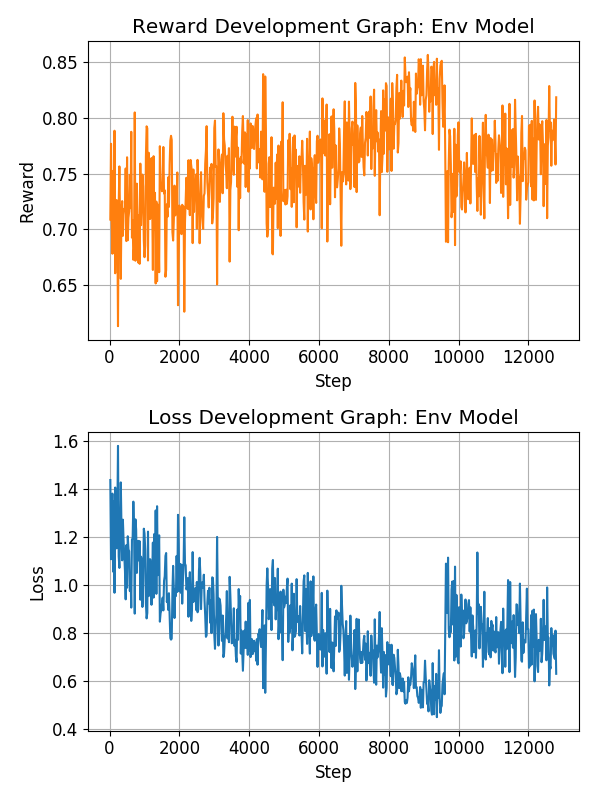

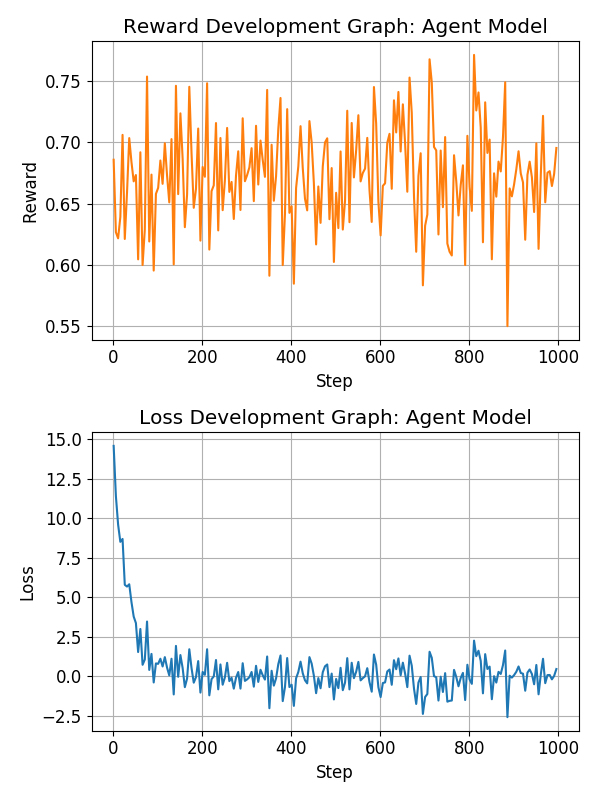

In [6]:
from IPython.display import Image, display_png

# 画像の読み込み
png1 = './results_sample/test/output_fig/env_development.png'
png2 = './results_sample/test/output_fig/agent_development.png'

# 画像の表示
display_png(Image(png1, width=400))
display_png(Image(png2, width=400))

## 7.2節　ENAS探索結果の検証
### ENAS探索で得られたベストアーキテクチャによるセマンティックセグメンテーション

ここでは、ENAS探索で得られたベストアーキテクチャによる深層ネットワーク（ENAS-Net）を構築・学習し、その結果を使ってセマンティックセグメンテーションを実施ます。

### 1．画像データの準備

必要なライブラリをインポートします。

In [7]:
import csv
import os
import random
import sys

import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
from keras.layers import (Input, Dense, Conv2D, SeparableConv2D,
                          AveragePooling2D, MaxPooling2D, UpSampling2D,
                          Activation, concatenate, Reshape)
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger
from keras.utils import plot_model
from keras import backend as K
from keras import metrics
import pandas as pd
from PIL import Image

Using TensorFlow backend.


画像データのパス、画像サイズ、クラス数を指定します。また、結果の出力先ディレクトリを指定します。

In [8]:
data_path = "./data/VOC2012"
image_size = (128, 128)
num_classes = 22
input_size = (128, 128, 3)
save_root = "./output/20190425"

ENAS探索した際のネットワークの固定情報（フィルタ数、層数）およびENAS探索で得られたベストアーキテクチャを指定します。

In [9]:
out_filters = 36
num_layers = 12
sample_arc = [0, 5, 5, 2, 2, 2, 4, 5, 3, 5, 3, 4]

画像データを訓練用、検証用、テスト用に分けておきます。

In [10]:
# Get the filenames of training image and label data
img_path = os.path.join(data_path + "/JPEGImages/")
lbl_path = os.path.join(data_path + "/SegmentationClass/")

# Only use names from lbl_path since not all images are labeled
lbl_filename_list = os.listdir(lbl_path)
lbl_filename_list.sort()
img_filename_list = [lbl_filename.replace(".png", ".jpg") for lbl_filename in lbl_filename_list]

# Parameters
height = image_size[0]
width = image_size[1]
category = num_classes

# 70% train, 20% validation, 10% test
num_images = len(img_filename_list)
num_train = int(num_images * 0.7)
num_valid = int(num_images * 0.2)
num_test = num_images - num_train - num_valid
train_img_filename_list = img_filename_list[0:num_train]
valid_img_filename_list = img_filename_list[num_train:num_train + num_valid]
test_img_filename_list = img_filename_list[num_images - num_test:num_images]
train_lbl_filename_list = lbl_filename_list[0:num_train]
valid_lbl_filename_list = lbl_filename_list[num_train:num_train + num_valid]
test_lbl_filename_list = lbl_filename_list[num_images - num_test:num_images]

batch_size = 16
train_steps_per_epoch = num_train // batch_size
valid_steps_per_epoch = num_valid // batch_size

# Open all test images and labels
test_images = np.zeros((len(test_img_filename_list), height, width, 3), dtype="float32")
test_labels = []
for index in range(len(test_img_filename_list)):
    test_img = Image.open(os.path.join(img_path, test_img_filename_list[index]))
    test_img = np.array(test_img)
    test_img = cv2.resize(test_img, (height, width))  # Resize
    test_img = test_img / 255.0   # Normalize
    test_images[index, :, :, :] = test_img

    test_lbl = Image.open(os.path.join(lbl_path, test_lbl_filename_list[index]))
    test_lbl = test_lbl.resize((height, width))
    test_lbl = np.asarray(test_lbl)
    test_labels.append(test_lbl)

test_labels = np.asarray(test_labels, dtype=np.uint8)

# Change indices which correspond to "void" from 255
test_labels = np.where(test_labels == 255, 21, test_labels)
np.set_printoptions(threshold=sys.maxsize)

# Convert to one hot encoding
identity = np.identity(category, dtype=np.uint8)
test_labels = identity[test_labels]

print("test_img.shape  = " + str(test_images.shape))
print("test_lbl.shape  = " + str(test_labels.shape))

test_img.shape  = (292, 128, 128, 3)
test_lbl.shape  = (292, 128, 128, 22)


### 2．画像 Generator の準備

訓練用画像の generator（訓練用プログラムに画像を渡す役割を担う）を定義します。

In [11]:
def train_input_generator():
    while 1:
        train_images = np.zeros((batch_size, height, width, 3), dtype="float32")
        train_labels = np.zeros((batch_size, height, width))

        shuffled_index = list(range(num_train))
        random.shuffle(shuffled_index)
        batch_idx = 0

        for i in shuffled_index:
            # Read training images
            train_img = Image.open(os.path.join(img_path, train_img_filename_list[i]))
            train_img = np.array(train_img)
            train_img = cv2.resize(train_img, (height, width))  # Resize
            train_img = train_img / 255.0  # Normalize

            # Read training labels
            train_lbl = Image.open(os.path.join(lbl_path, train_lbl_filename_list[i]))
            train_lbl = train_lbl.resize((height, width))

            # Flip
            do_flip = random.choice([True, False])
            if do_flip:
                train_img = cv2.flip(train_img, 1)
                train_lbl = train_lbl.transpose(Image.FLIP_LEFT_RIGHT)

            # Random Crop
            do_random_crop = random.choice([True, False])
            if do_random_crop:
                x_start = random.randint(0, width/2)
                y_start = random.randint(0, height/2)
                train_img = train_img[y_start:y_start+int(height/2), x_start:x_start+int(width/2)]
                train_img = cv2.resize(train_img, (height, width))
                train_lbl = train_lbl.crop((x_start, y_start, x_start+int(width/2), y_start+int(height/2)))
                train_lbl = train_lbl.resize((height, width))

            train_lbl = np.asarray(train_lbl)
            np.set_printoptions(threshold=sys.maxsize)
            train_images[batch_idx % batch_size] = train_img
            train_labels[batch_idx % batch_size] = train_lbl

            batch_idx += 1
            if (batch_idx % batch_size) == 0:
                train_labels_onehot = np.asarray(train_labels, dtype=np.uint8)
                # Change indices which correspond to "void" from 255
                train_labels_onehot = np.where(train_labels_onehot == 255, 21, train_labels_onehot)
                np.set_printoptions(threshold=sys.maxsize)

                # Convert to one hot encoding
                identity = np.identity(category, dtype=np.uint8)
                train_labels_onehot = identity[train_labels_onehot]

                yield (np.array(train_images), np.array(train_labels_onehot))

検証用画像の generator（訓練用プログラムに画像を渡す役割を担う）を定義します。

In [12]:
def validation_input_generator():
    while 1:
        valid_images = np.zeros((batch_size, height, width, 3), dtype="float32")
        valid_labels = np.zeros((batch_size, height, width))

        shuffled_index = list(range(num_valid))
        random.shuffle(shuffled_index)
        batch_idx = 0

        for i in shuffled_index:
            # Read training images
            valid_img = Image.open(os.path.join(img_path, valid_img_filename_list[i]))
            valid_img = np.array(valid_img)
            valid_img = cv2.resize(valid_img, (height, width))  # Resize
            valid_img = valid_img / 255.0  # Normalize

            # Read training labels
            valid_lbl = Image.open(os.path.join(lbl_path, valid_lbl_filename_list[i]))
            valid_lbl = valid_lbl.resize((height, width))

            valid_lbl = np.asarray(valid_lbl)
            np.set_printoptions(threshold=sys.maxsize)
            valid_images[batch_idx % batch_size] = valid_img
            valid_labels[batch_idx % batch_size] = valid_lbl

            batch_idx += 1
            if (batch_idx % batch_size) == 0:
                valid_labels_onehot = np.asarray(valid_labels, dtype=np.uint8)
                # Change indices which correspond to "void" from 255
                valid_labels_onehot = np.where(valid_labels_onehot == 255, 21, valid_labels_onehot)
                np.set_printoptions(threshold=sys.maxsize)

                # Convert to one hot encoding
                identity = np.identity(category, dtype=np.uint8)
                valid_labels_onehot = identity[valid_labels_onehot]

                yield (np.array(valid_images), np.array(valid_labels_onehot))

### 3．ENAS探索結果による深層ネットワーク（ENAS-Net）の構築

ENAS探索のベストアーキテクチャを読み込んで、深層ネットワークを構築します。

In [13]:
def enas_facory(
        input_size,
        out_filters,
        num_layers,
        sample_arc,
        num_classes=22):
    
    pool_distance = num_layers // 4
    pool_layers = [pool_distance - 1, 2 * pool_distance - 1, 3 * pool_distance - 1]

    
    def conv_branch(x, kernel_size=(3, 3), separable=False, dilation_rate=2, out_filters=36):
        x = Conv2D(out_filters, (1, 1), padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        if separable == False:
            x = Conv2D(out_filters, kernel_size, dilation_rate=dilation_rate, padding='same')(x)
        else:
            x = SeparableConv2D(out_filters, kernel_size, strides=(1, 1), padding='same', 
                                depth_multiplier=1, use_bias=False)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        return x

    
    def pool_branch(x, avg_or_max='max', out_filters=36):
        x = Conv2D(out_filters, (1, 1), padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        if avg_or_max == 'avg':
            x = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
        elif avg_or_max == 'max':
            x = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
        else:
            raise ValueError("Unknown pool {}".format(avg_or_max))
        return x

    
    def enas_layer(x, out_filters):
        enas_layers = []
        enas_layers.append(conv_branch(x, (3, 3), separable=False, dilation_rate=1, out_filters=out_filters))
        enas_layers.append(conv_branch(x, (3, 3), separable=True, out_filters=out_filters))
        enas_layers.append(conv_branch(x, (5, 5), separable=False, dilation_rate=1, out_filters=out_filters))
        enas_layers.append(conv_branch(x, (5, 5), separable=True, out_filters=out_filters))
        enas_layers.append(pool_branch(x, 'avg', out_filters=out_filters))
        enas_layers.append(pool_branch(x, 'max', out_filters=out_filters))
        return enas_layers
    

    # Input placeholder
    def build_input_layer(input_size):
        return Input(shape=input_size, name='input')

    # Encoder layers
    layers = []
    
    
    def build_encoding_layers(x):
        # Stem convolution
        x = Conv2D(out_filters, (3, 3), padding='same')(x)
        x = BatchNormalization()(x)
        # Encoder layers
        for layer_id in range(num_layers):
            x = enas_layer(x, out_filters)[sample_arc[layer_id]]
            if layer_id in pool_layers:
                x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)
            layers.append(x)
        return x

    
    # Decoder layers with long skip connections
    def build_decoding_layers(x):
        # Decorder layers
        for layer_id in reversed(range(num_layers)):
            x = enas_layer(x, out_filters)[sample_arc[layer_id]]
            if layer_id in pool_layers:
                x = UpSampling2D(size=(2, 2))(x)
                x = concatenate([x,layers[layer_id - 1]], axis=3)
                x = Conv2D(out_filters, (1, 1), padding='same')(x)
            layers.append(x)
        
        # end convolution
        x = Conv2D(num_classes, (1, 1), padding='same', activation='softmax')(x)
        x = Reshape((input_size[0], input_size[1], num_classes), name='conv-output-reshape')(x)
        return x

    # 入力と出力を指定してモデルを作成
    input_img = build_input_layer(input_size)
    encoded = build_encoding_layers(input_img)
    decoded = build_decoding_layers(encoded)
    model = Model(inputs=input_img, outputs=decoded)

    # 損失関数、最適化手法、監視メトリクスの設定    
    model.compile(
        optimizer='adam',
        #loss='mean_squared_error',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

モデル構築とサマリーの書き出し

In [14]:
enas_unet = enas_facory(input_size, out_filters, num_layers, sample_arc)
enas_unet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 36) 1008        input[0][0]                      
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 36) 144         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 36) 1332        batch_normalization_1[0][0]      
__________________________________________________________________________________________________
batch_norm

### 4．ENAS-Net の学習

callback 関数の定義

In [15]:
def get_callbacks(save_root):
    if not os.path.exists(save_root):
        os.makedirs(save_root)
    tensorboard_dir = os.path.join(save_root, 'tensorboard')
    checkpoint_path = os.path.join(save_root, 'weights.{epoch:02d}-{val_loss:.4f}-{val_acc:.4f}.hdf5')
    csv_path = os.path.join(save_root, 'log.csv')
    
    # TensorBoard
    tensorboard = TensorBoard(log_dir=tensorboard_dir)
    
    # エポックごとの自動セーブ
    model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, verbose=1)
    
    # Save best model
    best_model = ModelCheckpoint(os.path.join(save_root,'best_model_weights.hdf5'), 
                                 monitor='val_loss', verbose=1, save_best_only=True)
    
    # csv結果出力
    csv_logger = CSVLogger(filename=csv_path)
    
    callbacks = [tensorboard, model_checkpoint, csv_logger, best_model]
    
    return callbacks

ENAS探索で得られたベストアーキテクチャの深層ネットワークを学習します。

In [19]:
# callback関数の生成
callbacks = get_callbacks(save_root)

# モデル構築
enas_unet = enas_facory(input_size, out_filters, num_layers, sample_arc)

# 学習回数（エポック数）を指定（1000回以上が望ましいが、試すだけなら100回で十分）
num_epoch = 100

# 学習の実行
enas_unet.fit_generator(generator=train_input_generator(), steps_per_epoch=train_steps_per_epoch, 
                        epochs=num_epoch, validation_data=validation_input_generator(), 
                        validation_steps=valid_steps_per_epoch, callbacks=callbacks)

Epoch 1/100
127/127 [==============================] - 33s 263ms/step - loss: 1.8585 - acc: 0.6087 - val_loss: 2.3155 - val_acc: 0.4810

Epoch 00001: saving model to ./output/20190425/weights.01-2.3155-0.4810.hdf5

Epoch 00001: val_loss improved from inf to 2.31549, saving model to ./output/20190425/best_model_weights.hdf5
Epoch 2/100
127/127 [==============================] - 31s 241ms/step - loss: 1.5526 - acc: 0.6427 - val_loss: 1.6808 - val_acc: 0.6553

Epoch 00002: saving model to ./output/20190425/weights.02-1.6808-0.6553.hdf5

Epoch 00002: val_loss improved from 2.31549 to 1.68076, saving model to ./output/20190425/best_model_weights.hdf5
Epoch 3/100
127/127 [==============================] - 31s 245ms/step - loss: 1.5378 - acc: 0.6395 - val_loss: 1.4771 - val_acc: 0.6618

Epoch 00003: saving model to ./output/20190425/weights.03-1.4771-0.6618.hdf5

Epoch 00003: val_loss improved from 1.68076 to 1.47707, saving model to ./output/20190425/best_model_weights.hdf5
Epoch 4/100
127/1

Epoch 29/100
127/127 [==============================] - 31s 245ms/step - loss: 1.2964 - acc: 0.6494 - val_loss: 1.3479 - val_acc: 0.6621

Epoch 00029: saving model to ./output/20190425/weights.29-1.3479-0.6621.hdf5

Epoch 00029: val_loss did not improve from 1.28501
Epoch 30/100
127/127 [==============================] - 31s 242ms/step - loss: 1.2779 - acc: 0.6536 - val_loss: 1.2696 - val_acc: 0.6642

Epoch 00030: saving model to ./output/20190425/weights.30-1.2696-0.6642.hdf5

Epoch 00030: val_loss improved from 1.28501 to 1.26957, saving model to ./output/20190425/best_model_weights.hdf5
Epoch 31/100
127/127 [==============================] - 31s 243ms/step - loss: 1.2828 - acc: 0.6534 - val_loss: 1.3128 - val_acc: 0.6672

Epoch 00031: saving model to ./output/20190425/weights.31-1.3128-0.6672.hdf5

Epoch 00031: val_loss did not improve from 1.26957
Epoch 32/100
127/127 [==============================] - 31s 243ms/step - loss: 1.2888 - acc: 0.6510 - val_loss: 1.3631 - val_acc: 0.6479


Epoch 00058: saving model to ./output/20190425/weights.58-1.1257-0.6921.hdf5

Epoch 00058: val_loss improved from 1.16534 to 1.12567, saving model to ./output/20190425/best_model_weights.hdf5
Epoch 59/100
127/127 [==============================] - 30s 239ms/step - loss: 1.1657 - acc: 0.6674 - val_loss: 1.2000 - val_acc: 0.6762

Epoch 00059: saving model to ./output/20190425/weights.59-1.2000-0.6762.hdf5

Epoch 00059: val_loss did not improve from 1.12567
Epoch 60/100
127/127 [==============================] - 31s 244ms/step - loss: 1.1446 - acc: 0.6759 - val_loss: 1.1820 - val_acc: 0.6814

Epoch 00060: saving model to ./output/20190425/weights.60-1.1820-0.6814.hdf5

Epoch 00060: val_loss did not improve from 1.12567
Epoch 61/100
127/127 [==============================] - 31s 244ms/step - loss: 1.1453 - acc: 0.6753 - val_loss: 1.1856 - val_acc: 0.6744

Epoch 00061: saving model to ./output/20190425/weights.61-1.1856-0.6744.hdf5

Epoch 00061: val_loss did not improve from 1.12567
Epoch 


Epoch 00088: val_loss did not improve from 1.11584
Epoch 89/100
127/127 [==============================] - 37s 293ms/step - loss: 1.1017 - acc: 0.6786 - val_loss: 1.1566 - val_acc: 0.6829

Epoch 00089: saving model to ./output/20190425/weights.89-1.1566-0.6829.hdf5

Epoch 00089: val_loss did not improve from 1.11584
Epoch 90/100
127/127 [==============================] - 38s 299ms/step - loss: 1.0888 - acc: 0.6805 - val_loss: 1.1734 - val_acc: 0.6802

Epoch 00090: saving model to ./output/20190425/weights.90-1.1734-0.6802.hdf5

Epoch 00090: val_loss did not improve from 1.11584
Epoch 91/100
127/127 [==============================] - 38s 299ms/step - loss: 1.0851 - acc: 0.6838 - val_loss: 1.1128 - val_acc: 0.6937

Epoch 00091: saving model to ./output/20190425/weights.91-1.1128-0.6937.hdf5

Epoch 00091: val_loss improved from 1.11584 to 1.11285, saving model to ./output/20190425/best_model_weights.hdf5
Epoch 92/100
127/127 [==============================] - 37s 292ms/step - loss: 1.086

### 5．学習済み ENAS-Net によるセマンティックセグメンテーション

学習済みネットワークによるセマンティックセグメンテーションのテストに必要な関数を定義します。

In [20]:
##########
# セマンティックセグメンテーションの実施と可視化のための関数
##########
def plot_test(model, test_img, test_lbl):
    X = test_img
    Y = test_lbl
    num_classes = Y.shape[-1]
    predicted = model.predict(X)
    
    max_class = np.argmax(predicted[0], axis=-1)
    y_true = np.argmax(Y[0], axis=-1)
    
    conj_mat = np.zeros((num_classes, num_classes))
    for x in range(X.shape[1]):
        for y in range(X.shape[2]):
            conj_mat[y_true[x,y], max_class[x,y]] += 1
    
    # Original image
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(131)
    ax.imshow(X[0])
    ax.set_title('org image')
    ax.set_axis_off()
    
    # Ground truth
    ax = fig.add_subplot(132)
    ax.imshow(y_true)
    ax.set_title('ground truth')
    ax.set_axis_off()
    
    # Predicted image
    ax = fig.add_subplot(133)
    ax.imshow(max_class)
    ax.set_title('predicted')
    ax.set_axis_off()
    
    return conj_mat

##########
# セマンティックセグメンテーション実施結果の性能指標を計算する関数
##########
def calc_metrics(conj_mat):
    num_truth = np.sum(conj_mat, axis=1)
    num_predict = np.sum(conj_mat, axis=0)

    R_met = []
    P_met = []
    F_met = []
    IOU = []
    A_met = 0
    
    for cat in range(conj_mat.shape[0]):
        if num_predict[cat] != 0:
            p = conj_mat[cat,cat]/num_predict[cat]
        else:
            p = 0
        r = conj_mat[cat,cat]/num_truth[cat]
        A_met += conj_mat[cat,cat]
        if p + r != 0:
            f = 2*p*r/(p+r)
        else:
            f = 0
        P_met.append(p)
        R_met.append(r)
        F_met.append(f)
        IOU.append(f/(2-f))
    
    A_met /= np.sum(num_truth)
    mean_IOU = sum(IOU)/len(IOU)

    print("Accuracy: " + str(np.round(A_met*10000,0)/100))
    print("mean_IOU: " + str(np.round(mean_IOU*10000,0)/100))
    print("mean_Precision: " + str(np.round(10000*np.mean(P_met),0)/100))
    print("mean_Recall: " + str(np.round(10000*np.mean(R_met),0)/100))
    print("mean_F-measure: " + str(np.round(10000*np.mean(F_met),0)/100))
    print("Precision: " + str([np.round(p * 10000,0)/100 for i, p in enumerate(P_met)]))
    print("Recall: " + str([np.round(r * 10000,0)/100 for i, r in enumerate(R_met)]))
    print("F-measure: " + str([np.round(f * 10000,0)/100 for i, f in enumerate(F_met)]))
    print("IOU: " + str([np.round(f * 10000,0)/100 for i, f in enumerate(IOU)]))

学習結果の読み込み

In [21]:
# Load the best model
enas_unet.load_weights(os.path.join(save_root, "best_model_weights.hdf5"))

ベストアーキテクチャの深層ネットワーク（学習済み）を用いたセマンティックセグメンテーションのテストを実施します。  
**※次のセルの実行結果には、VOC2012の画像が表示されます。著作権の都合上、この配布用サンプルからは出力結果を削除しました。**

In [ ]:
conj_mat = np.zeros((num_classes, num_classes))

for i in range(len(test_images)):
    image = np.array([test_images[i]])
    label = np.array([test_labels[i]])
    conj_mat += plot_test(enas_unet, image, label)

テスト結果のファイル出力

In [23]:
result = pd.DataFrame(conj_mat)
result.to_csv(os.path.join(save_root, 'result_renew.csv'))

性能指標の表示  
**※以下の出力のうち、Precision, Recall, F-measureは、22クラスごとの数値が以下の順に並んでいます。**  

id	物体クラス  
0	background  
1	aeroplane  
2	bicycle  
3	bird  
4	boad  
5	bottle  
6	bus  
7	car  
8	cat  
9	chair  
10	cow  
11	dining table  
12	dog  
13	horse  
14	motor bike  
15	person  
16	potted plant  
17	sheep  
18	sofa  
19	train  
20	tv/monitor  
21	(void)**

In [29]:
calc_metrics(conj_mat)

Accuracy: 71.53
mean_IOU: 14.51
mean_Precision: 29.28
mean_Recall: 22.06
mean_F-measure: 21.66
Precision: [79.09, 41.47, 0.0, 4.74, 27.22, 0.0, 46.58, 67.04, 27.7, 0.0, 29.63, 90.09, 24.63, 9.42, 24.5, 67.02, 0.0, 23.55, 0.0, 27.92, 16.74, 36.88]
Recall: [94.95, 47.92, 0.0, 0.75, 3.75, 0.0, 58.73, 35.23, 45.87, 0.0, 14.93, 3.13, 8.58, 6.36, 29.3, 55.86, 0.0, 52.09, 0.0, 17.51, 3.64, 6.73]
F-measure: [86.3, 44.46, 0.0, 1.29, 6.59, 0.0, 51.96, 46.19, 34.54, 0.0, 19.85, 6.04, 12.72, 7.59, 26.68, 60.94, 0.0, 32.43, 0.0, 21.52, 5.99, 11.38]
IOU: [75.9, 28.58, 0.0, 0.65, 3.41, 0.0, 35.1, 30.03, 20.87, 0.0, 11.02, 3.12, 6.79, 3.95, 15.4, 43.82, 0.0, 19.36, 0.0, 12.06, 3.09, 6.04]
